# Capstone Project: Which Whisky Wins?
## Whisky Price Prediction

By Gareth Harper

The purpose of this project is to investigate the factors affecting whisky prices, to make predictions based on the data, and to identify opportunities following exploration and modeling of the data.

My aim is to build a predictive model that can help whisky buyers make better informed decisions when purchasing whisky.

The information used in this project was obtained from <a href="https://www.htfw.com/catalogsearch/result/index/?bottle_type=5&p=1&q=whisky">Hard To Find Whisky</a>, a retail website selling over 6,500 different whiskies. I performed a web scrape of the data; the details are included in a separate notebook.

In [1]:
# import necessary libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load the data (multiple csv files)
whisky1 = pd.read_csv('df/whisky_01February_1018AM.csv')
whisky2 = pd.read_csv('df/whisky_01February_1056AM.csv')
whisky3 = pd.read_csv('df/whisky_01February_0114PM.csv')
whisky4 = pd.read_csv('df/whisky_01February_0152PM.csv')
whisky5 = pd.read_csv('df/whisky_01February_0229PM.csv')
whisky6 = pd.read_csv('df/whisky_01February_0308PM.csv', encoding='ISO-8859-1')
whisky7 = pd.read_csv('df/whisky_01February_0349PM.csv')
whisky8 = pd.read_csv('df/whisky_01February_0425PM.csv')
whisky9 = pd.read_csv('df/whisky_01February_0514PM.csv')
whisky10 = pd.read_csv('df/whisky_01February_0552PM.csv')
whisky11 = pd.read_csv('df/whisky_01February_0628PM.csv')

In [3]:
# Append them together
whisky = pd.concat([
    whisky1,
    whisky2,
    whisky3, 
    whisky4, 
    whisky5, 
    whisky6, 
    whisky7,
    whisky8,
    whisky9,
    whisky10,
    whisky11,
], axis=0, ignore_index=True)

# 1. Data Cleaning

In [4]:
whisky.head()

distillery                                             series  vintage  \
0       Mortlach                                  Signatory Vintage   2009.0   
1        Macduff                Disciples 2nd Edition - Single Cask   2008.0   
2  George Dickel                   Stateside - Single Cask American   2011.0   
3    Invergordon    Murray McDavid Select Grain Single Cask #903159   1987.0   
4   Bunnahabhain  Murray McDavid Mission Gold - Pomerol Cask Fin...   1997.0   

  year_bottled          age alcohol_abv cask_strength cask_wood_type  \
0         2021  12 year old      46.00%            No       Hogshead   
1         2021  13 year old      54.00%           Yes       Hogshead   
2         2021  10 year old      50.00%           Yes        Bourbon   
3         2018  30 year old         54%           Yes         Sherry   
4         2019  21 year old      54.70%           Yes           Wine   

  single_cask     packaging         bottler   country stopper bottle_type  \
0         Yes  Original Box       Signatory  Scotland    Cork    Standard   
1         Yes  Original Box     Independent  Scotland    Cork    Standard   
2         Yes  Original Box     Independent   America    Cork    Standard   
3         Yes      Tin Tube  Murray McDavid  Scotland    Cork    Standard   
4         Yes      Tin Tube  Murray McDavid  Scotland    Cork    Standard   

  bottle_size  neck_level                                        description  \
0        70cl  Full Level  Signatory Vintage's Mortlach from the Un-Chill...   
1        70cl  Full Level  The second release of the Disciples range from...   
2        70cl  Full Level  George Dickel provides a true American Whiskey...   
3        70cl  Full Level  In the Highlands, on the coast of the Cromarty...   
4        70cl  Full Level  The narrow and winding road to Bunnahabhain ru...   

     price  number_bottled  
0   £49.95             NaN  
1  £109.95           270.0  
2   £94.95           233.0  
3  £169.95           550.0  
4  £419.95           290.0

In [5]:
whisky.tail()

distillery                          series  vintage  \
6484          Brora (silent)            2011 Special Release   1978.0   
6485    Port Dundas (silent)            2011 Special Release   1991.0   
6486                Macallan       Light Mahogany Sherry Oak   1989.0   
6487  St. Magdalene (silent)                      Rare Malts   1979.0   
6488               Glengoyne  Single Highland Malt (1 litre)      NaN   

     year_bottled          age alcohol_abv cask_strength  \
6484         2011  32 year old      54.70%           Yes   
6485         2011  20 year old      57.40%           Yes   
6486         2007  18 year old         43%            No   
6487         1998  19 year old      63.80%           Yes   
6488          NaN  17 year old         40%            No   

                   cask_wood_type single_cask       packaging     bottler  \
6484  American Oak & European Oak          No    Original Box  Distillery   
6485         Bourbon & Sherry Oak          No    Original Box  Distillery   
6486                       Sherry          No    Original Box  Distillery   
6487                          Oak          No         Unboxed  Distillery   
6488                       Sherry          No  Cardboard Tube  Distillery   

       country stopper bottle_type bottle_size  neck_level  \
6484  Scotland    Cork    Standard        70cl  Full Level   
6485  Scotland    Cork    Standard        70cl  Full Level   
6486  Scotland    Cork    Standard        70cl  Full Level   
6487  Scotland    Cork    Standard        70cl   Base Neck   
6488  Scotland    Cork    Standard       100cl  Full Level   

                                            description      price  \
6484  The 10th in Diageo's Special Release series of...  £2,499.95   
6485  Featured in the 1001 whiskies you must try bef...    £119.95   
6486  Very scarce Macallan 1989 vintage of this all ...    £349.95   
6487  A superb and sought after bottling of St Magda...  £1,499.95   
6488  Please note that this is the larger 1 litre tr...    £164.95   

      number_bottled  
6484          1500.0  
6485          1920.0  
6486             NaN  
6487             NaN  
6488             NaN

## 1.1 Description of Features

In [6]:
# get a summary of the dataframe
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distillery      6486 non-null   object 
 1   series          6489 non-null   object 
 2   vintage         3625 non-null   float64
 3   year_bottled    4988 non-null   object 
 4   age             5081 non-null   object 
 5   alcohol_abv     6488 non-null   object 
 6   cask_strength   6488 non-null   object 
 7   cask_wood_type  6447 non-null   object 
 8   single_cask     6468 non-null   object 
 9   packaging       6488 non-null   object 
 10  bottler         6488 non-null   object 
 11  country         6488 non-null   object 
 12  stopper         6487 non-null   object 
 13  bottle_type     6488 non-null   object 
 14  bottle_size     6489 non-null   object 
 15  neck_level      6488 non-null   object 
 16  description     4946 non-null   object 
 17  price           6410 non-null   o

In [7]:
# (number of rows, number of columns) - tuple that gives dimensions of the array
whisky.shape

(6489, 19)

In [8]:
# missing/null values
whisky.isnull().sum()

distillery           3
series               0
vintage           2864
year_bottled      1501
age               1408
alcohol_abv          1
cask_strength        1
cask_wood_type      42
single_cask         21
packaging            1
bottler              1
country              1
stopper              2
bottle_type          1
bottle_size          0
neck_level           1
description       1543
price               79
number_bottled    3867
dtype: int64

In [9]:
# As price is my target variable, I will immediately remove all rows with no price
whisky = whisky.dropna(subset=['price'])

In [10]:
# Remove duplicate entries
whisky.drop_duplicates(keep='first', inplace=True)

In [11]:
# Investigate column labels
whisky.columns

Index(['distillery', 'series', 'vintage', 'year_bottled', 'age', 'alcohol_abv',
       'cask_strength', 'cask_wood_type', 'single_cask', 'packaging',
       'bottler', 'country', 'stopper', 'bottle_type', 'bottle_size',
       'neck_level', 'description', 'price', 'number_bottled'],
      dtype='object')

## 1.2 Categorical Features

### 1.2.1 Investigate "distillery" column

Distillery refers to the company making the whisky. Notable names here include Macallan, Johnnie Walker, Jameson etc.

In [12]:
# number of unique elements in the column
whisky.distillery.nunique()

348

In [13]:
# counts of each unique value
whisky.distillery.value_counts()

Macallan          357
GlenDronach       193
Ardbeg            152
Blended Whisky    144
Bowmore           143
                 ... 
Wardhead            1
Rampur              1
Spey Valley         1
Strathearn          1
Copper Dog          1
Name: distillery, Length: 348, dtype: int64

In [14]:
# number of missing values in the column
whisky.distillery.isnull().sum()

3

Let's investigate the missing values further:

In [15]:
# Identify the rows in question:
whisky[whisky.distillery.isnull()]

distillery                                             series  vintage  \
1354        NaN  Hard To Find Whisky On-line & In-Store Gift Vo...      NaN   
4566        NaN                                     Southern Belle      NaN   
5034        NaN                                   Southern Comfort      NaN   

     year_bottled  age alcohol_abv cask_strength cask_wood_type single_cask  \
1354          NaN  NaN         NaN           NaN            NaN         NaN   
4566          NaN  NaN         36%            No            Oak          No   
5034          NaN  NaN         40%            No            Oak          No   

     packaging     bottler  country    stopper bottle_type bottle_size  \
1354       NaN         NaN      NaN        NaN         NaN        70cl   
4566   Unboxed  Distillery  America  Screw Cap    Standard        70cl   
5034   Unboxed  Distillery  America       Cork    Standard        70cl   

      neck_level                                        description   price  \
1354         NaN                                                NaN  £10.00   
4566  Full Level             A fine Liquor Spirit made with Bourbon  £27.95   
5034  Full Level  An old bottling of this very popular Liqueur c...  £24.95   

      number_bottled  
1354             NaN  
4566             NaN  
5034             NaN

The latter two entries are American, and I will set their distillery as "Other".

https://www.htfw.com/southern-belle

https://www.htfw.com/southern-comfort

In [16]:
# df.loc[row_indexer, col_indexer] = "new_value"
whisky.loc[4566, 'distillery'] = "Other"
whisky.loc[5034, 'distillery'] = "Other"

In [17]:
# Index 1354 is a gift card, so I'll drop it
whisky.dropna(subset=['distillery'], inplace=True)

In [18]:
# to check:
# whisky[whisky.cask_strength.isnull()]

In [19]:
# Filter "distillery" by other spirits and exclude them
not_whisky = ['Champagne', 'Gin', 'Rum', 'Vodka', 'Cognac / Brandy']
# whisky can include whisky-based liqueurs
# whisky.distillery.unique()
# whisky.shape

In [20]:
whisky = whisky[~whisky['distillery'].isin(not_whisky)]
# .isin() checks whether each value in the dataframe is contained, and
# the tilde (~) is a bitwise negation operator which "flips" the data
# So the above code checks if the word is in the 'not_whisky' list, and then the tilde
#    essentially excludes those words from being returned in the new dataframe

In [21]:
# to check:
# whisky.distillery.unique()
# whisky.shape

I still have a large amount of unique values:

In [22]:
whisky.distillery.nunique()

344

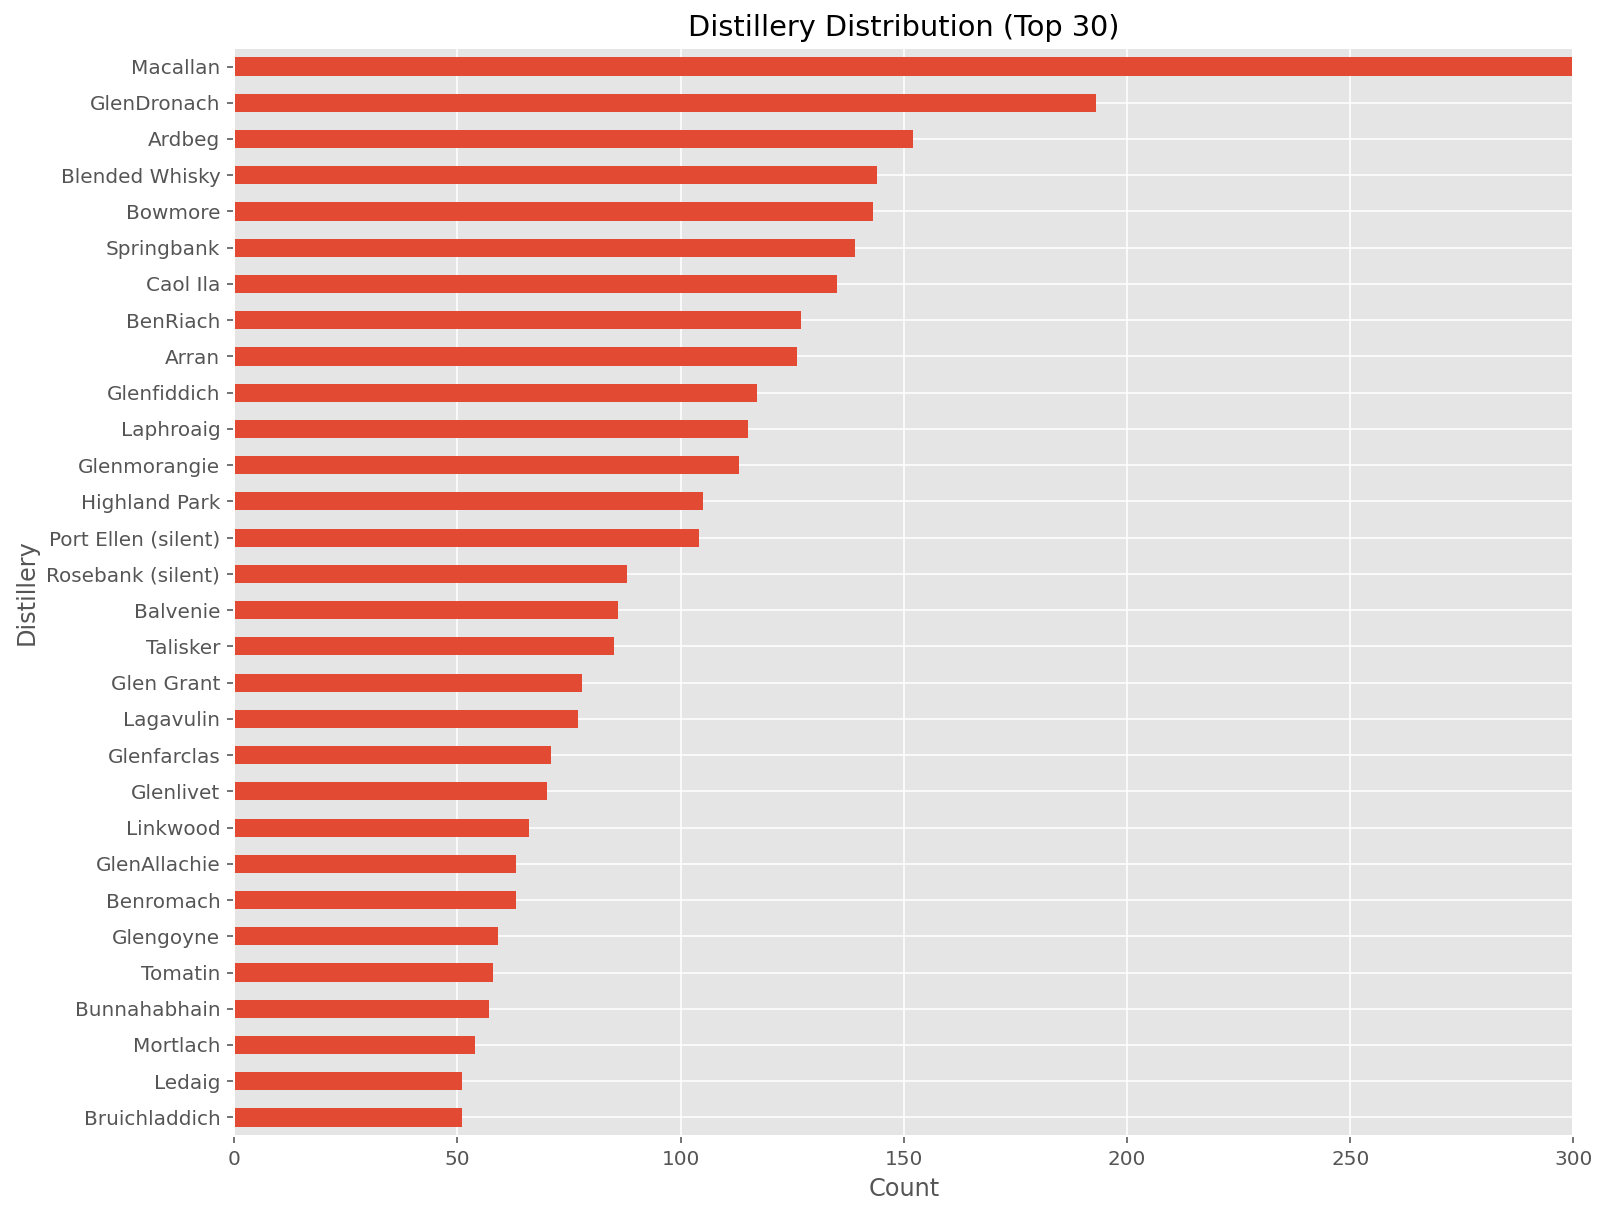

In [23]:
# distribution of distillery by value count
# TOP 30
whisky.distillery.value_counts().head(30).sort_values().plot(kind="barh", figsize=(12,10))
plt.title("Distillery Distribution (Top 30)")
plt.xlabel("Count")
plt.ylabel("Distillery")
plt.xlim([0,300])

plt.savefig("images/01 Distillery Distribution (Top 30).png", bbox_inches="tight")
plt.savefig("images/01 Distillery Distribution (Top 30).pdf", bbox_inches="tight")

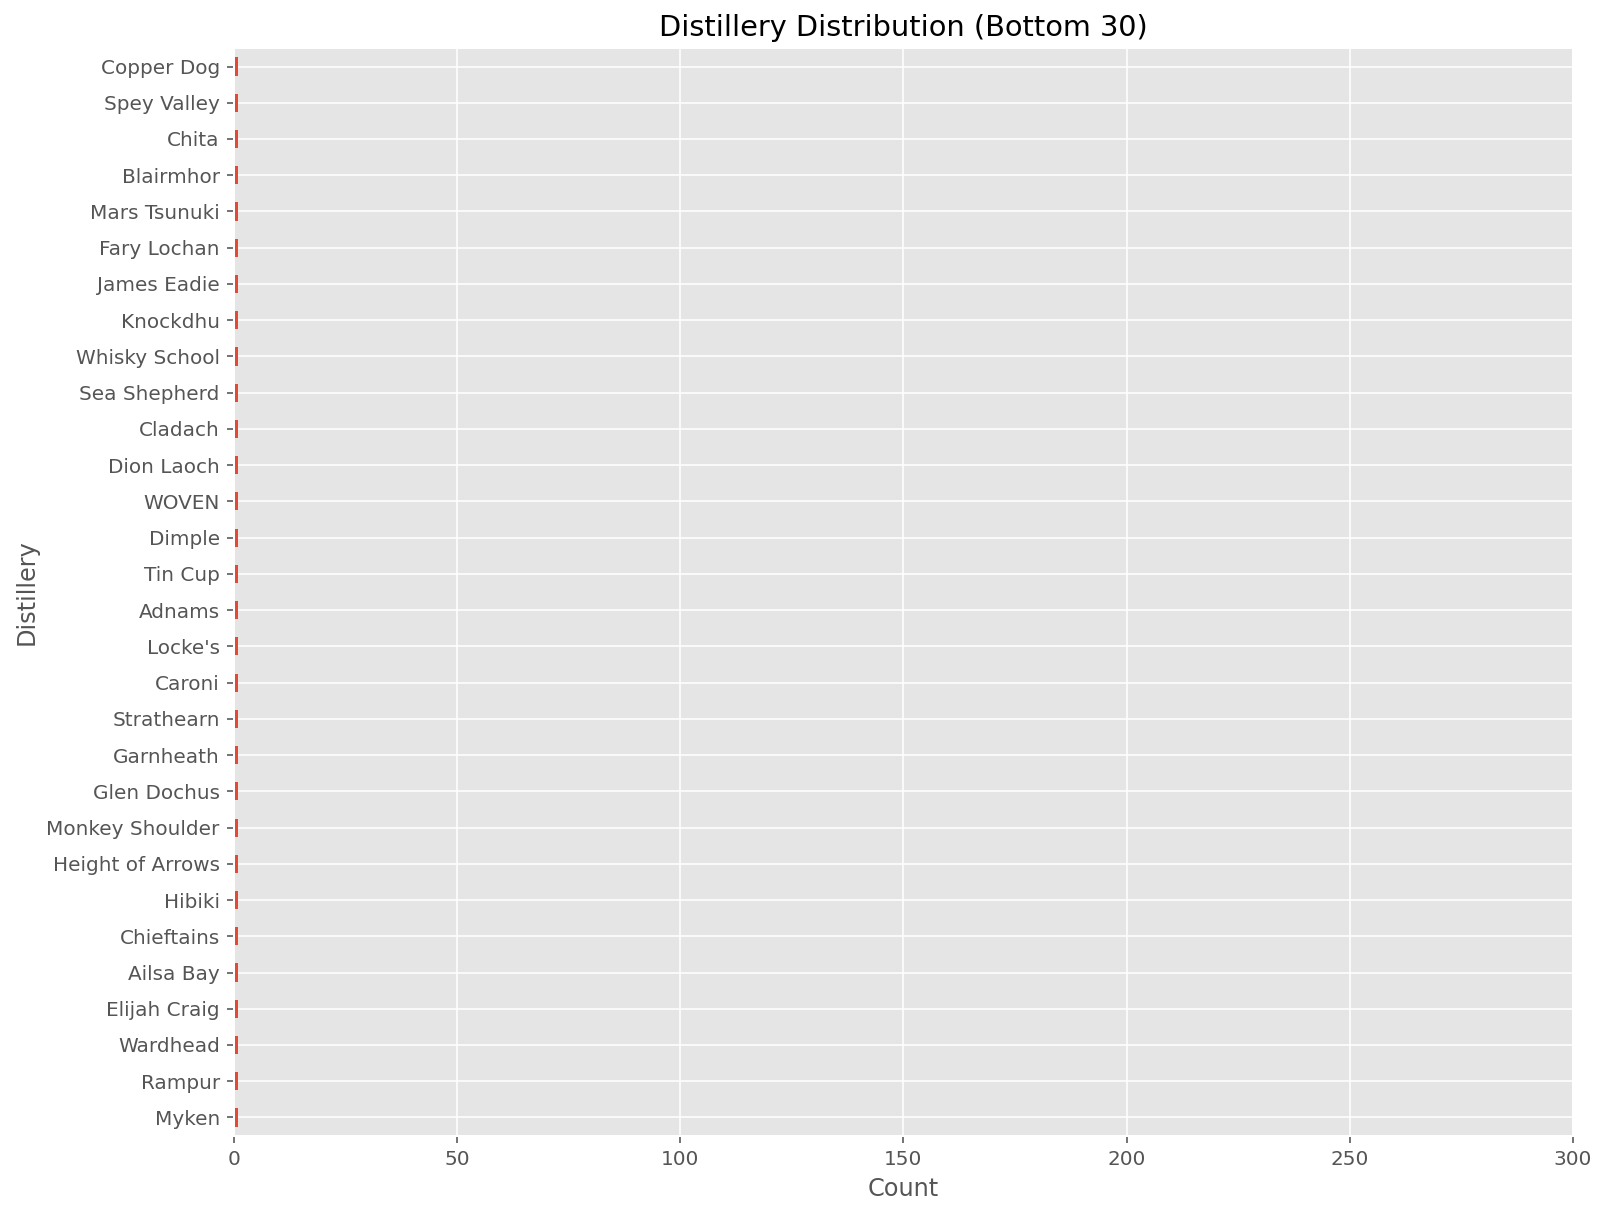

In [24]:
# distribution of distillery by value count
# BOTTOM 30
whisky.distillery.value_counts().tail(30).sort_values().plot(kind="barh", figsize=(12,10))
plt.title("Distillery Distribution (Bottom 30)")
plt.xlabel("Count")
plt.ylabel("Distillery")
plt.xlim([0,300])

plt.savefig("images/02 Distillery Distribution (Bottom 30).png", bbox_inches="tight")
plt.savefig("images/02 Distillery Distribution (Bottom 30).pdf", bbox_inches="tight")

There are a large number of distilleries that only have a few whiskies attached to them. I will identify counts below 5 and set their distillery as "Other".

This value of 5 appears to strike a balance between keeping the data relevant whilst reducing the number of unique values.

In [25]:
# number of counts for each value i.e. value_counts
distillery_counts = whisky.distillery.value_counts()
# identify counts below 5
distillery_idx = distillery_counts[distillery_counts.lt(5)].index
# use boolean indexing to replace category
whisky.loc[whisky.distillery.isin(distillery_idx), "distillery"] = "Other"

In [26]:
whisky.distillery.nunique()

199

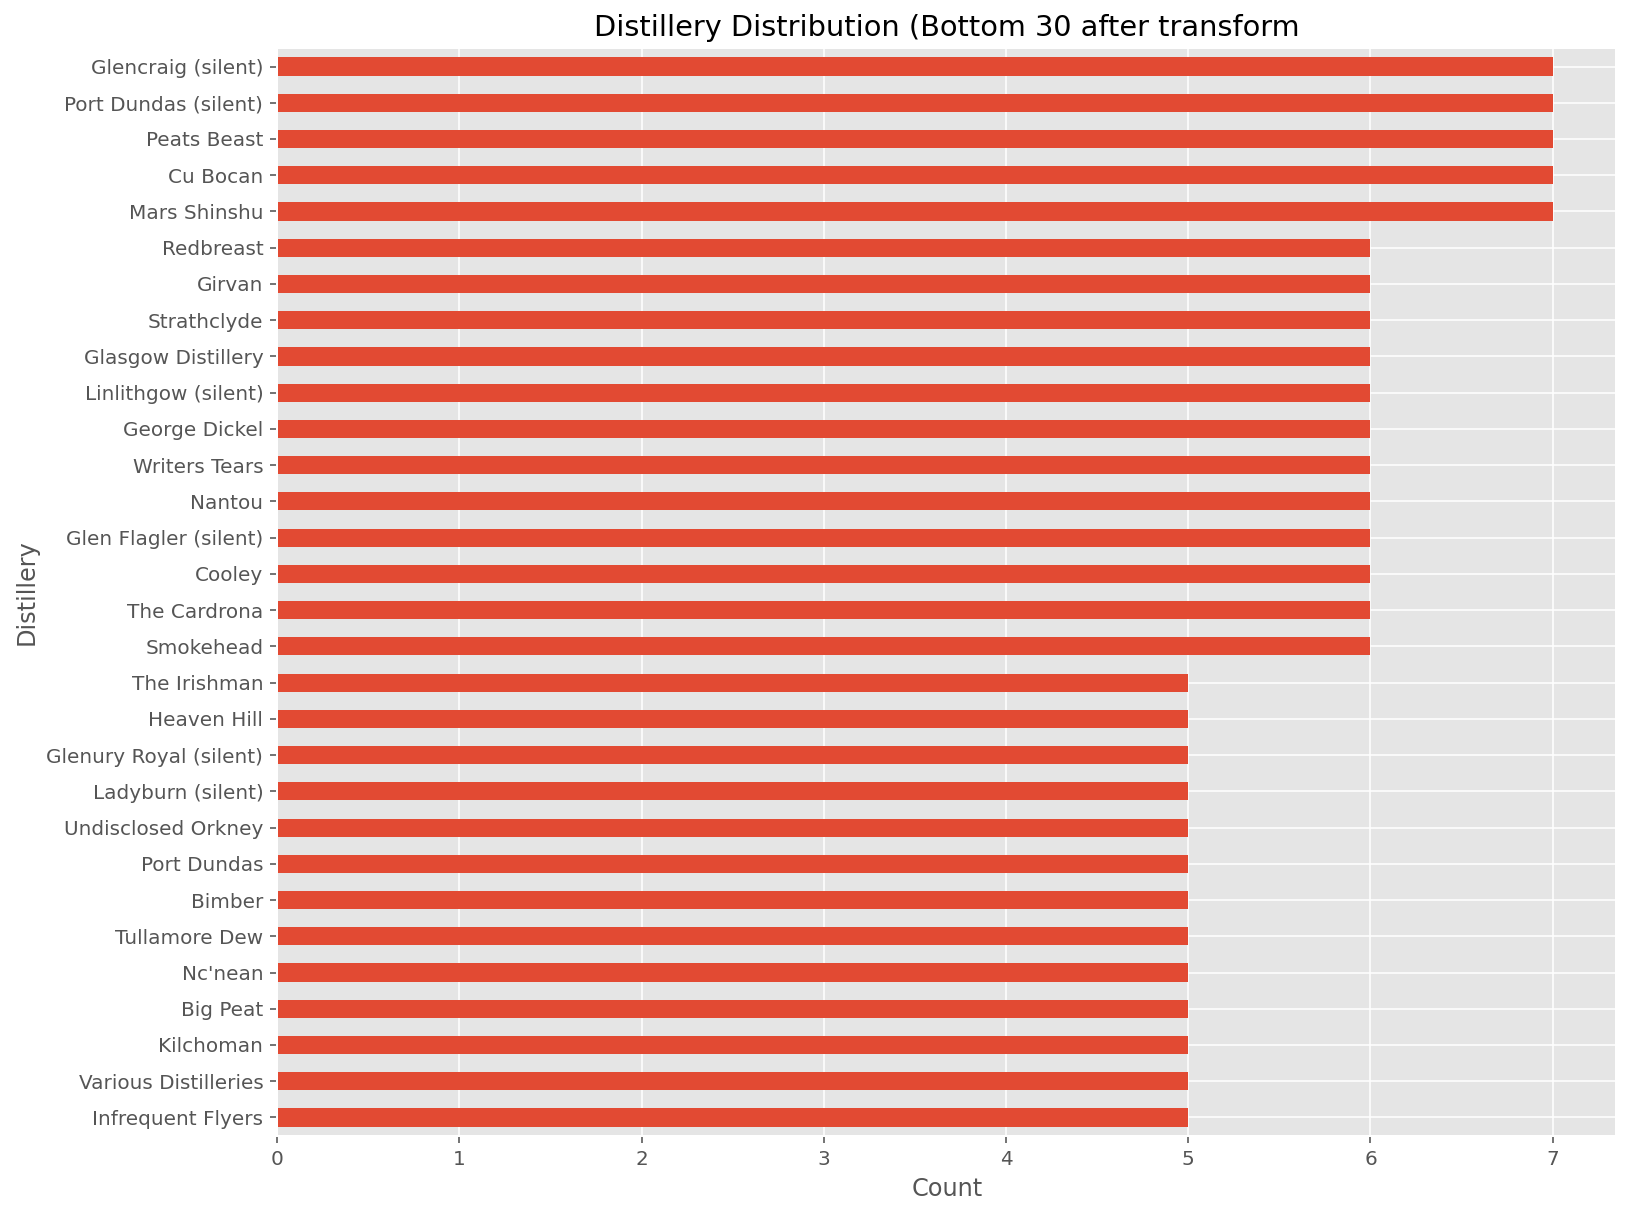

In [27]:
# distribution of distillery by value count (unique distilleries reduced)
# BOTTOM 30
whisky.distillery.value_counts().tail(30).sort_values().plot(kind="barh", figsize=(12,10))
plt.title("Distillery Distribution (Bottom 30 after transform")
plt.xlabel("Count")
plt.ylabel("Distillery")
#plt.xlim([0,300])

plt.savefig("images/03 Distillery Distribution (Bottom 30) 5 or more.png", bbox_inches="tight")
plt.savefig("images/03 Distillery Distribution (Bottom 30) 5 or more.pdf", bbox_inches="tight")

### 1.2.2 Investigate "series" Column

Series refers to the edition, so it narrows down the whisky produced by the distillery. Typically a single distillery will produce numerous different whiskies, referred to here as "series"

In [28]:
whisky.series.nunique()

4143

In [29]:
whisky.series.value_counts()

Connoisseurs Choice                              280
Single Highland Malt                              81
Highland Single Malt                              81
Speyside Single Malt Scotch                       77
Rare Malts                                        67
                                                ... 
The English Batch 1                                1
Coopers Choice Single Cask # 9702                  1
Exploration Pack Gift Set (1 x 70c + 2 x 5cl)      1
Gran Reserva - Chinese New Year 2021               1
02.2 Orpheus                                       1
Name: series, Length: 4143, dtype: int64

In [30]:
whisky.series.isnull().sum()

0

There are over 4,000 unique values for "series" (out of approx. 6,200 rows). I will therfore treat this as text for NLP. At least there are no missing values.

### 1.2.3 Investigate "cask_strength" Column

Cask strength (is a term used by whisky producers to describe a whisky that has not been substantially diluted (usually with water) after its storage in a cask for maturation. 

In [31]:
whisky.cask_strength.nunique()

2

In [32]:
whisky.cask_strength.value_counts()

No     3570
Yes    2650
Name: cask_strength, dtype: int64

Most whiskies are brought down to a standard percentage of alcohol by volume, or proof, by adding water to the spirit before bottling so that each batch is consistent. It therefore makes sense that the majority class here is not cask strength (i.e. it is diluted)

In [33]:
whisky.cask_strength.isnull().sum()

0

The column only contains two unique values, with no missing values.

### 1.2.4 Investigate "cask_wood_type" Column

This not only refers to the wood used for the cask, but whether the cask is new or previously used. Bourbon is typically stored in fresh casks whilst Scotch whisky matures in used casks, which have already been used previously e.g. for Bourbon or Sherry. The cask type therefore adds different complex flavours to the whisky character i.e. different casks offer different flavours.

In [34]:
whisky.cask_wood_type.nunique()

146

In [35]:
whisky.cask_wood_type.value_counts()

Oak                                  2383
Sherry                               1465
Bourbon                               540
Bourbon & Sherry Oak                  330
American Oak                          269
                                     ... 
American Oak & Calvados                 1
Sicilian Dessert Wine                   1
Palo Cortado                            1
Bourbon, Rum & Virgin Oak Barrels       1
Craft Indian Pale Ale                   1
Name: cask_wood_type, Length: 146, dtype: int64

Again, there are a lot of unique value here, with many only containing a single element.
I will explore further to see if the number of unique values can be reduced.

In [36]:
whisky.cask_wood_type.value_counts().head(20)

Oak                            2383
Sherry                         1465
Bourbon                         540
Bourbon & Sherry Oak            330
American Oak                    269
Wine                            139
Port                            125
American Oak & European Oak      90
Rum                              68
Oloroso Sherry                   64
Refill Hogsheads                 44
Pedro Ximenez                    40
Madeira Wine                     37
Sauternes Wine                   33
Hogshead                         29
Marsala Wine                     26
French Oak                       23
Refill Bourbon Barrel            23
Various Cask Wood                17
Refill Sherry Butt               16
Name: cask_wood_type, dtype: int64

Investigating the feature more in depth reveals many of the cask types can be grouped together. I will limit the cask types as follows:

In [37]:
# List of possible cask types
cask_types = ['Oak', 'Sherry', 'Bourbon', 'Wine', 'Port', 'Rum', 'Mixed', 'Other']

Step 1: Check if column string contains words from list and make that the column text.

In [38]:
# Strip out all other text
whisky['cask_type'] = (whisky['cask_wood_type'].str.findall('|'.join(cask_types))
                                  .str.join(',').replace('','Other'))

In [39]:
# investigate replaced text (it should only contain text from the list above)
whisky['cask_type'].value_counts()

Oak                        2742
Sherry                     1590
Bourbon                     622
Bourbon,Sherry,Oak          333
Wine                        281
Other                       258
Port                        130
Oak,Oak                      92
Rum                          69
Oak,Bourbon                  14
Bourbon,Oak                  11
Bourbon,Port                 10
Bourbon,Wine                  8
Bourbon,Sherry                7
Bourbon,Rum                   7
Oak,Oak,Oak                   5
Sherry,Port                   3
Oak,Rum                       3
Bourbon,Sherry,Wine           3
Oak,Sherry,Wine               2
Sherry,Port,Rum               2
Sherry,Oak                    2
Bourbon,Sherry,Oak,Wine       1
Oak,Port                      1
Bourbon,Rum,Oak               1
Bourbon,Sherry,Port,Rum       1
Bourbon,Sherry,Rum            1
Sherry,Bourbon,Rum            1
Oak,Sherry                    1
Wine,Wine                     1
Bourbon,Sherry,Oak,Port       1
Sherry,B

Step 2: I notice that some single wood types are repeated e.g. Oak,Oak,Oak and Wine,Wine. I will deal with these manually.

In [40]:
# replace repetitive words with a single entry of the word
whisky['cask_type'] = np.where(whisky['cask_type'].str.contains("Oak,Oak"), "Oak", whisky['cask_type'])
whisky['cask_type'] = np.where(whisky['cask_type'].str.contains("Oak,Oak,Oak"), "Oak", whisky['cask_type'])
whisky['cask_type'] = np.where(whisky['cask_type'].str.contains("Wine,Wine"), "Wine", whisky['cask_type'])

In [41]:
# to check:
# whisky['cask_type'].value_counts()

Step 3: Replace all entries with more than one wood type with "Mixed".

In [42]:
# more than one wood type is now indicated by a "," separating the different wood types
# I'm not interested in the mix combinations, just that it is "mixed".
whisky['cask_type'] = np.where(whisky['cask_type'].str.contains(","), "Mixed", whisky['cask_type'])

In [43]:
# to check:
# whisky['cask_type'].value_counts()

In [44]:
# drop "cask_wood_type" column
whisky.drop('cask_wood_type', axis=1, inplace=True)

In [45]:
# Check for any missing values
whisky.cask_type.isnull().sum()

0

### 1.2.5 Investigate "single_cask" Column

Single cask refers to whisky drawn from one individual cask. No two single cask whiskies are the same, and they are intended to take on the unique flavour of their individual casks.

Side note: Single malt whisky isn’t necessarily drawn directly from cask to bottle. The word ‘single’ here can be somewhat misleading, as single malt can (and often does) come from a variety of casks. The term ‘single malt’ instead refers to a whisky that is produced by a single distillery using a single malted grain (in Scotch whisky-making, this grain must be barley and the whisky must be distilled using a pot still). 

In [46]:
whisky.single_cask.nunique()

2

In [47]:
whisky.single_cask.value_counts()

No     4356
Yes    1845
Name: single_cask, dtype: int64

In [48]:
# how is that proportionally?
whisky.single_cask.value_counts(normalize=True)

No     0.702467
Yes    0.297533
Name: single_cask, dtype: float64

In [49]:
whisky.single_cask.isnull().sum()

19

Let's investigate the missing values. I could assign the most likely value (mode) here, but I will rather investigate the "cask_wood_type" and compare.

In [50]:
# Identify the rows in question:
whisky[whisky.single_cask.isnull()]

distillery                                             series  \
2058  William Grant's                         Signature - Blended Scotch   
2111      Cragganmore                           Distiller's Edition 2019   
2162   Johnnie Walker                    Private Collection 2017 Edition   
2226           Cardhu                               2019 Special Release   
2229        Lagavulin                             The Distillers Edition   
2420    Jack Daniel's         Tennessee Cider 4 x 330ml Bottle Gift Pack   
2483        Lagavulin                             The Distillers Edition   
2484             Oban                             The Distillers Edition   
2849        Lagavulin                               2017 Special Release   
2853         Caol Ila                               2017 Special Release   
3002        Lagavulin                             The Distillers Edition   
3133            Other  Baileys Irish Cream Truffles Gift Set (Hard To...   
3164            Other  Rekorderlig Cider & Mug Gift Set (Hard To Find...   
3216        Lagavulin           2016 Special Release - 200th Anniversary   
3294        Lagavulin              1826 - 2016 200th Anniversary Edition   
3408    Jack Daniel's                                          Hip Flask   
3536        Clynelish       Special Release - Select Reserve 2nd Edition   
3914  Whisky Liqueurs        Southern Comfort & Cocktail Shaker Gift Set   
4806         Balvenie                     Three Bottle Wooden Carry Tray   

      vintage year_bottled          age alcohol_abv cask_strength single_cask  \
2058      NaN          NaN          NaN         40%            No         NaN   
2111   2007.0         2019  12 year old         40%            No         NaN   
2162      NaN         2017          NaN      46.80%            No         NaN   
2226   2004.0         2019  14 year old         55%           Yes         NaN   
2229   2002.0         2018  16 year old         43%            No         NaN   
2420      NaN          NaN          NaN       5.50%            No         NaN   
2483   2001.0         2017          NaN         43%            No         NaN   
2484   2003.0         2017          NaN         43%            No         NaN   
2849      NaN         2017  12 year old      56.50%           Yes         NaN   
2853      NaN         2017  18 year old      59.80%           Yes         NaN   
3002   2000.0         2016  16 year old         43%            No         NaN   
3133      NaN          NaN          NaN          1%            No         NaN   
3164      NaN          NaN          NaN          4%            No         NaN   
3216      NaN         2016  12 year old      57.70%           Yes         NaN   
3294      NaN         2016   8 year old         48%            No         NaN   
3408      NaN          NaN          NaN          0%            No         NaN   
3536      NaN         2015          NaN      56.10%           Yes         NaN   
3914      NaN          NaN          NaN         35%            No         NaN   
4806      NaN          NaN          NaN         40%            No         NaN   

              packaging     bottler   country    stopper bottle_type  \
2058            Unboxed  Distillery  Scotland  Screw Cap    Standard   
2111       Original Box  Distillery  Scotland       Cork    Standard   
2162  Special Packaging  Distillery  Scotland       Cork    Standard   
2226     Cardboard Tube  Distillery  Scotland       Cork    Standard   
2229       Original Box  Distillery  Scotland       Cork    Standard   
2420     Gift Packaging  Distillery   America      Metal    Standard   
2483       Original Box  Distillery  Scotland       Cork    Standard   
2484     Cardboard Tube  Distillery  Scotland       Cork    Standard   
2849       Original Box  Distillery  Scotland       Cork    Standard   
2853       Original Box  Distillery  Scotland       Cork    Standard   
3002       Original Box  Distillery  Scotland       Cork    Standard   
3133 

A significant number of these missing values can be deciphered based on whether the "cask_wood_type" column contains a single value or multiple.

The remaining missing values will be assigned the mode of "single_cask".

In [51]:
# df.loc[row_indexer, col_indexer] = "new_value"
whisky.loc[2058, 'single_cask'] = "Yes"
whisky.loc[2111, 'single_cask'] = "No"
whisky.loc[2162, 'single_cask'] = "Yes"
whisky.loc[2226, 'single_cask'] = "Yes"
whisky.loc[2229, 'single_cask'] = "No"
whisky.loc[2420, 'single_cask'] = "Yes"
whisky.loc[2483, 'single_cask'] = "Yes"
whisky.loc[2484, 'single_cask'] = "Yes"
whisky.loc[2849, 'single_cask'] = "Yes"
whisky.loc[2853, 'single_cask'] = "Yes"
whisky.loc[3002, 'single_cask'] = "Yes"
whisky.loc[3133, 'single_cask'] = "Yes"
whisky.loc[3164, 'single_cask'] = "Yes"
whisky.loc[3216, 'single_cask'] = "Yes"
whisky.loc[3294, 'single_cask'] = "Yes"
whisky.loc[3408, 'single_cask'] = "Yes"
whisky.loc[3536, 'single_cask'] = "Yes"
whisky.loc[3914, 'single_cask'] = "Yes"
whisky.loc[4806, 'single_cask'] = "Yes"

In [52]:
# to check:
# whisky[whisky.single_cask.isnull()]

At this stage, any remaining missing values will be assigned the mode of "single_cask".

In [53]:
whisky.single_cask.fillna(whisky.single_cask.mode()[0], inplace=True)

In [54]:
# to check (either):
# whisky[whisky.single_cask.isnull()]
# whisky.single_cask.isnull().sum()

### 1.2.6 Investigate "packaging" Column

Packaging refers to how the item is packaged.

In [55]:
whisky.packaging.nunique()

18

In [56]:
whisky.packaging.value_counts()

Original Box         2914
Cardboard Tube       1130
Unboxed               861
Wooden Box            531
Tin Tube              194
HTFW Gift Box         168
Special Packaging     156
Gift Packaging         84
Metal Box              46
Satin Lined Box        41
Leatherette Box        26
Aluminium Tube         17
Cloth Bag              16
Perspex Box            10
Velvet Bag              8
Velvet Box              7
Hessian Bag             6
Box Set                 5
Name: packaging, dtype: int64

In [57]:
whisky.packaging.isnull().sum()

0

### 1.2.7 Investigate "bottler" Column

Bottler here refers to whether the whisky is bottled at the distillery it is made, or at a bottler independent of the distilling process.

In [58]:
whisky.bottler.nunique()

54

In [59]:
whisky.bottler.value_counts()

Distillery                           4118
Gordon and MacPhail                   749
Independent                           232
Coopers Choice                        122
Scotch Malt Whisky Society            116
Douglas Laing Co                      105
Elixir Distillers                      78
Duncan Taylor                          64
Ian Macleod                            62
WM Cadenhead                           60
Signatory                              52
Wemyss Malts                           51
Murray McDavid                         39
Compass Box                            34
Chieftain's                            31
Flora and Fauna                        29
Mackillop's Choice                     29
Maverick Drinks                        27
Berry Bros & Rudd                      27
James Eadie                            19
Gleann Mor                             18
Speciality Drinks                      14
Hanna Merchants                        12
Mossburn                          

In [60]:
whisky.bottler.isnull().sum()

0

The overwhelming majority is "Distillery".
I shall therefore replace all non-Distillery values with "Independent"
The feature then becomes binary: Whether bottled at the "Distillery" producing the whisky, or by an "Independent" bottler. I'm not sure how this feature will be useful, but we can investigate this further during the data exploration stage.

In [61]:
whisky['bottler'] = np.where(~whisky['bottler'].str.contains("Distillery", na=False),
                             "Independent", whisky['bottler'])

In [62]:
# to check:
# whisky.bottler.value_counts()

### 1.2.8 Investigate "country" Column

Country in which the whisky is produced.

In [63]:
whisky.country.nunique()

21

In [64]:
whisky.country.value_counts()

Scotland        5621
Ireland          176
England           83
Japan             83
America           59
India             44
Taiwan            35
Wales             26
Sweden            17
New Zealand       15
Canada            14
Australia         11
France             9
Israel             8
Denmark            8
Finland            4
South Africa       2
Italy              2
Norway             1
Spain              1
Mexico             1
Name: country, dtype: int64

In [65]:
whisky.country.value_counts(normalize=True).head()

Scotland    0.903698
Ireland     0.028296
England     0.013344
Japan       0.013344
America     0.009486
Name: country, dtype: float64

In [66]:
whisky.country.isnull().sum()

0

The majority of the whisky data I've obtained originates from Scotland. This can partly be attributed to the fact that I obtained the data from a British website. Scotland and Ireland are the traditional powerhouses of whisky distillers. The USA and Japan have sizeable and growing whisky industry. Online research indicates that India is currently the fastest growing new market for whisky production.

### 1.2.9 Investigate "stopper" Column

Stopper refers to how the bottle is sealed.

In [67]:
whisky.stopper.nunique()

7

In [68]:
whisky.stopper.value_counts()

Cork               5682
Screw Cap           500
Wax Seal             17
Glass / Crystal      11
Metal                 6
Spring Cap            2
Ceramic               1
Name: stopper, dtype: int64

In [69]:
whisky.stopper.value_counts(normalize=True)

Cork               0.913652
Screw Cap          0.080399
Wax Seal           0.002734
Glass / Crystal    0.001769
Metal              0.000965
Spring Cap         0.000322
Ceramic            0.000161
Name: stopper, dtype: float64

The majority of the whisky data I've obtained appears to be corked. 

In [70]:
whisky.stopper.isnull().sum()

1

In [71]:
whisky[whisky.stopper.isnull()]

distillery                          series  vintage year_bottled  age  \
4806   Balvenie  Three Bottle Wooden Carry Tray      NaN          NaN  NaN   

     alcohol_abv cask_strength single_cask packaging     bottler   country  \
4806         40%            No         Yes   Unboxed  Distillery  Scotland   

     stopper bottle_type bottle_size  neck_level description    price  \
4806     NaN    Standard        70cl  Full Level         NaN  £219.95   

      number_bottled cask_type  
4806             NaN       Oak

Here is the culprit in question: 

https://www.htfw.com/balvenie-three-bottle-wooden-carry-tray

So this isn't a whisky, but rather a whisky tray. I shall remove it.

In [72]:
whisky.dropna(subset=['stopper'], inplace=True)

In [73]:
# to check (either):
# whisky[whisky.stopper.isnull()]
# whisky.single_cask.isnull().sum()

### 1.2.10 Investigate "bottle_type" Column

Bottle type refers to the shape and general size of the bottle.

In [74]:
whisky.bottle_type.nunique()

3

In [75]:
whisky.bottle_type.value_counts()

Standard     6215
Dumpy           3
Miniature       1
Name: bottle_type, dtype: int64

In [76]:
whisky.bottle_type.isnull().sum()

0

This column won't provide any meaningful information and can be dropped.

In [77]:
whisky.drop('bottle_type', axis=1, inplace=True)

### 1.2.11 Investigate "neck_level" Column

Neck level refers to the level to which the bottle is filled.

In [78]:
whisky.neck_level.nunique()

6

In [79]:
whisky.neck_level.value_counts()

Full Level        6150
Base Neck           37
Top Shoulder        13
Mid Shoulder         9
Low Shoulder         8
Below Shoulder       2
Name: neck_level, dtype: int64

In [80]:
whisky.neck_level.isnull().sum()

0

Again, this column won't provide any meaningful information so it can also be dropped.

In [81]:
whisky.drop('neck_level', axis=1, inplace=True)

### 1.2.12 Investigate "description" Column

A brief description of the whisky including any details or special points of interest.

In [82]:
whisky.description.nunique()

4597

In [83]:
whisky.description.isnull().sum()

1486

It makes sense that there are a lot of unique descriptions.
There are also many missing values. As this column will be used for NLP, I will merely replace empty/null values with blank descriptions.

In [84]:
whisky.description.fillna("", inplace=True)

## 1.3 Numerical Features

Although I would like to start with my target variable (price), I notice that the price is based on the bottle_size. I will first investigate this column, and then use it to standardize the price based on a set volume (say price/litre).

### 1.3.1 Investigate "bottle_size" Column

Bottle size refers to the volume of the bottle measured in centiletres (100cL = 1L)

In [85]:
whisky.bottle_size.value_counts().head()

70cl     5441
75cl      439
100cl     127
50cl      106
35cl       19
Name: bottle_size, dtype: int64

In [86]:
whisky.bottle_size.isnull().sum()

0

In [87]:
# Function to clean object columns that are better suited as integer/float columns
def string_to_num(x):
    """Converts string to an integer, removing any symbols or special characters"""
    # remove special characters:
    try:
        x = re.sub('[^\d\.]','', x)
    except:
        np.nan
    return x

In [88]:
# clean bottle_size column (bottle size in cl)
whisky.bottle_size = whisky.bottle_size.apply(string_to_num)
# whisky.bottle_size     # check

In [89]:
# convert object data type to float
whisky["bottle_size"] = whisky["bottle_size"].astype(float)

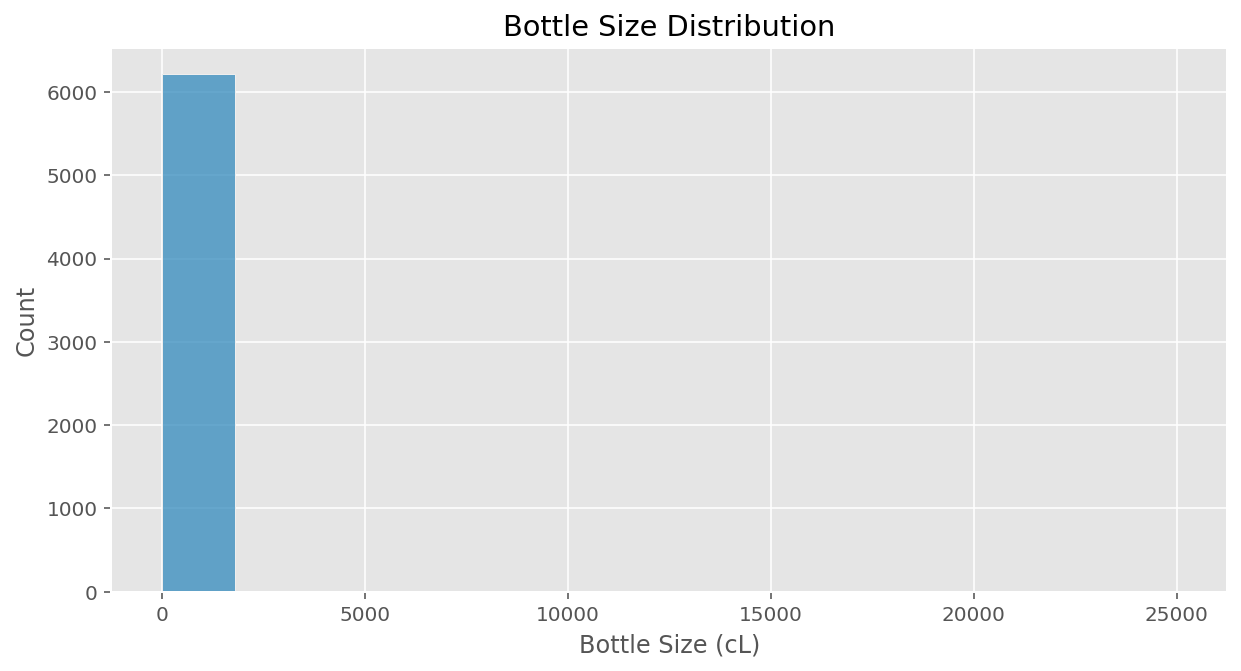

In [90]:
# bottle_size distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.bottle_size)

plt.title('Bottle Size Distribution')
plt.xlabel('Bottle Size (cL)')
plt.ylabel('Count')

plt.savefig("images/04 Bottle Size Distribution.png", bbox_inches="tight")
plt.savefig("images/04 Bottle Size Distribution.pdf", bbox_inches="tight")

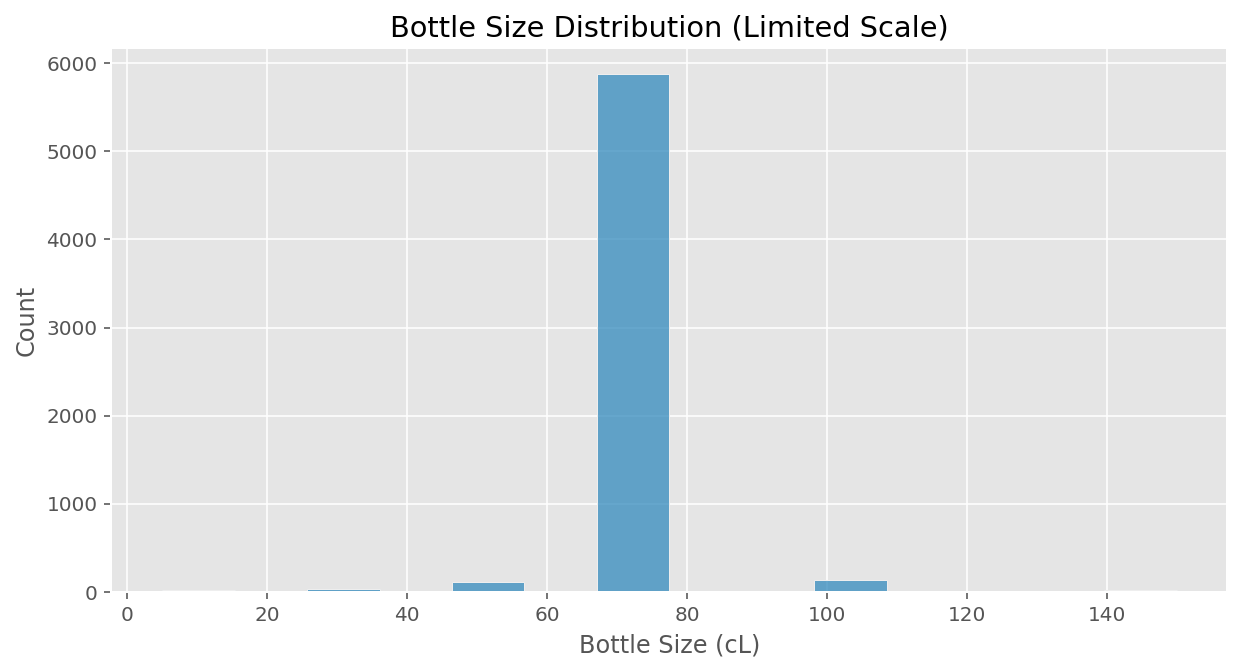

In [91]:
# bottle_size distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.bottle_size[whisky.bottle_size<200])

plt.title('Bottle Size Distribution (Limited Scale)')
plt.xlabel('Bottle Size (cL)')
plt.ylabel('Count')

plt.savefig("images/05 Bottle Size Distribution.png", bbox_inches="tight")
plt.savefig("images/05 Bottle Size Distribution.pdf", bbox_inches="tight")

The bottle_size distribution is highly skewed to the right because I have a few 250L casks. I will remove outliers after cleaning all numerical columns.

### 1.3.2 Investigate "price" Column

The price of the whisky - my target variable! Note the price is per bottle, not per unit of volume, and I will standardize it accordingly.

In [92]:
whisky.price.value_counts().head()

£199.95    242
£99.95     230
£299.95    189
£599.95    159
£399.95    148
Name: price, dtype: int64

Interesting observation here that the top 5 prices are multiples of £100

In [93]:
# clean price column (price in GBP)
whisky.price = whisky.price.apply(string_to_num)
# whisky.price     # check

In [94]:
# convert object data type to float
whisky["price"] = whisky["price"].astype(float)

In [95]:
# convert price to unit_price (GBP/litre)
whisky["unit_price"] = whisky["price"] / (whisky["bottle_size"]/100)

In [96]:
# drop "price" column
whisky.drop('price', axis=1, inplace=True)

In [97]:
whisky.unit_price.describe()

count      6219.000000
mean        890.113045
std        5100.911832
min           1.178571
25%          98.500000
50%         214.214286
75%         571.357143
max      266666.666667
Name: unit_price, dtype: float64

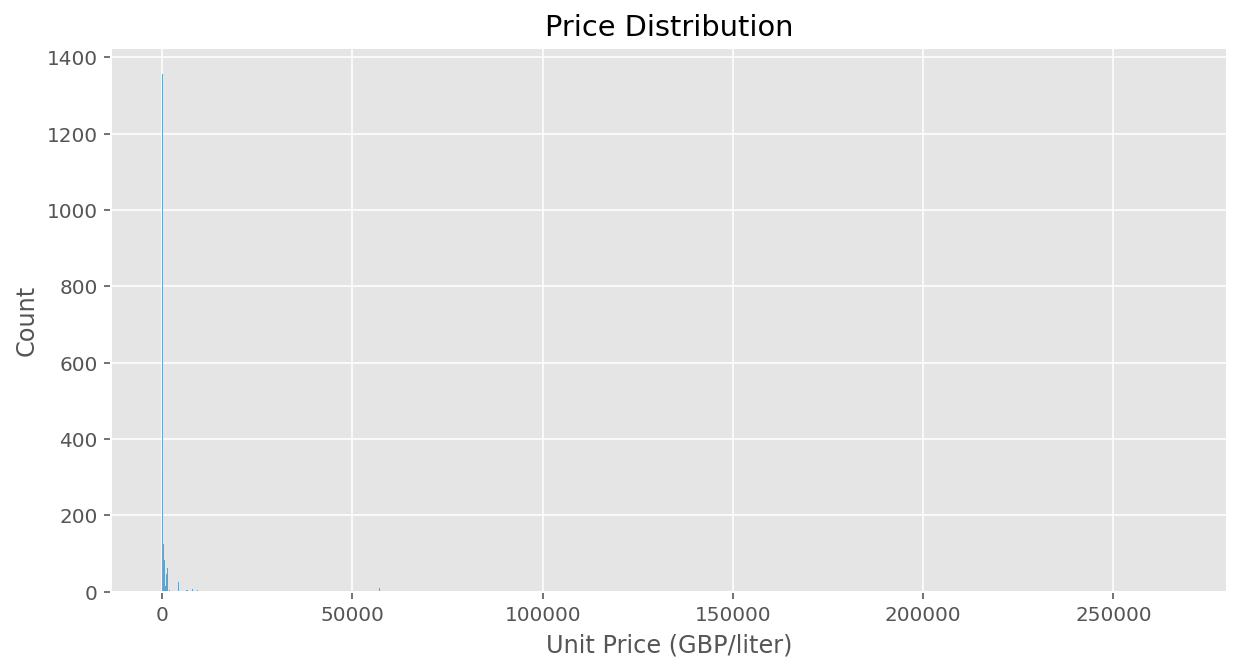

In [98]:
# unit_price distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.unit_price)

plt.title('Price Distribution')
plt.xlabel('Unit Price (GBP/liter)')
plt.ylabel('Count')

plt.savefig("images/06 Price Distribution.png", bbox_inches="tight")
plt.savefig("images/06 Price Distribution.pdf", bbox_inches="tight")

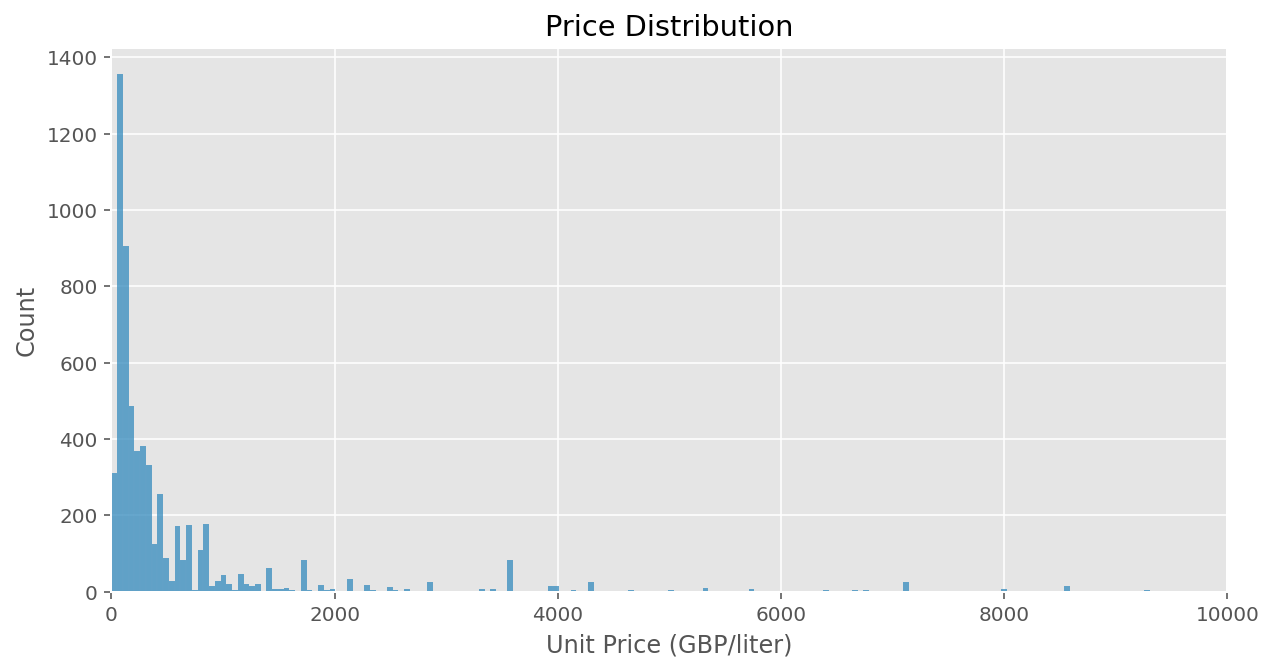

In [99]:
# unit_price distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.unit_price)

plt.title('Price Distribution')
plt.xlabel('Unit Price (GBP/liter)')
plt.ylabel('Count')
plt.xlim([0,10000])

plt.savefig("images/07 Price Distribution.png", bbox_inches="tight")
plt.savefig("images/07 Price Distribution.pdf", bbox_inches="tight")

In [100]:
# Identify the most expensive by sorting dataframe by unit_price
whisky.sort_values('unit_price', ascending=False).head(1)

distillery            series  vintage year_bottled          age  \
1507   Macallan  Anniversary Malt   1928.0         1983  50 year old   

     alcohol_abv cask_strength single_cask   packaging     bottler   country  \
1507      38.60%           Yes          No  Wooden Box  Distillery  Scotland   

     stopper  bottle_size                                        description  \
1507    Cork         75.0  The Holy Grail of Rare and Collectable Whisky ...   

      number_bottled cask_type     unit_price  
1507           500.0    Sherry  266666.666667

Here it is:
https://www.htfw.com/macallan-anniversary-malt-1928-50-year-old

£200,000 for a bottle (or £267,000/litre)!

Price distribution is not uniformly distributed, and heavily skewed to the right (positively skewed). 

In the plot above we can see the majority of whisky prices are significantly less than this maximum value! Further, as whisky price is my target and it is not uniformly distributed I first need to transform it. Machine-learning (ML) algorithms generally interpret data more effectively when data is more uniformly distributed.

I will use a logarithmic transformation to begin with. Other transformations, such as Box-Cox or Yeo-Johnson may more appropriate and will be investigated at a later stage.

In [101]:
# log transform unit_price
whisky['log_unit_price'] = np.log(whisky['unit_price'])

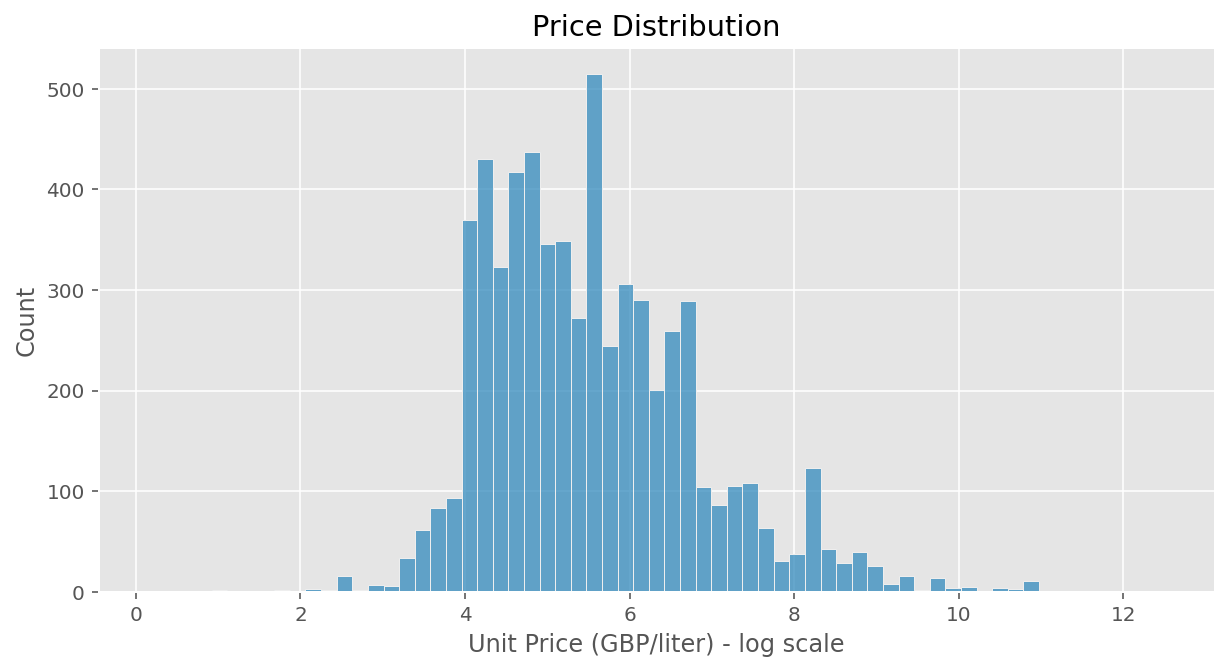

In [102]:
# log_unit_price distribution plot (log scale)
plt.figure(figsize=[10,5])
sns.histplot(whisky.log_unit_price)

plt.title('Price Distribution')
plt.xlabel('Unit Price (GBP/liter) - log scale')
plt.ylabel('Count')

plt.savefig("images/08 Price Distribution (log scale).png", bbox_inches="tight")
plt.savefig("images/08 Price Distribution (log scale).pdf", bbox_inches="tight")

This is already closer to a normal distribution at this point. I still want to ensure outliers are removed.

### 1.3.3 Investigate "vintage" Column

Vintage refers to the year the distilling process commenced.

Keep in mind that the next three columns are related as follows:

Year Bottled = Vintage + Age

These terms will be explained later on, but are already somewhat self explanatory.

In [103]:
whisky.vintage.nunique()

85

In [104]:
whisky.vintage.unique()

array([2009., 2008., 2011., 1987., 1997., 2001., 2017., 1998., 1996.,
       2010.,   nan, 2016., 2014., 2012., 2018., 1995., 1999., 1989.,
       2000., 2006., 1990., 1979., 1986., 2015., 2013., 1976., 1978.,
       2007., 2004., 1985., 1988., 1993., 1991., 2005., 2003., 1984.,
       1994., 1980., 2002., 1992., 1983., 1968., 1975., 1951., 1973.,
       1970., 1950., 1966., 1967., 1963., 1977., 1969., 1959., 1955.,
       1957., 1954., 1956., 1958., 1953., 1965., 1974., 1947., 1940.,
       1972., 1942., 1938., 1960., 1952., 1948., 1982., 1937., 1936.,
       1939., 1949., 1935., 1928., 1981., 1961., 1964., 1962., 1971.,
       1946., 1943., 1945., 1902., 1941.])

In [105]:
whisky.vintage.isnull().sum()

2755

This column appears clean, except for the missing values. I will deal with missing values after also investigating the "year_bottled" and "age" columns.
The datatype is also float.

### 1.3.4 Investigate "year_bottled" Column

Year bottled refers to the year the whisky was bottled, and effectively ends the distilling process.

In [106]:
whisky.year_bottled.nunique()

66

In [107]:
whisky.year_bottled.unique()

array(['2021', '2018', '2019', '2022', '2020', nan, '2015', '2000',
       "1990's", '1996', '2009', '2008', '2016', '2017', '2013', "1970's",
       '2014', "1980's", '1998', '1980', '1997', '2005', '1995', '2007',
       '2006', '1984', '2002', '1983', '2011', '1962', '1977', "1960's",
       '2001', '2003', '1975', '1985', '1993', '1974', '1986', '2010',
       '2012', '1994', '1973', '1971', '1972', '1976', '1992', '2004',
       '1981', '1999', "2000's", '1990', "2010's", '1991', "1950's",
       '1969', '1978', '1982', '1987', '1989', '1967', '1952', '1939',
       '470', '1988', '1979', '1950'], dtype=object)

In [108]:
whisky.year_bottled.isnull().sum()

1403

So we have some values that are decades and not individual years.

e.g. 1950's, 1960's, 1970's, 1980's etc.

I will investigate this a bit further:

In [109]:
whisky[whisky.year_bottled=="1950's"]

distillery         series  vintage year_bottled          age alcohol_abv  \
2764    Dalmore  Highland Malt      NaN       1950's  12 year old         40%   

     cask_strength single_cask packaging     bottler   country stopper  \
2764            No          No   Unboxed  Distillery  Scotland    Cork   

      bottle_size                                        description  \
2764         75.0  One for the whisky historian and archivist.  A...   

      number_bottled cask_type  unit_price  log_unit_price  
2764             NaN       Oak  433.266667        6.071353

In [110]:
whisky[whisky.year_bottled=="1960's"]

distillery                    series  vintage year_bottled  \
1280      Springbank   Campbeltown Single Malt      NaN       1960's   
1281           Other    Liqueur Blended Scotch      NaN       1960's   
1520  Blended Whisky     Tom Jones Rare Scotch      NaN       1960's   
2798       Glenlivet      George & J.G Smith's      NaN       1960's   
2799       Clynelish        Ainslie & Heilbron      NaN       1960's   
3544  Blended Whisky  Black & White Spring Cap      NaN       1960's   
3562        Macallan        Pure Highland Malt   1937.0       1960's   

              age alcohol_abv cask_strength single_cask     packaging  \
1280  12 year old         46%            No          No       Unboxed   
1281  30 year old         40%            No          No  Original Box   
1520   8 year old         40%            No          No       Unboxed   
2798  15 year old         50%            No          No       Unboxed   
2799  12 year old         40%            No          No  Original Box   
3544          NaN         40%            No          No       Unboxed   
3562          NaN         40%            No          No       Unboxed   

          bottler   country     stopper  bottle_size  \
1280   Distillery  Scotland   Screw Cap         75.0   
1281   Distillery  Scotland        Cork         75.0   
1520   Distillery  Scotland        Cork         75.0   
2798  Independent  Scotland   Screw Cap         75.0   
2799   Distillery  Scotland   Screw Cap         75.0   
3544   Distillery  Scotland  Spring Cap         70.0   
3562  Independent  Scotland   Screw Cap         75.0   

                                            description  number_bottled  \
1280  Complete with original despatch note dated 28t...             NaN   
1281  This early 1960's bottled Ballantines 30 year ...             NaN   
1520  A very rare Scotch blend which was bottled in ...             NaN   
2798  Complete with original sales invoice dated 22n...             NaN   
2799  Probably the finest condition box and bottle o...             NaN   
3544  A scarce bottle of Black & White Whisky with a...             NaN   
3562  An very rare imperial measurement bottle of 19...             NaN   

     cask_type   unit_price  log_unit_price  
1280       Oak  5333.266667        8.581719  
1281       Oak  2666.600000        7.888560  
1520       Oak   666.600000        6.502190  
2798    Sherry  1466.600000        7.290702  
2799       Oak    63.933333        4.157841  
3544       Oak   571.357143        6.348014  
3562    Sherry  5333.266667        8.581719

Considering the relationship above (Year Bottled = Vintage + Age), I am missing information on the other two cases in all instances and therfore I cannot simply calculate the year bottled. Therefore, where value is a decade, I will replace it with the middle year of the decade

e.g. 1960's becomes 1965.

In [111]:
whisky.year_bottled = whisky.year_bottled.replace(
    ["1950's","1960's","1970's","1980's","1990's","2000's","2010's"],
    ["1955","1965","1975","1985","1995","2005","2015"])

In [112]:
# to check:
# whisky.year_bottled.unique()

One of the years is also 470, let's investigate it a bit further.

In [113]:
# Step 1: Identify the row in question:
whisky[whisky.year_bottled=='470']

distillery                       series  vintage year_bottled  \
5351  Blended Whisky  The Year Twenty Twenty 2020      NaN          470   

              age alcohol_abv cask_strength single_cask      packaging  \
5351  19 year old         42%            No          No  HTFW Gift Box   

         bottler   country stopper  bottle_size  \
5351  Distillery  Scotland    Cork         70.0   

                                            description  number_bottled  \
5351  In October 2009 just 470 of these were, using ...          2009.0   

     cask_type  unit_price  log_unit_price  
5351       Oak  142.785714        4.961345

Here is the culprit in question: 

https://www.htfw.com/blended-malt-the-year-twenty-twenty-2020-19-year-old

It looks like the "year_bottled" was swapped with the "number_bottled".
The year here should therefore be 2009.

In [114]:
# Step 2: Use .loc to amend the inconsistency
whisky.loc[5351, 'year_bottled'] = 2009
whisky.loc[5351, 'number_bottled'] = 470

In [115]:
# to check:
# whisky.year_bottled.unique()

In [116]:
# convert object data type to float
whisky["year_bottled"] = whisky["year_bottled"].astype(float)

### 1.3.5 Investigate "age" Column

The age of the whisky is the number of years the whisky spent distilling in a barrel. If a bottle of whisky shows an age statement, e.g. "12 Years Old" it means that the youngest whisky in the bottle is at least 12 years old. 

In [117]:
whisky.age.value_counts()

12 year old    609
10 year old    452
15 year old    295
18 year old    265
25 year old    242
              ... 
74 year old      1
68 year old      1
71 year old      1
2 year old       1
61 year old      1
Name: age, Length: 66, dtype: int64

In [118]:
whisky.age.unique()

array(['12 year old', '13 year old', '10 year old', '30 year old',
       '21 year old', '18 year old', '3 year old', '24 year old',
       '25 year old', '11 year old', nan, '5 year old', '6 year old',
       '1 year old', '19 year old', '17 year old', '29 year old',
       '9 year old', '15 year old', '31 year old', '42 year old',
       '27 year old', '33 year old', '7 year old', '8 year old',
       '45 year old', '43 year old', '14 year old', '16 year old',
       '20 year old', '35 year old', '32 year old', '28 year old',
       '22 year old', '23 year old', '26 year old', '4 year old',
       '36 year old', '40 year old', '50 year old', '2 year old',
       '38 year old', '78 year old', '34 year old', '39 year old',
       '48 year old', '41 year old', '37 year old', '47 year old',
       '52 year old', '49 year old', '53 year old', '44 year old',
       '60 year old', '59 year old', '58 year old', '55 year old',
       '56 year old', '46 year old', '74 year old', '71 year old',

In [119]:
# clean age column (age in years)
whisky.age = whisky.age.apply(string_to_num)
# whisky.age     # check

In [120]:
# convert object data type to float
whisky["age"] = whisky["age"].astype(float)

#### Consider "year_bottled", "vintage", and "age" columns together based on their relationship:

In [121]:
whisky[["vintage", "year_bottled", "age"]].isnull().sum()

vintage         2755
year_bottled    1403
age             1336
dtype: int64

In [122]:
# impute vintage where year_bottled and age are present
whisky['vintage'] = whisky.apply(
    lambda row: row['year_bottled']-row['age'] if np.isnan(row['vintage'])
    else row['vintage'],
    axis=1)

In [123]:
# impute year_bottled where vintage and age are present
whisky['year_bottled'] = whisky.apply(
    lambda row: row['vintage']+row['age'] if np.isnan(row['year_bottled'])
    else row['year_bottled'],
    axis=1)

In [124]:
# impute age where year_bottled and vintage are present
whisky['age'] = whisky.apply(
    lambda row: row['year_bottled']-row['vintage'] if np.isnan(row['age'])
    else row['age'],
    axis=1)

In [125]:
whisky[["vintage", "year_bottled", "age"]].isnull().sum()

vintage         1974
year_bottled    1371
age             1248
dtype: int64

I was able to impute some of the missing values where the other two features were present. However I will need a more robust tool to impute the remaining missing values.

First, let's look at the descriptive statistics of the columns, noting in particular the standard deviation and mean:

In [126]:
whisky[["vintage", "year_bottled", "age"]].describe()

vintage  year_bottled          age
count  4245.000000   4848.000000  4971.000000
mean   1990.342049   2010.606436    18.910280
std      15.001361     10.592428     9.998974
min    1902.000000   1939.000000     0.000000
25%    1980.000000   2006.000000    12.000000
50%    1992.000000   2014.000000    16.000000
75%    2002.000000   2019.000000    25.000000
max    2018.000000   2022.000000    78.000000

In [127]:
# Modules to replace remaining missing values for vintage, year_bottled and age
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [128]:
# Using IterativeImputer to impute missing values
# DecisionTree assists here in keeping the imputed values as integers
#    (technically still non-decimal floats at this stage),
cols_to_impute = whisky[['vintage', 'year_bottled', 'age']]
itimp = IterativeImputer(estimator=RandomForestRegressor(), random_state=1)
imputed_vals = itimp.fit_transform(cols_to_impute)
whisky[['vintage', 'year_bottled', 'age']] = imputed_vals

More information about IterativeImputer can be found <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html">here</a>.

In [129]:
# convert float data type to int
whisky[["vintage","year_bottled","age"]] = whisky[["vintage","year_bottled","age"]].astype(int)

In [130]:
whisky[["vintage", "year_bottled", "age"]].isnull().sum()

vintage         0
year_bottled    0
age             0
dtype: int64

In [131]:
whisky[["vintage", "year_bottled", "age"]].describe()

vintage  year_bottled          age
count  6219.000000   6219.000000  6219.000000
mean   1990.044059   2009.424827    19.010934
std      12.564788      9.868153     9.506809
min    1902.000000   1939.000000     0.000000
25%    1987.000000   2005.000000    12.000000
50%    1990.000000   2011.000000    16.000000
75%    1997.000000   2018.000000    25.000000
max    2018.000000   2022.000000    78.000000

The mean and standard deviation have largely been preserved by the impute process. Imputing using only the mode or mean would have had a far greater effect on the mean and std. I will therefore consider it a success. 

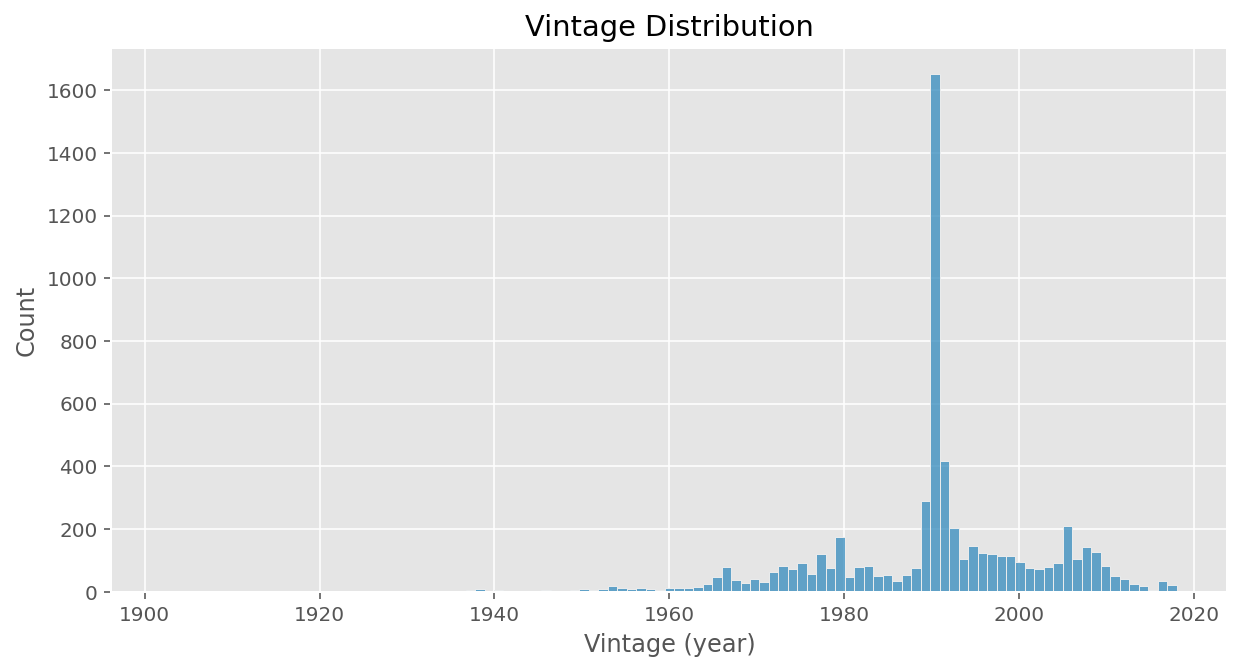

In [132]:
# vintage distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.vintage)

plt.title('Vintage Distribution')
plt.xlabel('Vintage (year)')
plt.ylabel('Count')

plt.savefig("images/09 Vintage Distribution.png", bbox_inches="tight")
plt.savefig("images/09 Vintage Distribution.pdf", bbox_inches="tight")

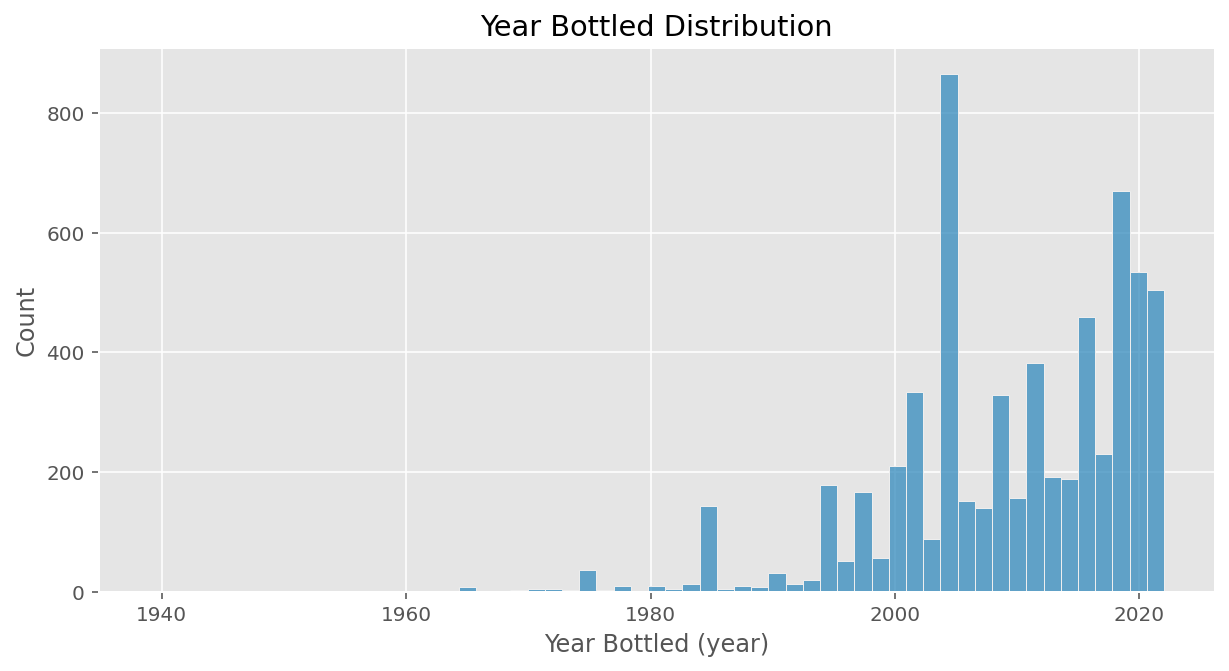

In [133]:
# year_bottled distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.year_bottled)

plt.title('Year Bottled Distribution')
plt.xlabel('Year Bottled (year)')
plt.ylabel('Count')

plt.savefig("images/10 Year Bottled Distribution.png", bbox_inches="tight")
plt.savefig("images/10 Year Bottled Distribution.pdf", bbox_inches="tight")

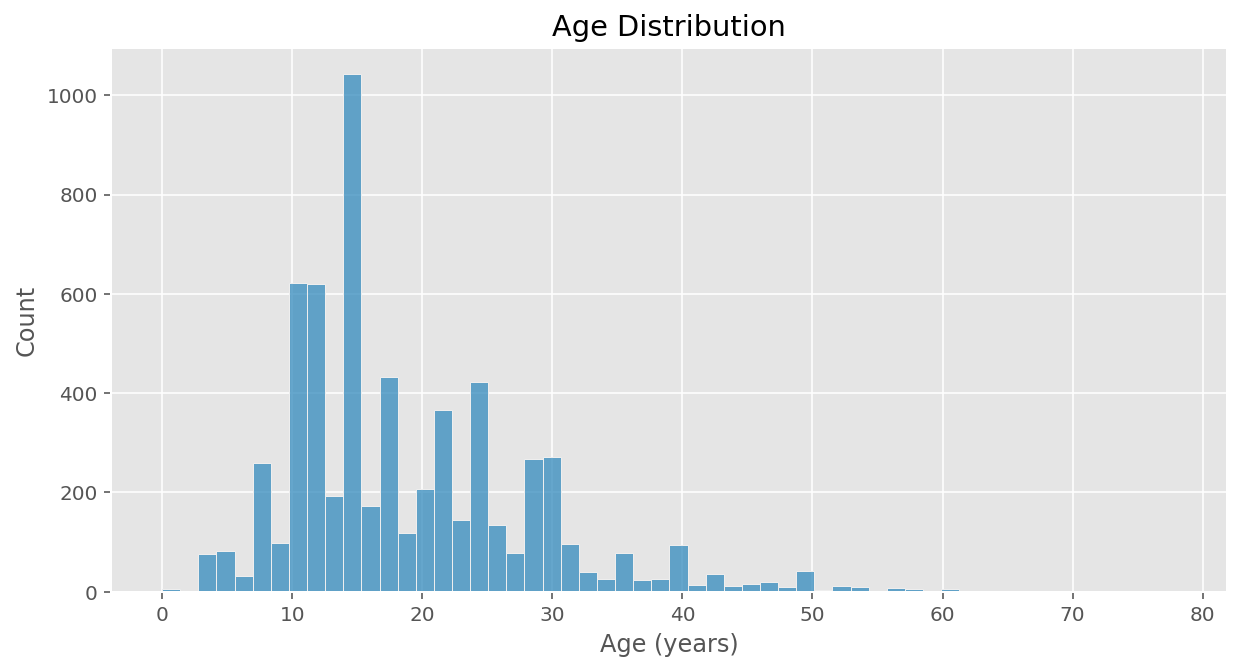

In [134]:
# age distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.age)

plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')

plt.savefig("images/11 Age Distribution.png", bbox_inches="tight")
plt.savefig("images/11 Age Distribution.pdf", bbox_inches="tight")

### 1.3.6 Investigate "alcohol_abv" Column

Alcohol by volume refers to how much alcohol is contained in a given volume.

In [135]:
whisky.alcohol_abv.value_counts().head()

40%    1159
46%     966
43%     847
50%     159
48%     113
Name: alcohol_abv, dtype: int64

In [136]:
whisky.alcohol_abv.isnull().sum()

0

In [137]:
# clean alcohol_abv column (abv by percent)
whisky.alcohol_abv = whisky.alcohol_abv.apply(string_to_num)
# whisky.alcohol_abv     # check

In [138]:
# convert object data type to float
whisky["alcohol_abv"] = whisky["alcohol_abv"].astype(float)

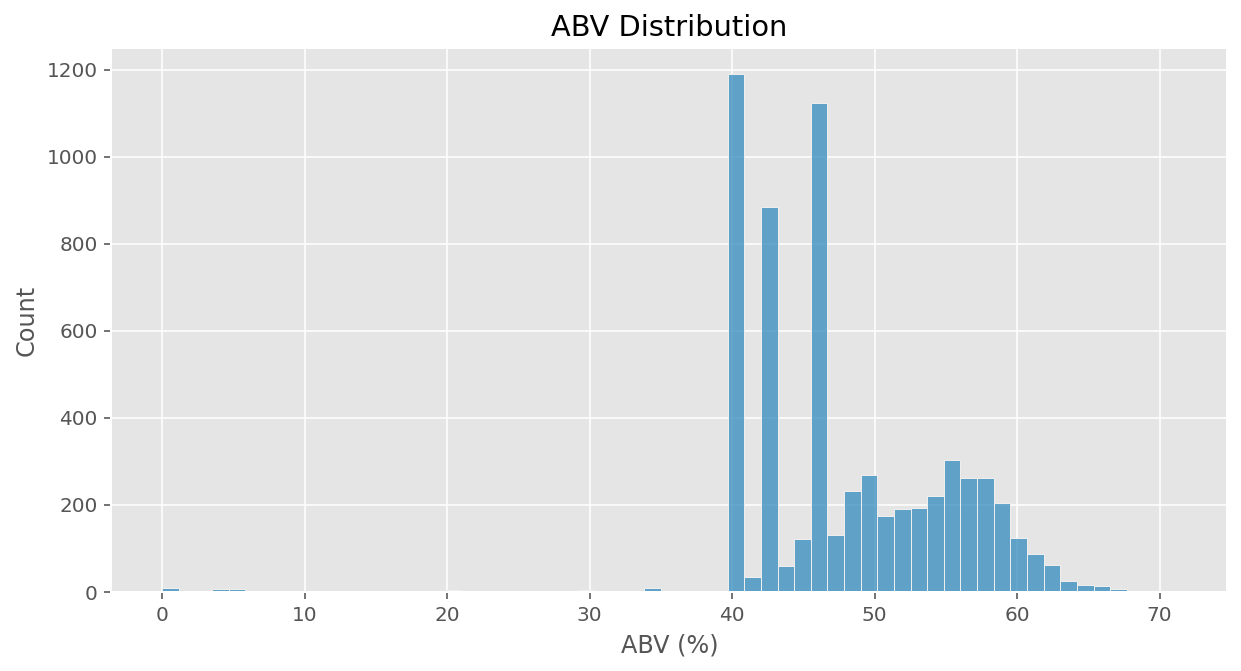

In [139]:
# alcohol_abv distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky.alcohol_abv)

plt.title('ABV Distribution')
plt.xlabel('ABV (%)')
plt.ylabel('Count')

plt.savefig("images/12 ABV Distribution.png", bbox_inches="tight")
plt.savefig("images/12 ABV Distribution.pdf", bbox_inches="tight")

### 1.3.7 Investigate "number_bottled" Column

This refers to the number of bottles of the whisky that was produced.

In [140]:
whisky.number_bottled.isnull().sum()

3691

There are too many missing values here, so I will drop the column.

In [141]:
whisky.drop('number_bottled', axis=1, inplace=True)

## 1.4 Outliers

In [142]:
whisky.describe()

vintage  year_bottled          age  alcohol_abv   bottle_size  \
count  6219.000000   6219.000000  6219.000000  6219.000000   6219.000000   
mean   1990.044059   2009.424827    19.010934    47.894155     79.926676   
std      12.564788      9.868153     9.506809     7.233220    447.924231   
min    1902.000000   1939.000000     0.000000     0.000000      5.000000   
25%    1987.000000   2005.000000    12.000000    43.000000     70.000000   
50%    1990.000000   2011.000000    16.000000    46.000000     70.000000   
75%    1997.000000   2018.000000    25.000000    53.800000     70.000000   
max    2018.000000   2022.000000    78.000000    71.200000  25000.000000   

          unit_price  log_unit_price  
count    6219.000000     6219.000000  
mean      890.113045        5.534324  
std      5100.911832        1.291217  
min         1.178571        0.164303  
25%        98.500000        4.590057  
50%       214.214286        5.366977  
75%       571.357143        6.348014  
max    266666.666667       12.493755

The distributions of my numerical features are generally highly skewed, with high standard deviations.

There are a few techniques available to remove outliers, including:
* Standard Deviation Method
* Interquartile Range Method
* Percentile Value Method
I will remove outliers using the percentiles technique.

In [143]:
# Remove bottle_size outliers
upper_limit_bottle_size = whisky['bottle_size'].quantile(0.99)
lower_limit_bottle_size = whisky['bottle_size'].quantile(0.01)

whisky = whisky[(whisky['bottle_size'] <= upper_limit_bottle_size) &
                (whisky['bottle_size'] >= lower_limit_bottle_size)]

# Remove unit_price outliers
upper_limit_log_unit_price = whisky['log_unit_price'].quantile(0.99)
lower_limit_log_unit_price = whisky['log_unit_price'].quantile(0.01)

whisky = whisky[(whisky['log_unit_price'] <= upper_limit_log_unit_price) &
                (whisky['log_unit_price'] >= lower_limit_log_unit_price)]

# Remove vintage outliers
upper_limit_vintage = whisky['vintage'].quantile(0.99)
lower_limit_vintage = whisky['vintage'].quantile(0.01)

whisky = whisky[(whisky['vintage'] <= upper_limit_vintage) &
                (whisky['vintage'] >= lower_limit_vintage)]

# Remove year_bottled outliers
upper_limit_year_bottled = whisky['year_bottled'].quantile(0.99)
lower_limit_year_bottled = whisky['year_bottled'].quantile(0.01)

whisky = whisky[(whisky['year_bottled'] <= upper_limit_year_bottled) &
                (whisky['year_bottled'] >= lower_limit_year_bottled)]

# Remove age outliers
upper_limit_year_age = whisky['age'].quantile(0.99)
lower_limit_year_age = whisky['age'].quantile(0.01)

whisky = whisky[(whisky['age'] <= upper_limit_year_age) &
                (whisky['age'] >= lower_limit_year_age)]

# Remove alcohol_abv outliers
upper_limit_alcohol_abv = whisky['alcohol_abv'].quantile(0.99)
lower_limit_alcohol_abv = whisky['alcohol_abv'].quantile(0.01)

whisky = whisky[(whisky['alcohol_abv'] <= upper_limit_alcohol_abv) &
                (whisky['alcohol_abv'] >= lower_limit_alcohol_abv)]

In [144]:
whisky.describe()

vintage  year_bottled          age  alcohol_abv  bottle_size  \
count  5654.000000   5654.000000  5654.000000  5654.000000  5654.000000   
mean   1991.011850   2010.094977    18.702688    48.164117    70.564556   
std      10.604281      8.809420     8.276309     6.422491     5.000476   
min    1954.000000   1985.000000     5.000000    40.000000    50.000000   
25%    1989.000000   2005.000000    12.000000    43.000000    70.000000   
50%    1990.000000   2011.000000    16.000000    46.000000    70.000000   
75%    1997.000000   2018.000000    25.000000    53.900000    70.000000   
max    2014.000000   2021.000000    47.000000    62.700000   100.000000   

        unit_price  log_unit_price  
count  5654.000000     5654.000000  
mean    542.413912        5.497368  
std    1038.798651        1.146690  
min      29.266667        3.376449  
25%      99.928571        4.604456  
50%     214.214286        5.366977  
75%     499.928571        6.214465  
max    9999.928571        9.210333

The distributions are now slightly more normal after removing outliers, with the log_unit_price being fairly normally distributed at this point.

Below are the distributions of the numerical features after removing outliers.

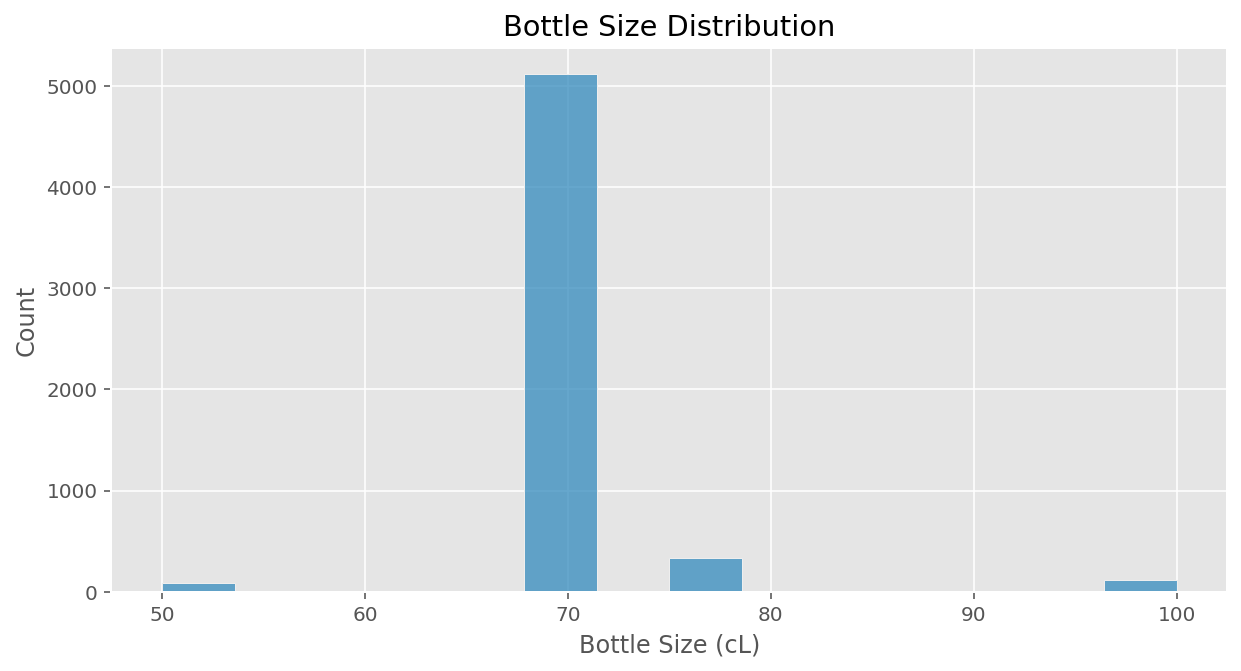

In [145]:
# bottle_size distribution plot AFTER REMOVING OUTLIERS
plt.figure(figsize=[10,5])
sns.histplot(whisky.bottle_size)

plt.title('Bottle Size Distribution')
plt.xlabel('Bottle Size (cL)')
plt.ylabel('Count')

plt.savefig("images/13 Bottle Size Distribution (after removing outliers).png", bbox_inches="tight")
plt.savefig("images/13 Bottle Size Distribution (after removing outliers).pdf", bbox_inches="tight")

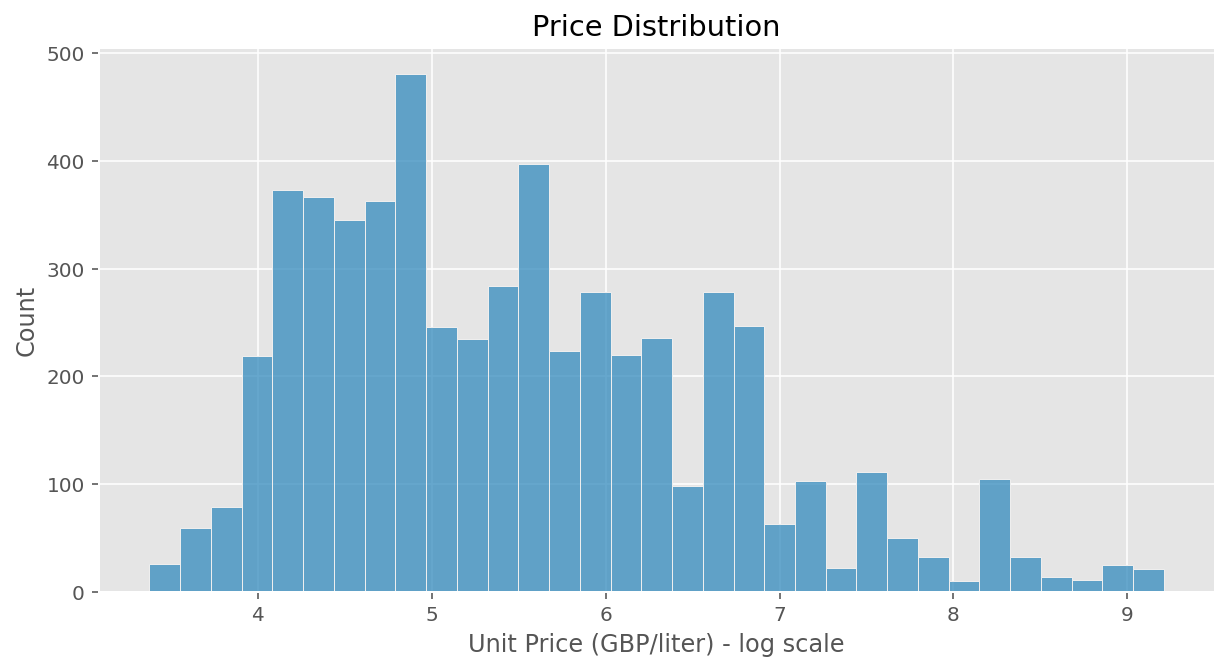

In [146]:
# log_unit_price distribution plot AFTER REMOVING OUTLIERS
plt.figure(figsize=[10,5])
sns.histplot(whisky.log_unit_price)

plt.title('Price Distribution')
plt.xlabel('Unit Price (GBP/liter) - log scale')
plt.ylabel('Count')

plt.savefig("images/14 Price Distribution (after removing outliers).png", bbox_inches="tight")
plt.savefig("images/14 Price Distribution (after removing outliers).pdf", bbox_inches="tight")

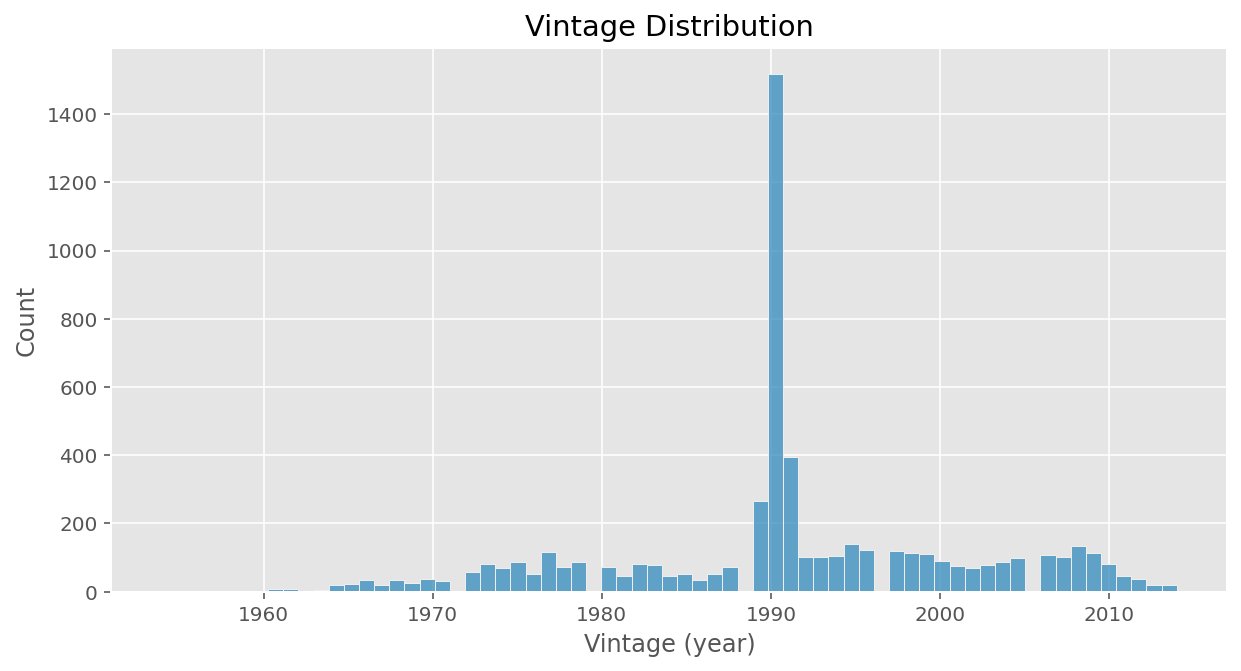

In [147]:
# vintage distribution plot AFTER REMOVING OUTLIERS
plt.figure(figsize=[10,5])
sns.histplot(whisky.vintage)

plt.title('Vintage Distribution')
plt.xlabel('Vintage (year)')
plt.ylabel('Count')

plt.savefig("images/15 Vintage Distribution (after removing outliers).png", bbox_inches="tight")
plt.savefig("images/15 Vintage Distribution (after removing outliers).pdf", bbox_inches="tight")

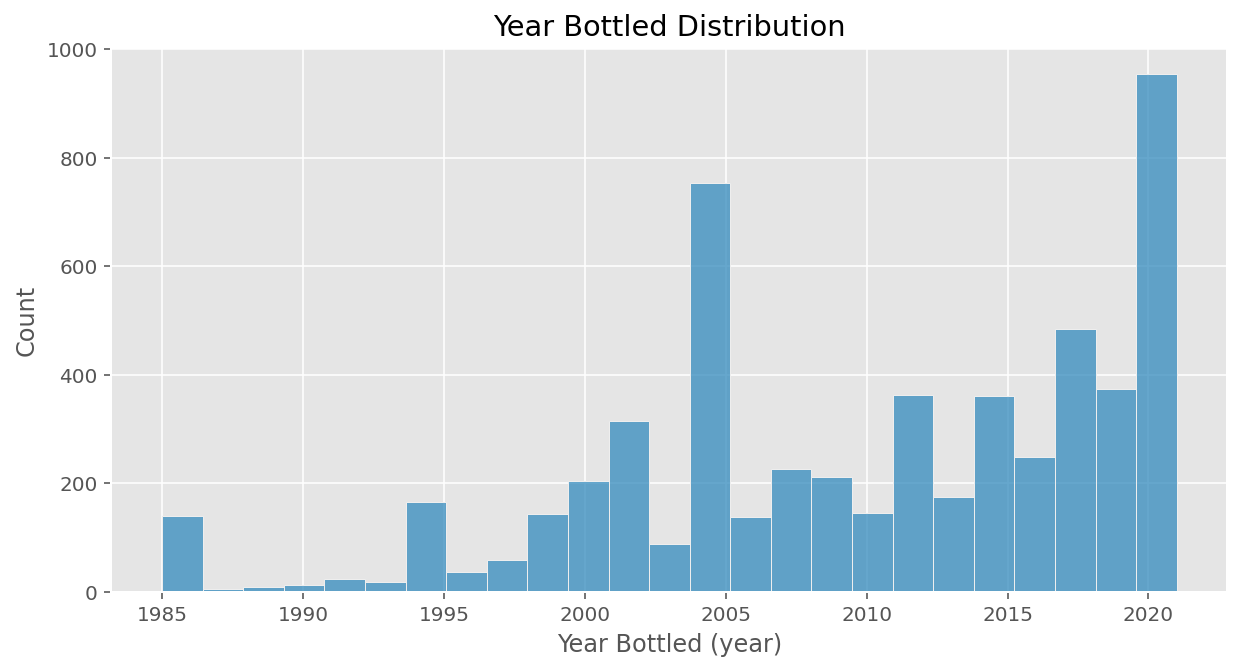

In [148]:
# year_bottled distribution plot AFTER REMOVING OUTLIERS
plt.figure(figsize=[10,5])
sns.histplot(whisky.year_bottled)

plt.title('Year Bottled Distribution')
plt.xlabel('Year Bottled (year)')
plt.ylabel('Count')

plt.savefig("images/16 Year Bottled Distribution (after removing outliers).png", bbox_inches="tight")
plt.savefig("images/16 Year Bottled Distribution (after removing outliers).pdf", bbox_inches="tight")

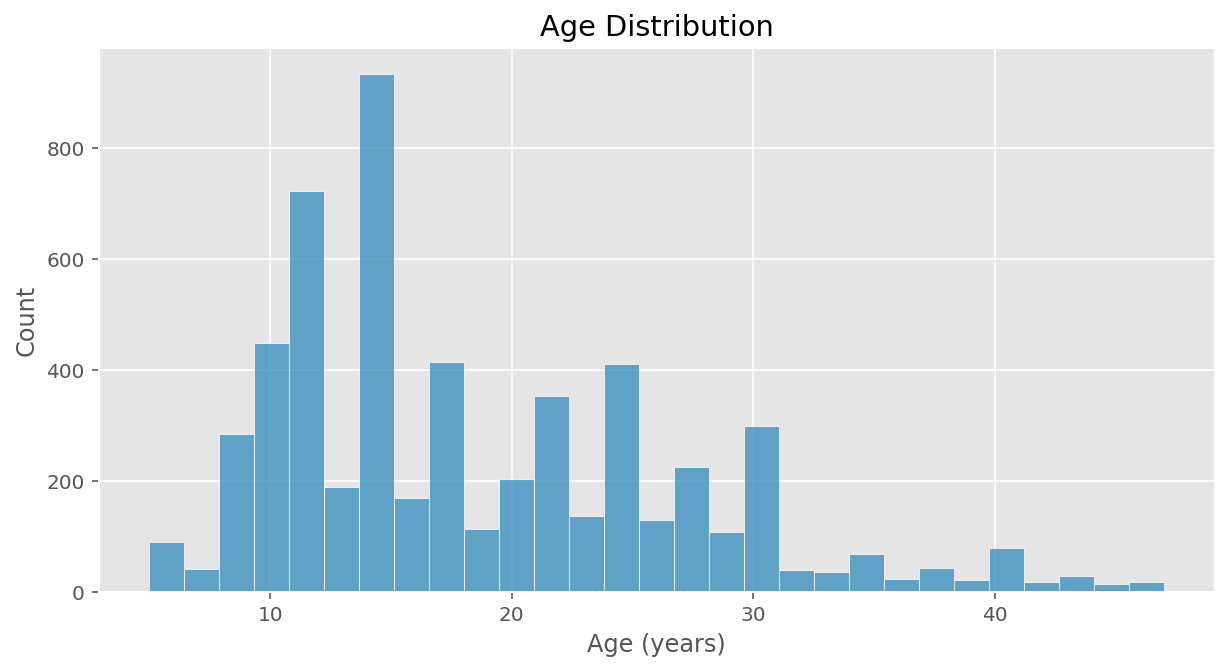

In [149]:
# age distribution plot AFTER REMOVING OUTLIERS
plt.figure(figsize=[10,5])
sns.histplot(whisky.age)

plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')

plt.savefig("images/17 Age Distribution (after removing outliers).png", bbox_inches="tight")
plt.savefig("images/17 Age Distribution (after removing outliers).pdf", bbox_inches="tight")

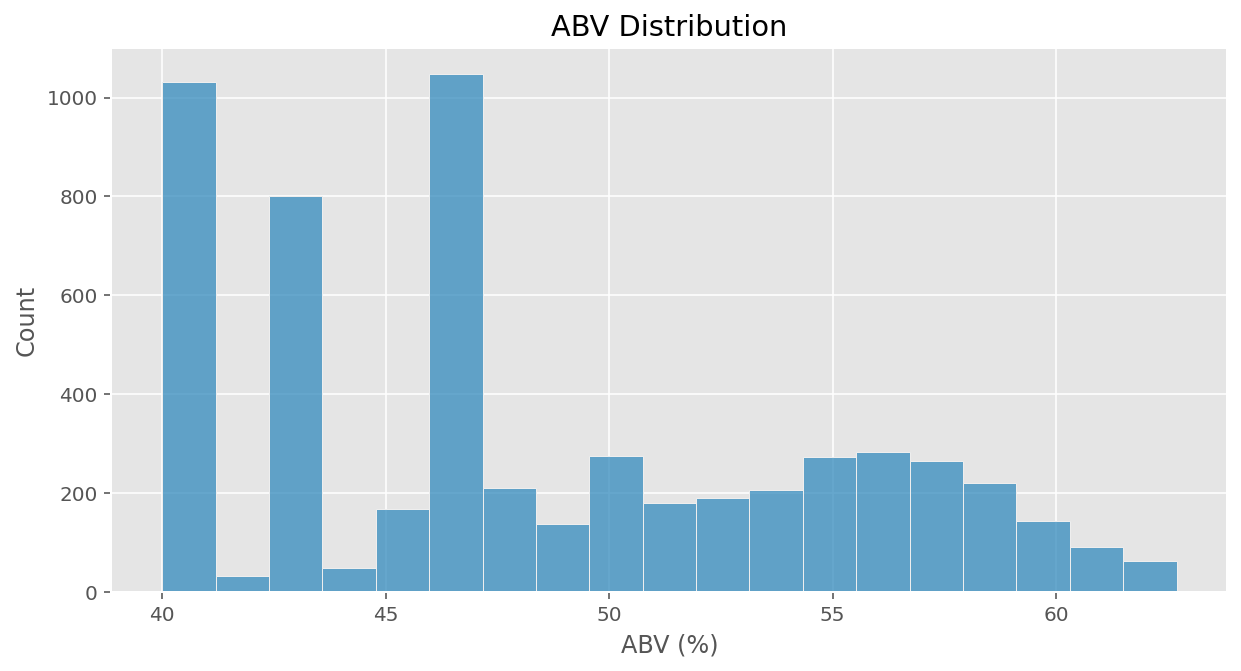

In [150]:
# alcohol_abv distribution plot AFTER REMOVING OUTLIERS
plt.figure(figsize=[10,5])
sns.histplot(whisky.alcohol_abv)

plt.title('ABV Distribution')
plt.xlabel('ABV (%)')
plt.ylabel('Count')

plt.savefig("images/18 ABV Distribution (after removing outliers).png", bbox_inches="tight")
plt.savefig("images/18 ABV Distribution (after removing outliers).pdf", bbox_inches="tight")

# 2. Exploratory Data Analysis

In [151]:
# save as new dataframe and reset index (rows)
whisky_neat = whisky.copy()
whisky_neat.reset_index(drop=True, inplace=True)

In [152]:
# For use in Tableau
whisky_neat.to_csv('whisky_neat.csv', index=False)

In [153]:
from PIL import Image

Below are some plots produced in Tableau:

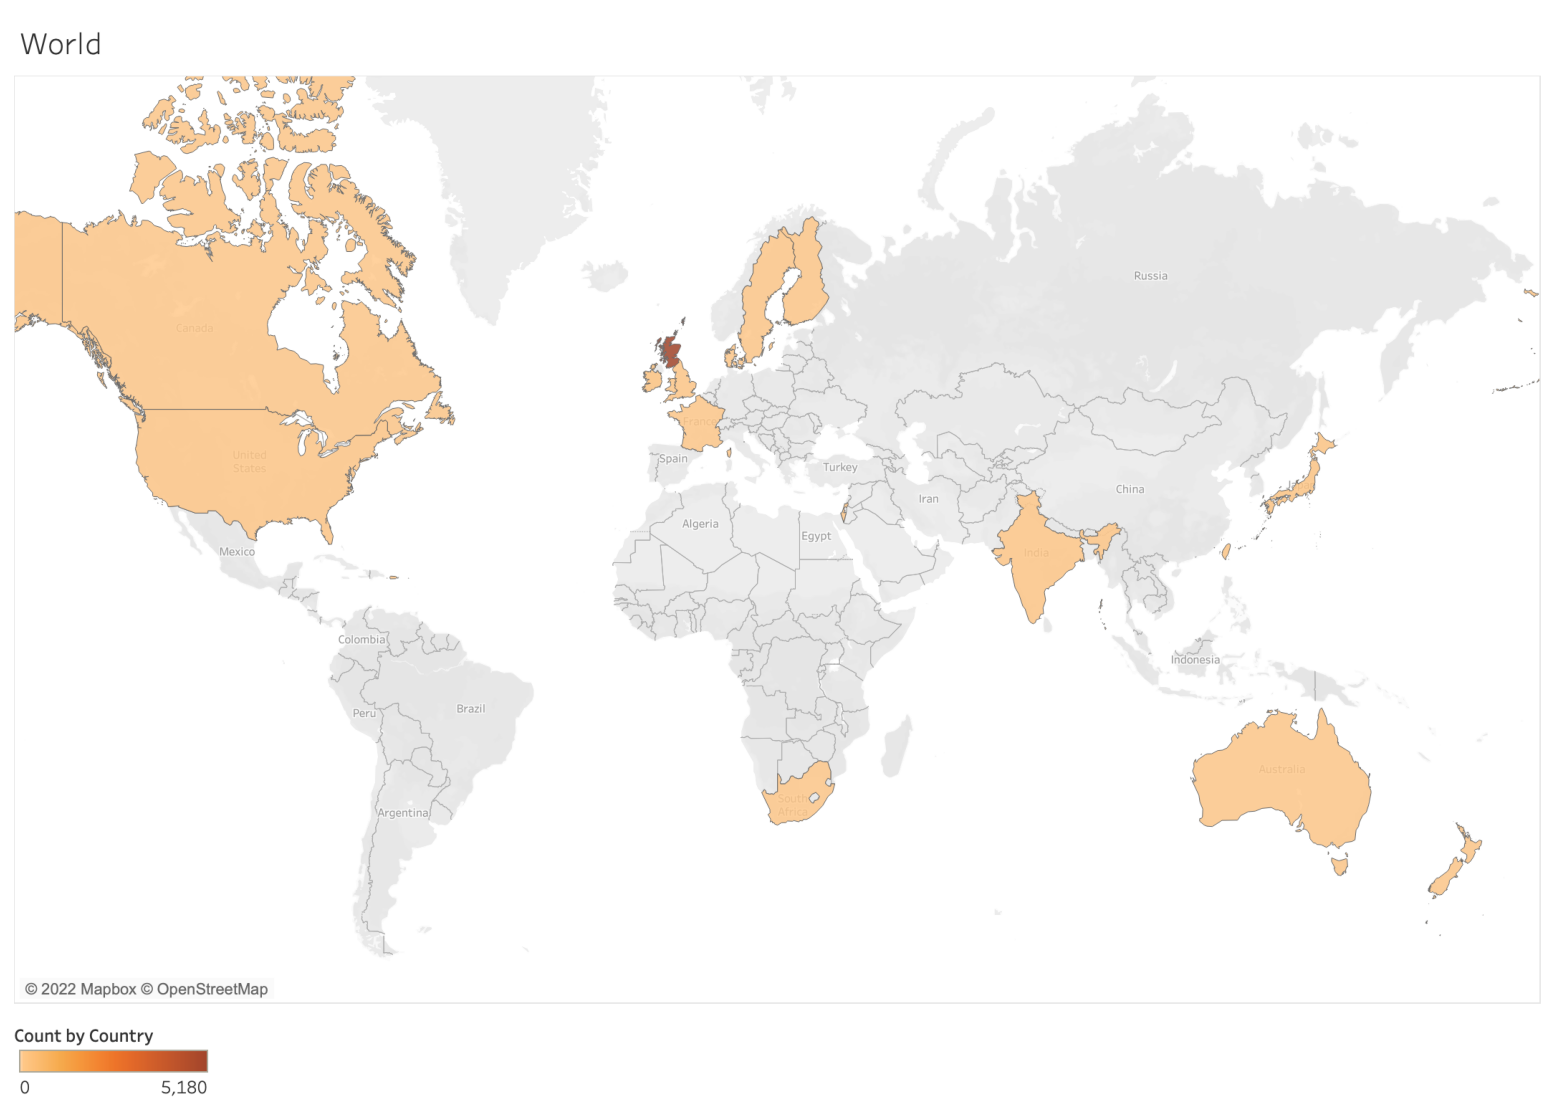

In [154]:
# Whisky Count by Country

# load image
world = np.array(Image.open("images/19 CountbyCountry-World.png"))

plt.figure(figsize=[14,10])
plt.imshow(world)
plt.axis("off")
plt.show()

In [155]:
whisky.country.unique()

array(['Scotland', 'America', 'Wales', 'India', 'Japan', 'Ireland',
       'France', 'Taiwan', 'Finland', 'Sweden', 'Canada', 'England',
       'Denmark', 'Australia', 'Israel', 'South Africa', 'New Zealand'],
      dtype=object)

In [156]:
whisky.country.nunique()

17

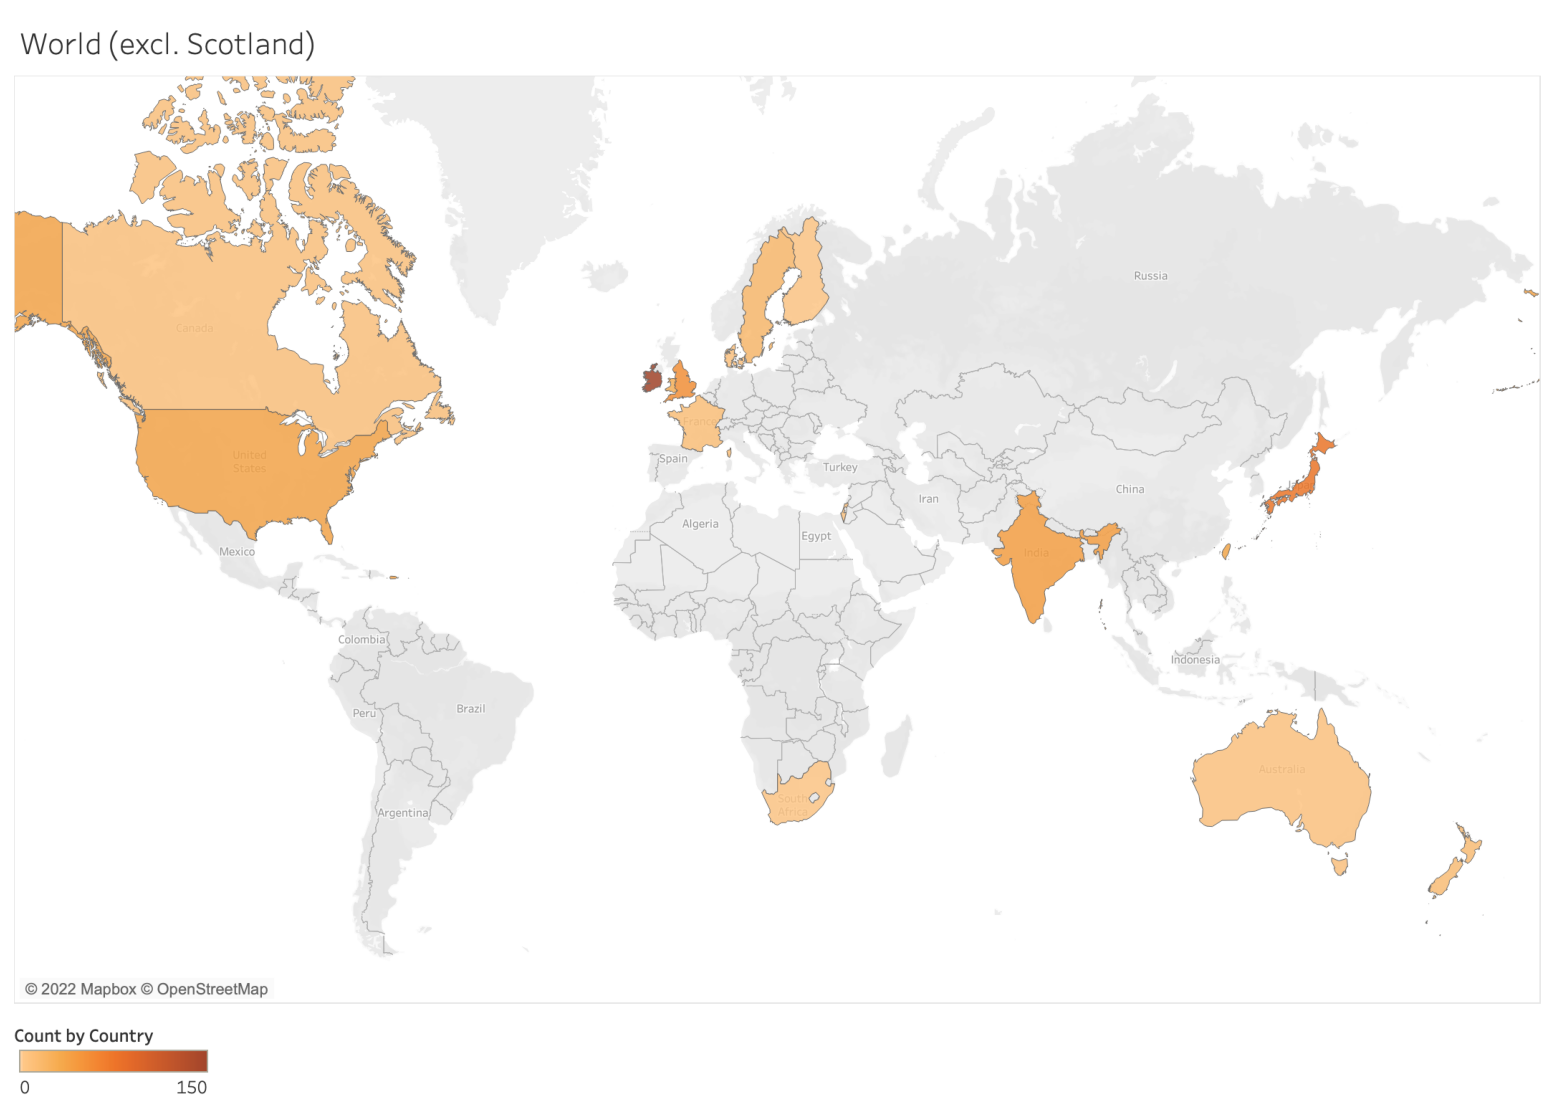

In [157]:
# Whisky Count by Country (excl. Scotland)

# load image
worldxscot = np.array(Image.open("images/20 CountbyCountry-World(exclScotland).png"))

plt.figure(figsize=[14,10])
plt.imshow(worldxscot)
plt.axis("off")
plt.show()

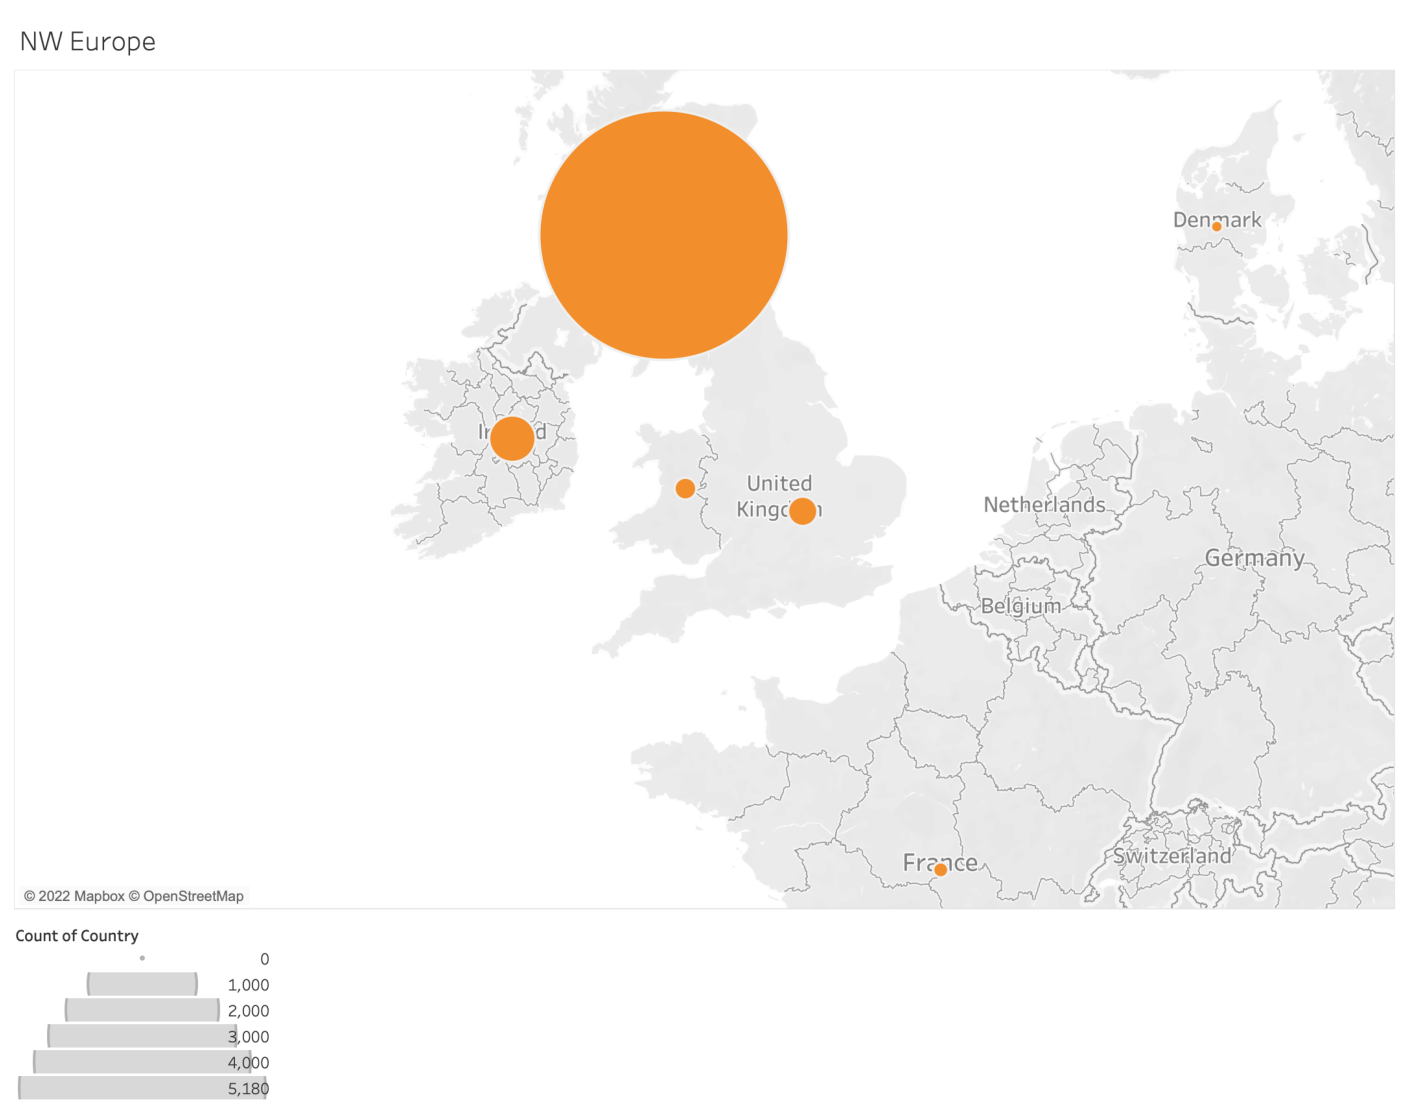

In [158]:
# Whisky Count by Country (Focus on NW Europe)

# load image
worldxscot = np.array(Image.open("images/21 CountbyCountry-NWEurope.png"))

plt.figure(figsize=[14,10])
plt.imshow(worldxscot)
plt.axis("off")
plt.show()

In [159]:
whisky.country.value_counts()

Scotland        5183
Ireland          151
Japan             78
England           52
India             37
America           37
Taiwan            32
Wales             24
Sweden            15
New Zealand        9
France             9
Canada             9
Denmark            5
Australia          5
Israel             4
South Africa       2
Finland            2
Name: country, dtype: int64

In [160]:
whisky_neat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distillery      5654 non-null   object 
 1   series          5654 non-null   object 
 2   vintage         5654 non-null   int64  
 3   year_bottled    5654 non-null   int64  
 4   age             5654 non-null   int64  
 5   alcohol_abv     5654 non-null   float64
 6   cask_strength   5654 non-null   object 
 7   single_cask     5654 non-null   object 
 8   packaging       5654 non-null   object 
 9   bottler         5654 non-null   object 
 10  country         5654 non-null   object 
 11  stopper         5654 non-null   object 
 12  bottle_size     5654 non-null   float64
 13  description     5654 non-null   object 
 14  cask_type       5654 non-null   object 
 15  unit_price      5654 non-null   float64
 16  log_unit_price  5654 non-null   float64
dtypes: float64(4), int64(3), object(1

In [161]:
whisky_neat.head()

distillery                                             series  vintage  \
0       Mortlach                                  Signatory Vintage     2009   
1        Macduff                Disciples 2nd Edition - Single Cask     2008   
2  George Dickel                   Stateside - Single Cask American     2011   
3    Invergordon    Murray McDavid Select Grain Single Cask #903159     1987   
4   Bunnahabhain  Murray McDavid Mission Gold - Pomerol Cask Fin...     1997   

   year_bottled  age  alcohol_abv cask_strength single_cask     packaging  \
0          2021   12         46.0            No         Yes  Original Box   
1          2021   13         54.0           Yes         Yes  Original Box   
2          2021   10         50.0           Yes         Yes  Original Box   
3          2018   30         54.0           Yes         Yes      Tin Tube   
4          2019   21         54.7           Yes         Yes      Tin Tube   

       bottler   country stopper  bottle_size  \
0  Independent  Scotland    Cork         70.0   
1  Independent  Scotland    Cork         70.0   
2  Independent   America    Cork         70.0   
3  Independent  Scotland    Cork         70.0   
4  Independent  Scotland    Cork         70.0   

                                         description cask_type  unit_price  \
0  Signatory Vintage's Mortlach from the Un-Chill...     Other   71.357143   
1  The second release of the Disciples range from...     Other  157.071429   
2  George Dickel provides a true American Whiskey...   Bourbon  135.642857   
3  In the Highlands, on the coast of the Cromarty...    Sherry  242.785714   
4  The narrow and winding road to Bunnahabhain ru...      Wine  599.928571   

   log_unit_price  
0        4.267697  
1        5.056701  
2        4.910025  
3        5.492179  
4        6.396811

In [162]:
whisky_neat.tail()

distillery                            series  vintage  \
5649                Arran  Icons of Arran #2 The Rowan Tree     1997   
5650             Macallan          Fine Oak Masters Edition     1990   
5651  Port Ellen (silent)      The Single Malts of Scotland     1983   
5652             Caol Ila                  Whisky show 2011     1994   
5653        Glenglassaugh                 The Family Silver     1973   

      year_bottled  age  alcohol_abv cask_strength single_cask  \
5649          2010   13         46.0            No          No   
5650          2005   15         40.0            No          No   
5651          2010   27         46.0            No          No   
5652          2011   17         58.0           Yes          No   
5653          2000   25         40.0            No          No   

           packaging      bottler   country stopper  bottle_size  \
5649  Cardboard Tube   Distillery  Scotland    Cork         70.0   
5650    Original Box   Distillery  Scotland    Cork         70.0   
5651    Original Box  Independent  Scotland    Cork         70.0   
5652   HTFW Gift Box  Independent  Scotland    Cork         70.0   
5653         Unboxed   Distillery  Scotland    Cork         70.0   

                                            description cask_type  \
5649  This is the second edition out of the four in ...    Sherry   
5650  Triple cask matured in Borbon and Sherry oak, ...   Bourbon   
5651                                                       Sherry   
5652  Just 87 were bottled for the 2011 London whisk...       Oak   
5653  A very collectable bottling from Glenglassaugh...       Oak   

       unit_price  log_unit_price  
5649   385.642857        5.954912  
5650   357.071429        5.877936  
5651  1714.214286        7.446710  
5652   114.214286        4.738076  
5653   128.500000        4.855929

In [163]:
whisky_neat.describe()

vintage  year_bottled          age  alcohol_abv  bottle_size  \
count  5654.000000   5654.000000  5654.000000  5654.000000  5654.000000   
mean   1991.011850   2010.094977    18.702688    48.164117    70.564556   
std      10.604281      8.809420     8.276309     6.422491     5.000476   
min    1954.000000   1985.000000     5.000000    40.000000    50.000000   
25%    1989.000000   2005.000000    12.000000    43.000000    70.000000   
50%    1990.000000   2011.000000    16.000000    46.000000    70.000000   
75%    1997.000000   2018.000000    25.000000    53.900000    70.000000   
max    2014.000000   2021.000000    47.000000    62.700000   100.000000   

        unit_price  log_unit_price  
count  5654.000000     5654.000000  
mean    542.413912        5.497368  
std    1038.798651        1.146690  
min      29.266667        3.376449  
25%      99.928571        4.604456  
50%     214.214286        5.366977  
75%     499.928571        6.214465  
max    9999.928571        9.210333

In [164]:
whisky_neat.describe(include='object')

distillery               series cask_strength single_cask  \
count        5654                 5654          5654        5654   
unique        197                 3772             2           2   
top      Macallan  Connoisseurs Choice            No          No   
freq          279                  265          3194        3930   

           packaging     bottler   country stopper description cask_type  
count           5654        5654      5654    5654        5654      5654  
unique            18           2        17       5        4168         8  
top     Original Box  Distillery  Scotland    Cork                   Oak  
freq            2754        3715      5183    5290        1369      2573

In [165]:
whisky_neat.isnull().sum()

distillery        0
series            0
vintage           0
year_bottled      0
age               0
alcohol_abv       0
cask_strength     0
single_cask       0
packaging         0
bottler           0
country           0
stopper           0
bottle_size       0
description       0
cask_type         0
unit_price        0
log_unit_price    0
dtype: int64

In [166]:
whisky_neat.shape

(5654, 17)

In [167]:
num_cols = ["vintage","year_bottled","age","alcohol_abv","bottle_size",
            "unit_price","log_unit_price"]

In [168]:
cat_cols = ["distillery","cask_strength","single_cask","packaging","bottler",
            "country","stopper","cask_type", "unit_price"]
# Note that unit_price is included here

In [169]:
text_cols = ["series","description"]

In [170]:
# What is the most popular number of years to age whisky?
print("Most popular age:\n", whisky_neat.age.value_counts().head(),"\n")

# Which year has the most whiskys?
print("Most popular year to bottle:\n", whisky_neat.year_bottled.value_counts().head())

Most popular age:
 15    754
12    578
10    448
25    284
18    276
Name: age, dtype: int64 

Most popular year to bottle:
 2005    645
2020    489
2021    466
2019    373
2018    267
Name: year_bottled, dtype: int64


In [171]:
whisky_neat.columns

Index(['distillery', 'series', 'vintage', 'year_bottled', 'age', 'alcohol_abv',
       'cask_strength', 'single_cask', 'packaging', 'bottler', 'country',
       'stopper', 'bottle_size', 'description', 'cask_type', 'unit_price',
       'log_unit_price'],
      dtype='object')

In [172]:
# # visualize numerical columns by Unit Price per Category
# fig, ax = plt.subplots(nrows=5, figsize=(10, 40))
# #fig.tight_layout()
# fig.subplots_adjust(hspace=0.6)
# for i, col in enumerate(whisky_neat[num_cols].columns[:5]):
#     sns.barplot(x=col,y='unit_price',data=whisky_neat, ax=ax[i])
#     ax[i].set(xlabel = col.title(), ylabel='Unit Price (GBP)')
#     #ax[i].set_xticklabels(labels,rotation=90)
#     ax[i].set_title(col.title())

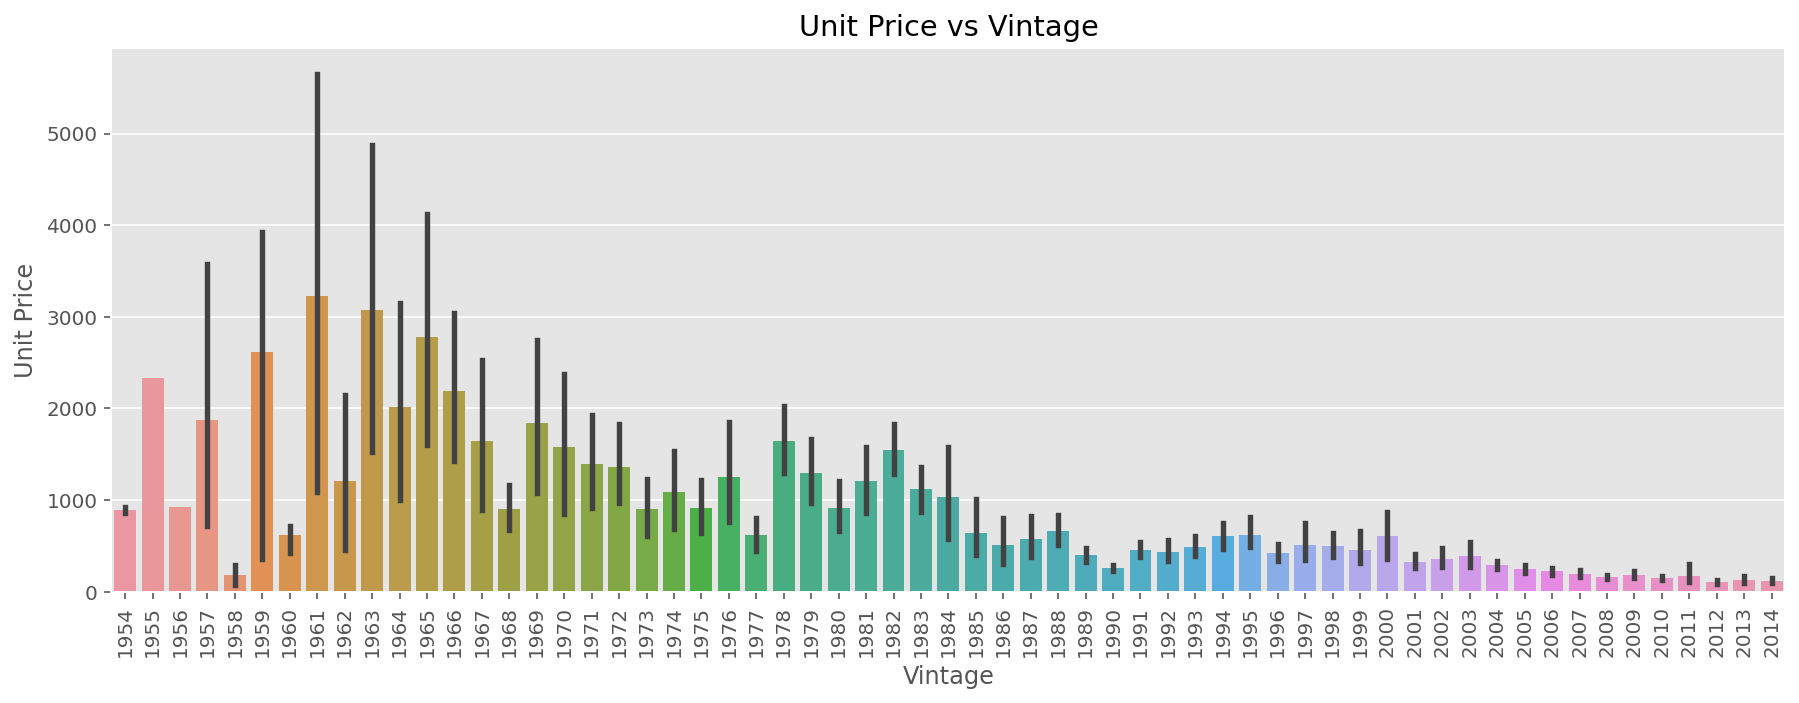

In [173]:
plt.figure(figsize=(15,5))
sns.barplot(x='vintage',y='unit_price',data=whisky_neat)

plt.title('Unit Price vs Vintage')
plt.xlabel('Vintage')
plt.xticks(rotation=90)
plt.ylabel('Unit Price')

plt.savefig("images/22 Unit Price vs Vintage.png", bbox_inches="tight")
plt.savefig("images/22 Unit Price vs Vintage.pdf", bbox_inches="tight")

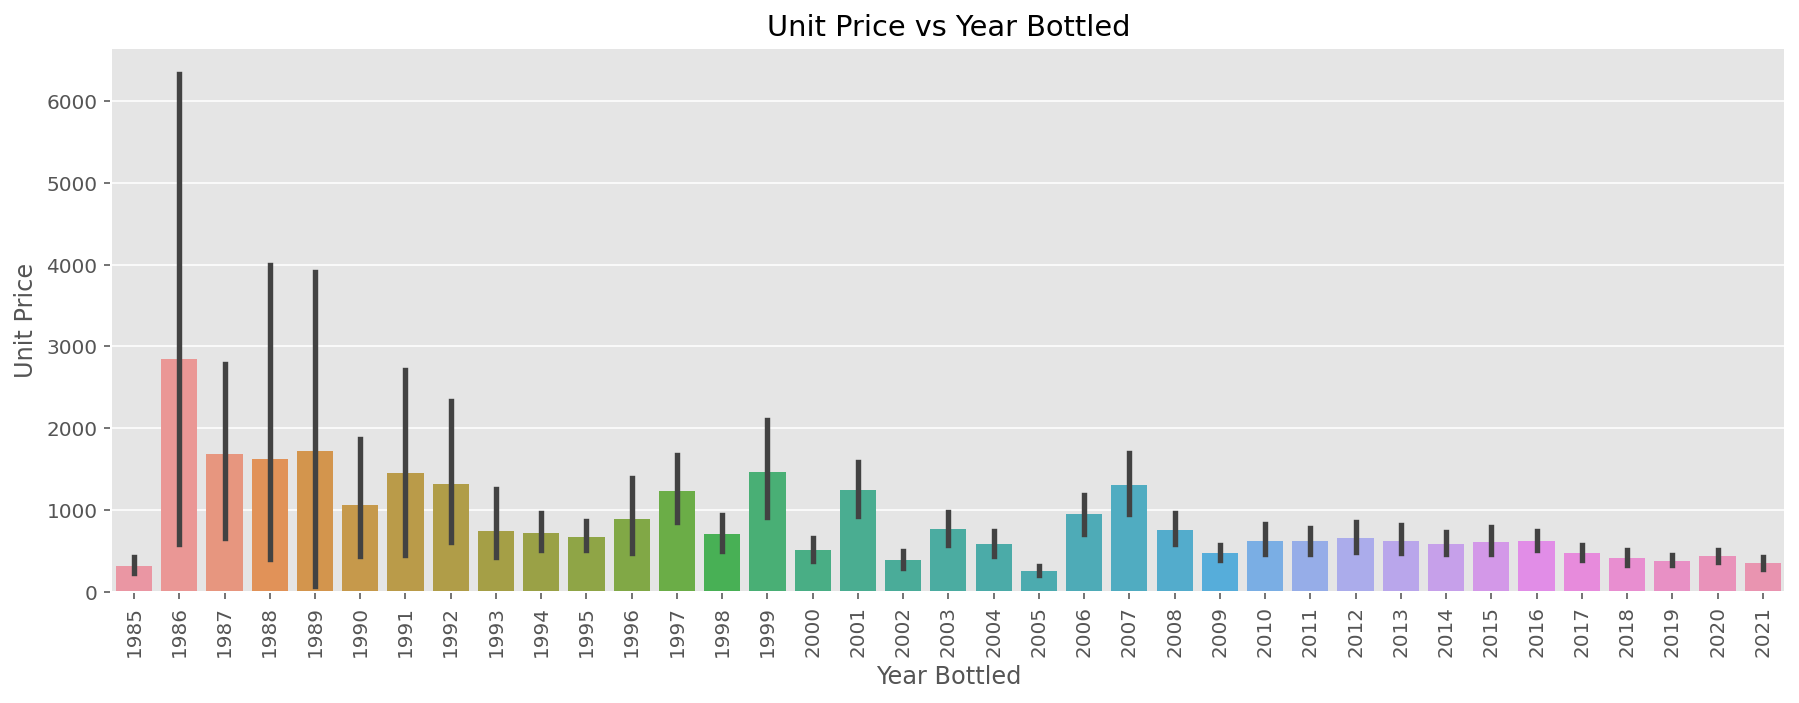

In [174]:
plt.figure(figsize=(15,5))
sns.barplot(x='year_bottled',y='unit_price',data=whisky_neat)

plt.title('Unit Price vs Year Bottled')
plt.xlabel('Year Bottled')
plt.xticks(rotation=90)
plt.ylabel('Unit Price')

plt.savefig("images/23 Unit Price vs Year Bottled.png", bbox_inches="tight")
plt.savefig("images/23 Unit Price vs Year Bottled.pdf", bbox_inches="tight")

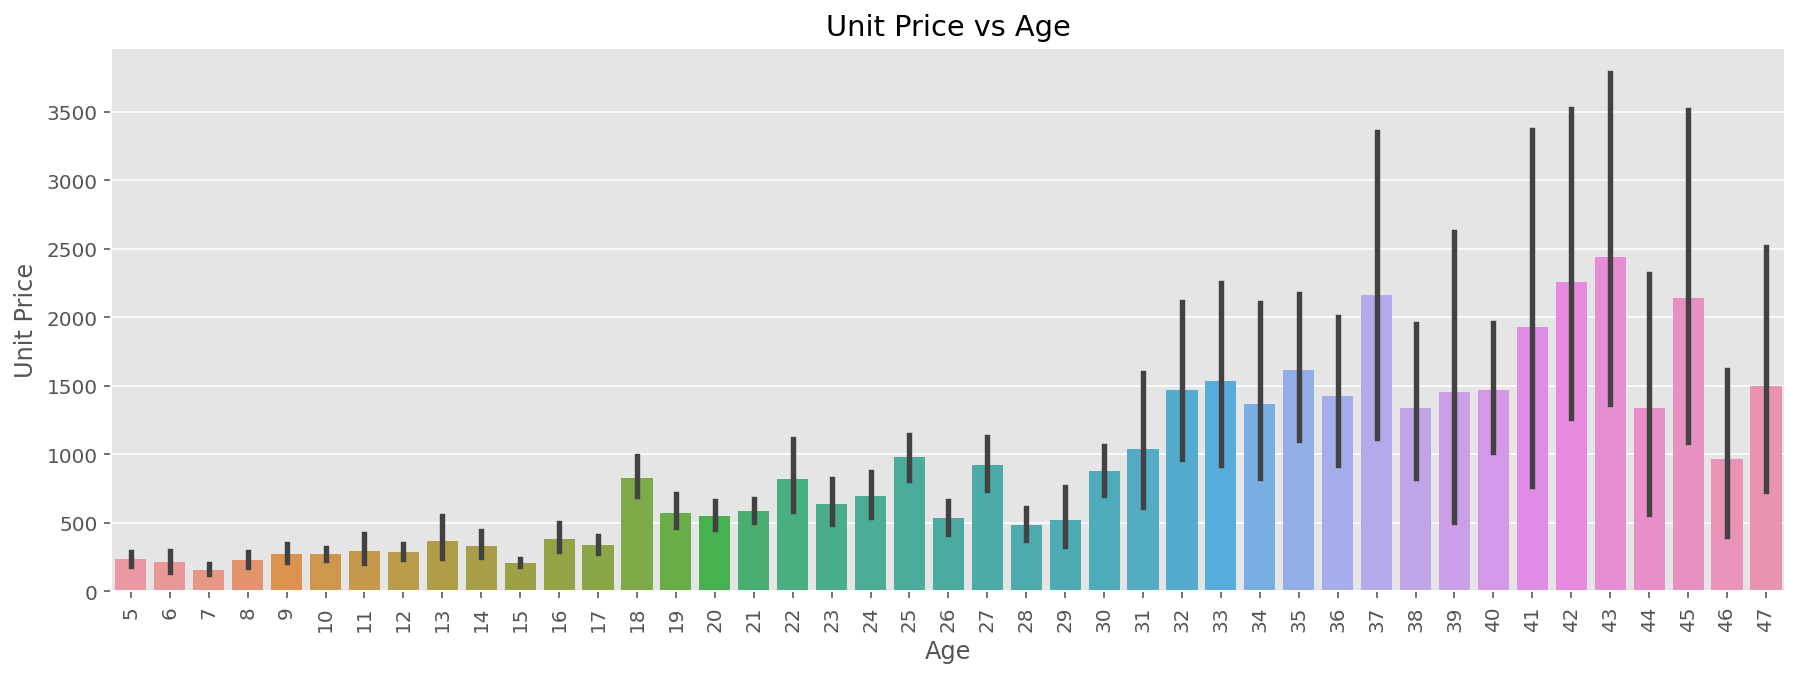

In [175]:
plt.figure(figsize=(15,5))
sns.barplot(x='age',y='unit_price',data=whisky_neat)

plt.title('Unit Price vs Age')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('Unit Price')

plt.savefig("images/24 Unit Price vs Age.png", bbox_inches="tight")
plt.savefig("images/24 Unit Price vs Age.pdf", bbox_inches="tight")

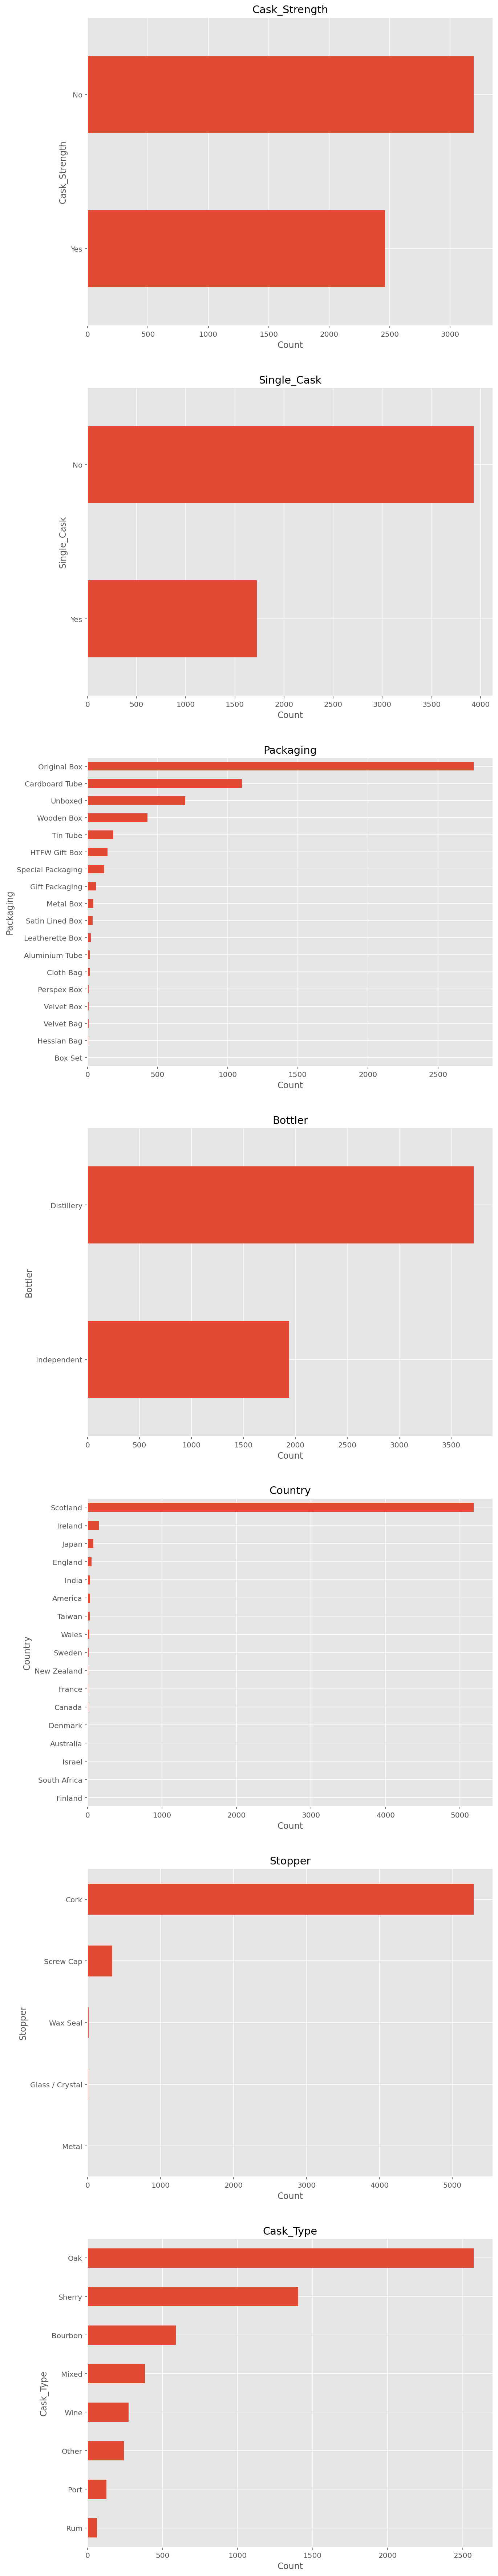

In [176]:
# visualize categorical columns by Counts per Category (value counts)
fig, ax = plt.subplots(nrows=7, figsize=(10, 64))
#fig.tight_layout()
fig.subplots_adjust(hspace=0.2)
for i, col in enumerate(whisky_neat[cat_cols].columns[1:8]):
    whisky_neat[cat_cols][col].value_counts().sort_values().plot(kind="barh", ax=ax[i])
    ax[i].set(xlabel = 'Count', ylabel=col.title())
    ax[i].set_title(col.title())
    
plt.savefig("images/25 categorical columns by counts per category.png", bbox_inches="tight")
plt.savefig("images/25 categorical columns by counts per category.pdf", bbox_inches="tight")

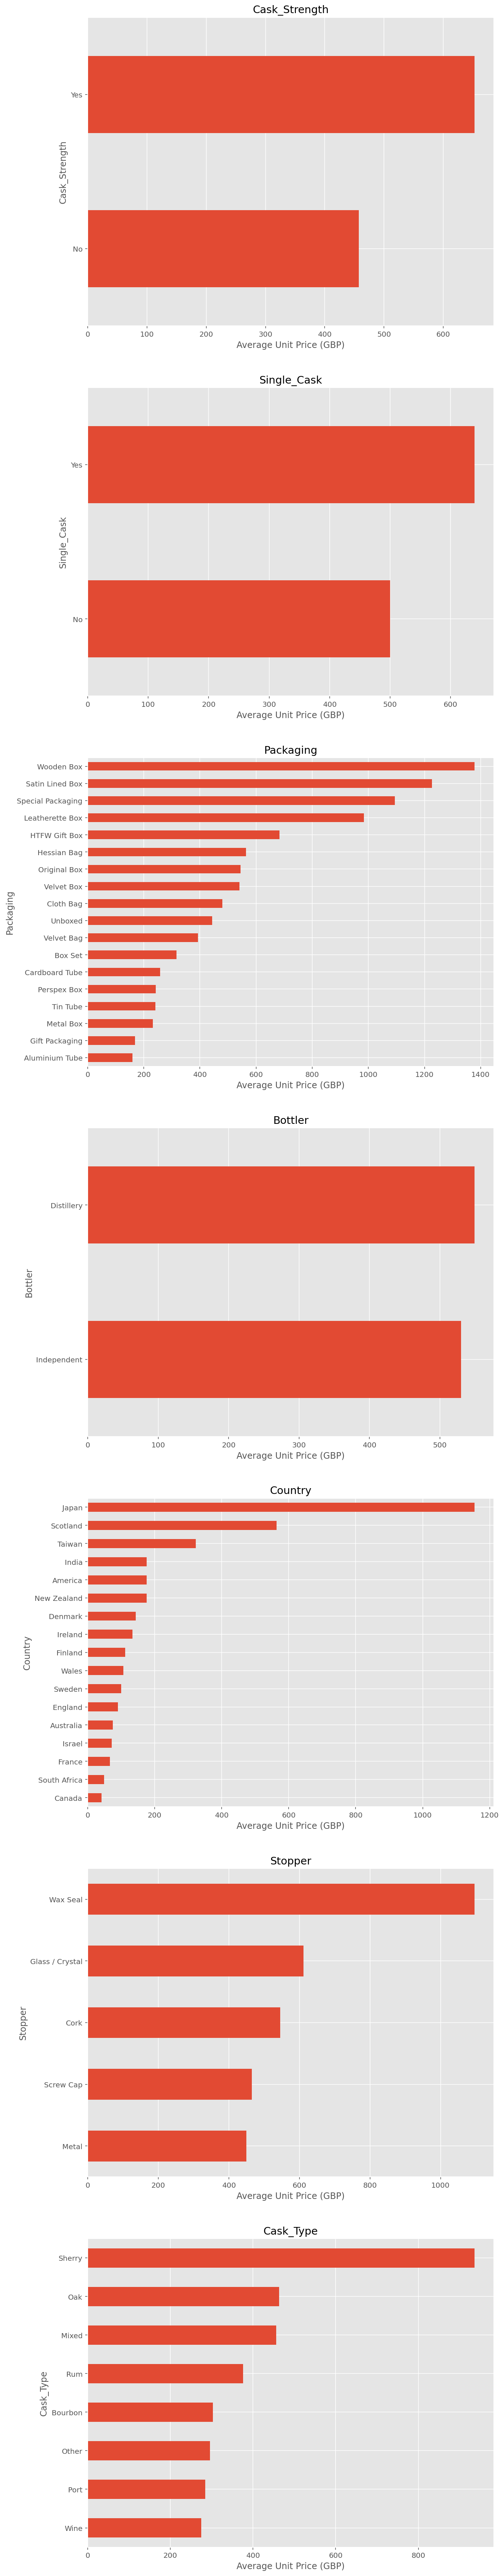

In [177]:
# visualize categorical columns by Average Unit Price
fig, ax = plt.subplots(nrows=7, figsize=(10, 64))
# fig.tight_layout()
fig.subplots_adjust(hspace=0.2)
for i, col in enumerate(whisky_neat[cat_cols].columns[1:8]):
    whisky_neat[cat_cols].groupby([col])['unit_price'].mean().sort_values().plot(kind="barh", ax=ax[i])
    ax[i].set(xlabel = 'Average Unit Price (GBP)', ylabel=col.title())
    ax[i].set_title(col.title())
    
plt.savefig("images/26 categorical columns by Average Unit Price.png", bbox_inches="tight")
plt.savefig("images/26 categorical columns by Average Unit Price.pdf", bbox_inches="tight")

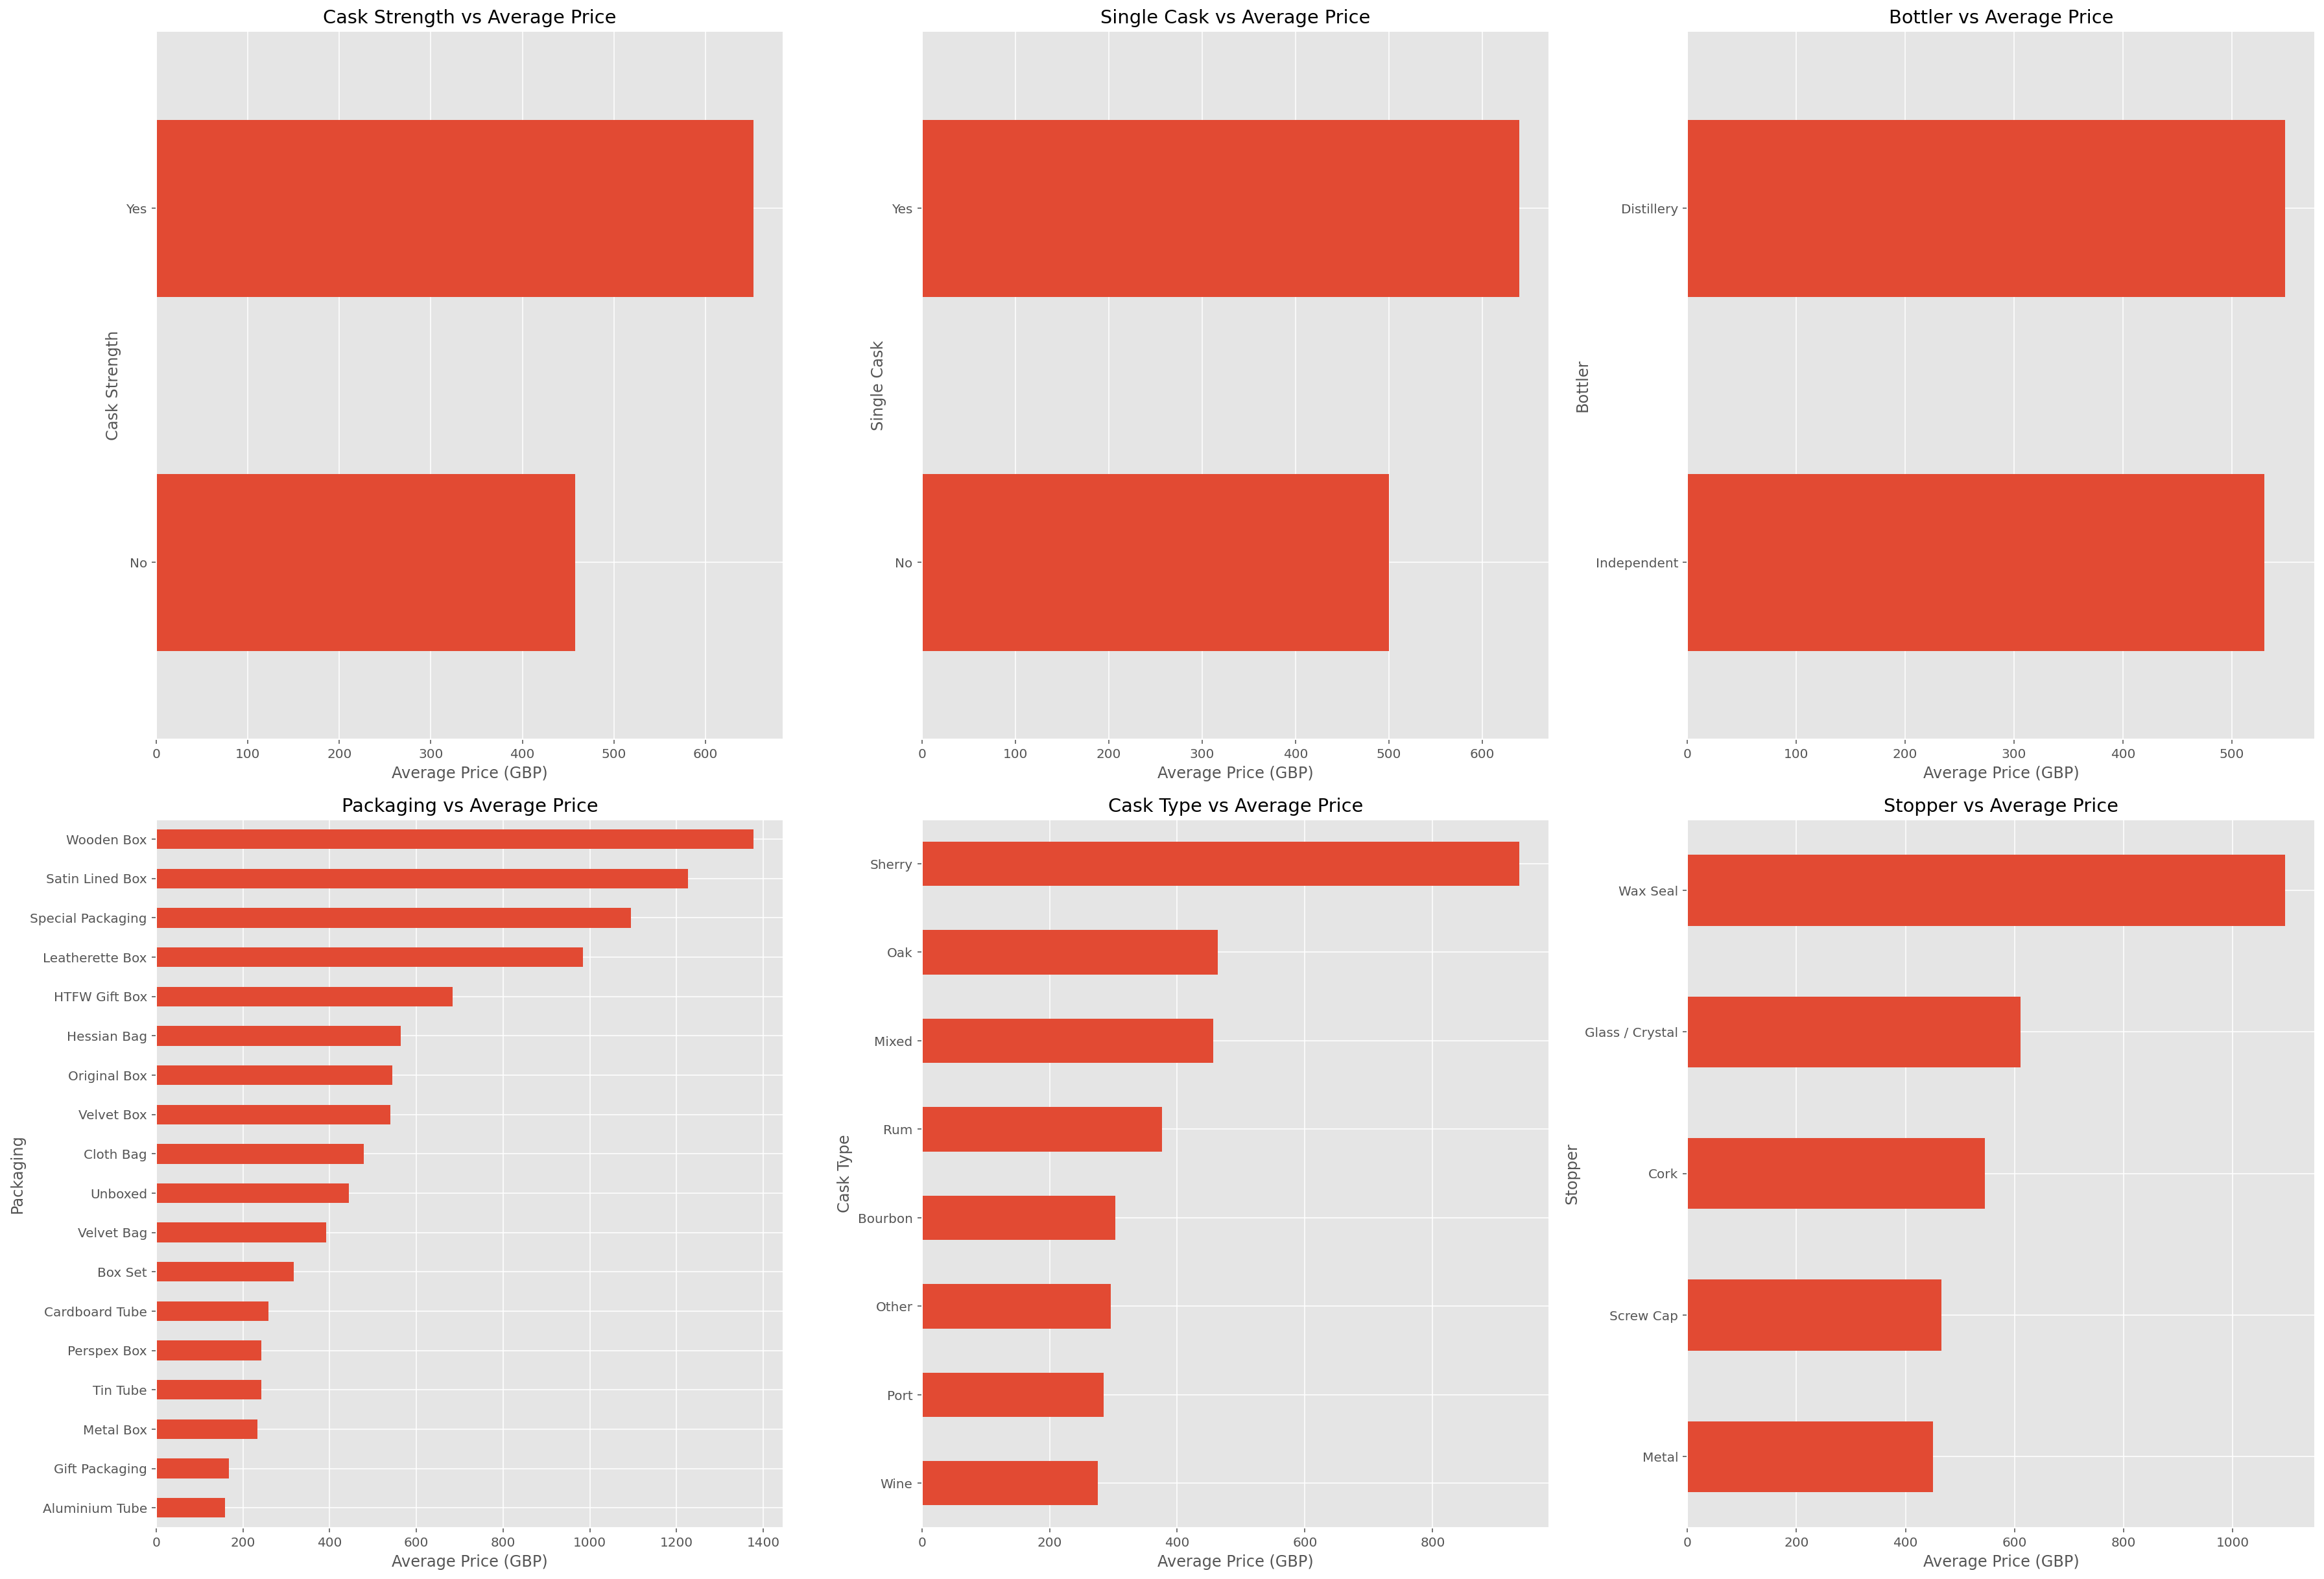

In [178]:
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt1 = whisky_neat.groupby(['cask_strength'])['unit_price'].mean().sort_values().plot(kind='barh')
plt.title('Cask Strength vs Average Price')
plt1.set(xlabel = 'Average Price (GBP)', ylabel='Cask Strength')

plt.subplot(3,3,2)
plt2 = whisky_neat.groupby(['single_cask'])['unit_price'].mean().sort_values().plot(kind='barh')
plt.title('Single Cask vs Average Price')
plt2.set(xlabel = 'Average Price (GBP)', ylabel='Single Cask')

plt.subplot(3,3,3)
plt3 = whisky_neat.groupby(['bottler'])['unit_price'].mean().sort_values().plot(kind='barh')
plt.title('Bottler vs Average Price')
plt3.set(xlabel = 'Average Price (GBP)', ylabel='Bottler')

plt.subplot(3,3,4)
plt4 = whisky_neat.groupby(['packaging'])['unit_price'].mean().sort_values().plot(kind='barh')
plt.title('Packaging vs Average Price')
plt4.set(xlabel = 'Average Price (GBP)', ylabel='Packaging')

plt.subplot(3,3,5)
plt5 = whisky_neat.groupby(['cask_type'])['unit_price'].mean().sort_values().plot(kind='barh')
plt.title('Cask Type vs Average Price')
plt5.set(xlabel = 'Average Price (GBP)', ylabel='Cask Type')

plt.subplot(3,3,6)
plt6 = whisky_neat.groupby(['stopper'])['unit_price'].mean().sort_values().plot(kind='barh')
plt.title('Stopper vs Average Price')
plt6.set(xlabel = 'Average Price (GBP)', ylabel='Stopper')

plt.tight_layout()

plt.savefig("images/26a select categorical columns by Average Unit Price.png", bbox_inches="tight")
plt.savefig("images/26a select categorical columns by Average Unit Price.pdf", bbox_inches="tight")

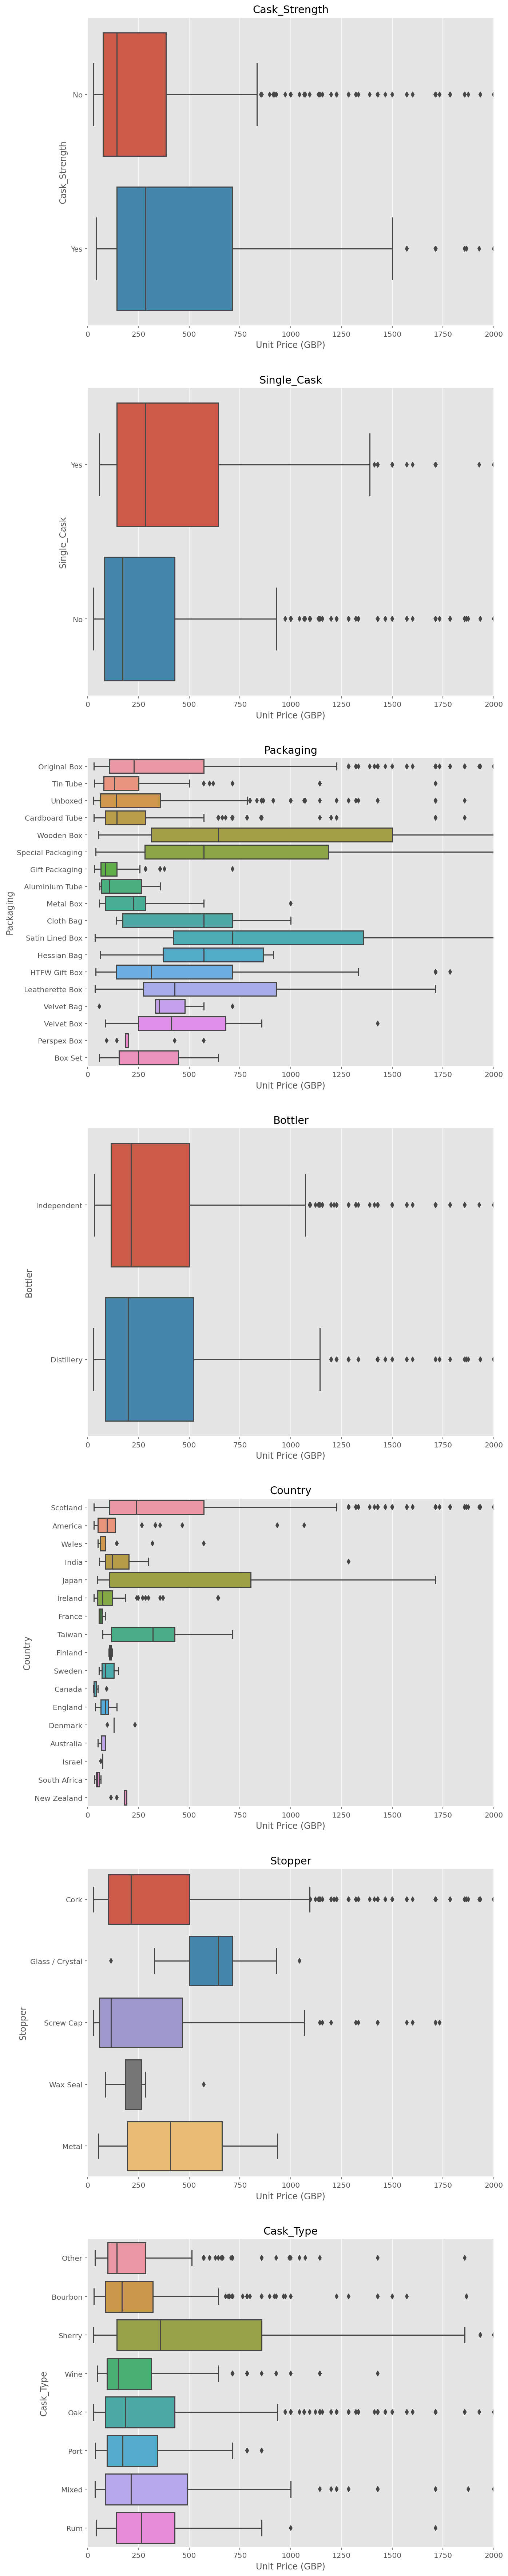

In [179]:
# Price range per Category
fig, ax = plt.subplots(nrows=7, figsize=(10, 64))
#fig.tight_layout()
fig.subplots_adjust(hspace=0.2)
for i, col in enumerate(whisky_neat[cat_cols].columns[1:8]):
    sns.boxplot(x=whisky_neat.unit_price,y=whisky_neat[col], orient='h', ax=ax[i])
    ax[i].set(ylabel = col.title(), xlabel='Unit Price (GBP)')
    ax[i].set_xlim(0,2000)
    ax[i].set_title(col.title())
    
plt.savefig("images/27 Price range per Category.png", bbox_inches="tight")
plt.savefig("images/27 Price range per Category.pdf", bbox_inches="tight")

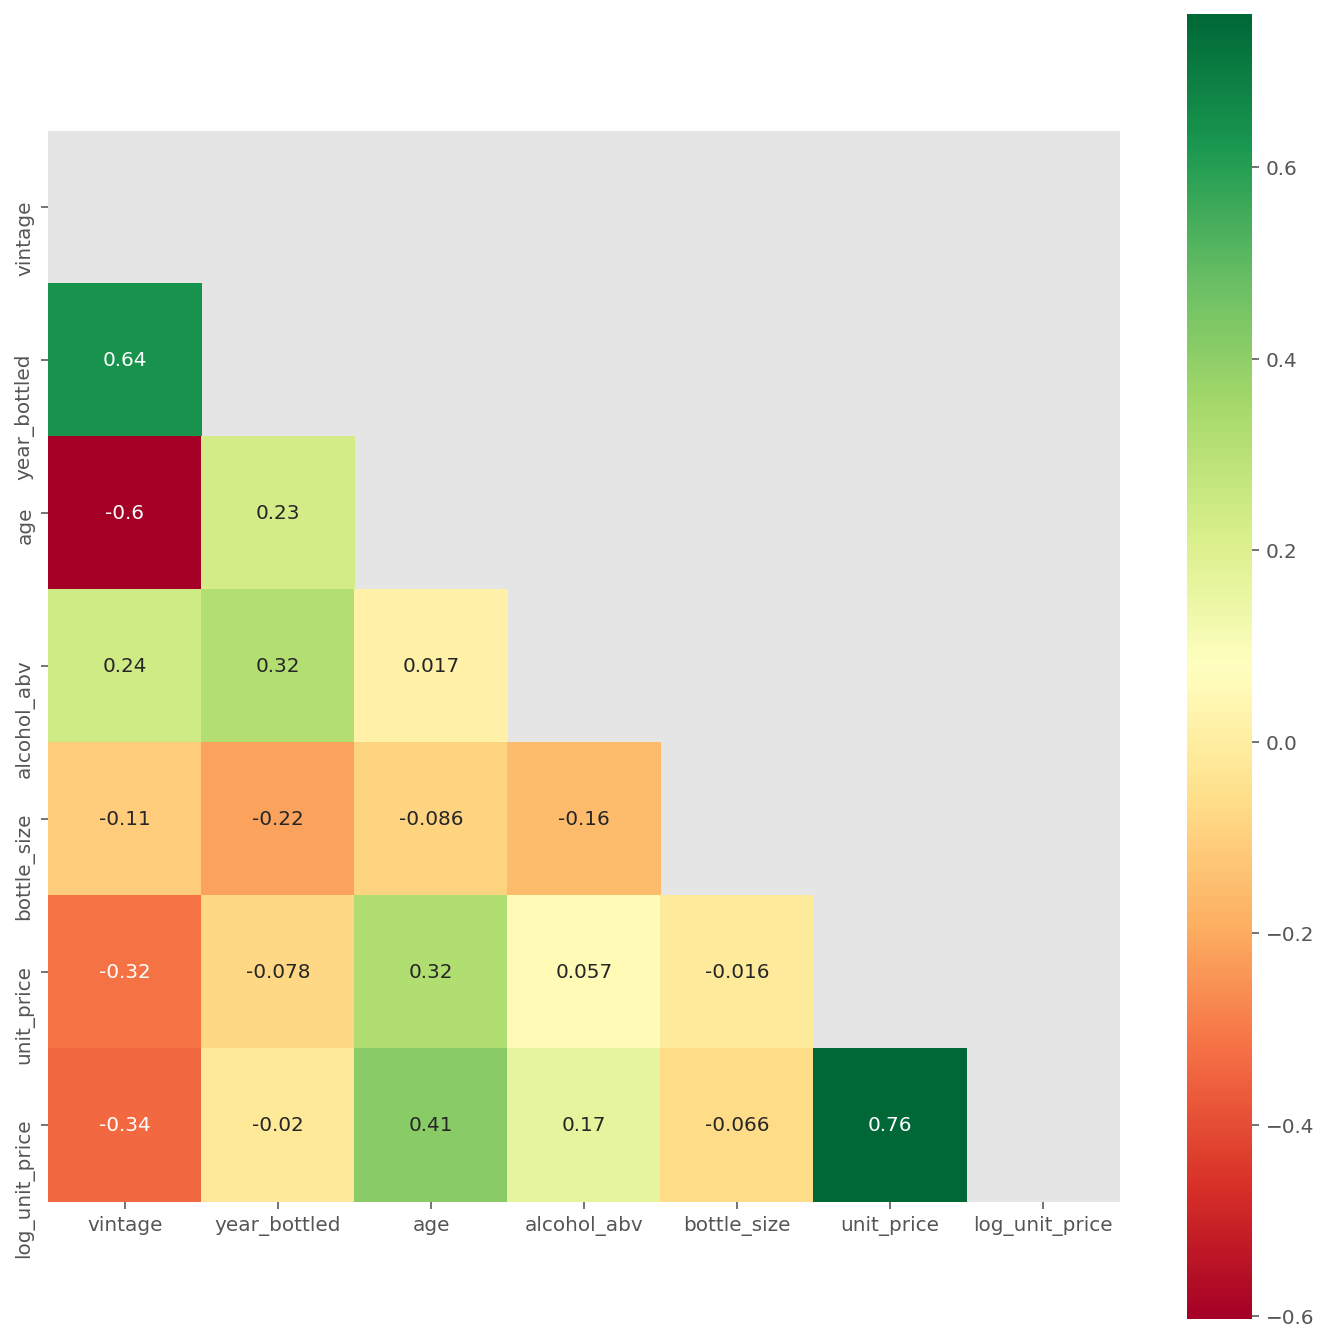

In [180]:
# correlation between variables - heat map
whisky_corr = whisky_neat.corr()

plt.figure(figsize=(12, 12))

mask = np.zeros_like(whisky_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(whisky_corr, mask=mask, square=True, annot=True, cmap='RdYlGn')

plt.savefig("images/28 heat map.png", bbox_inches="tight")
plt.savefig("images/28 heat map.pdf", bbox_inches="tight")

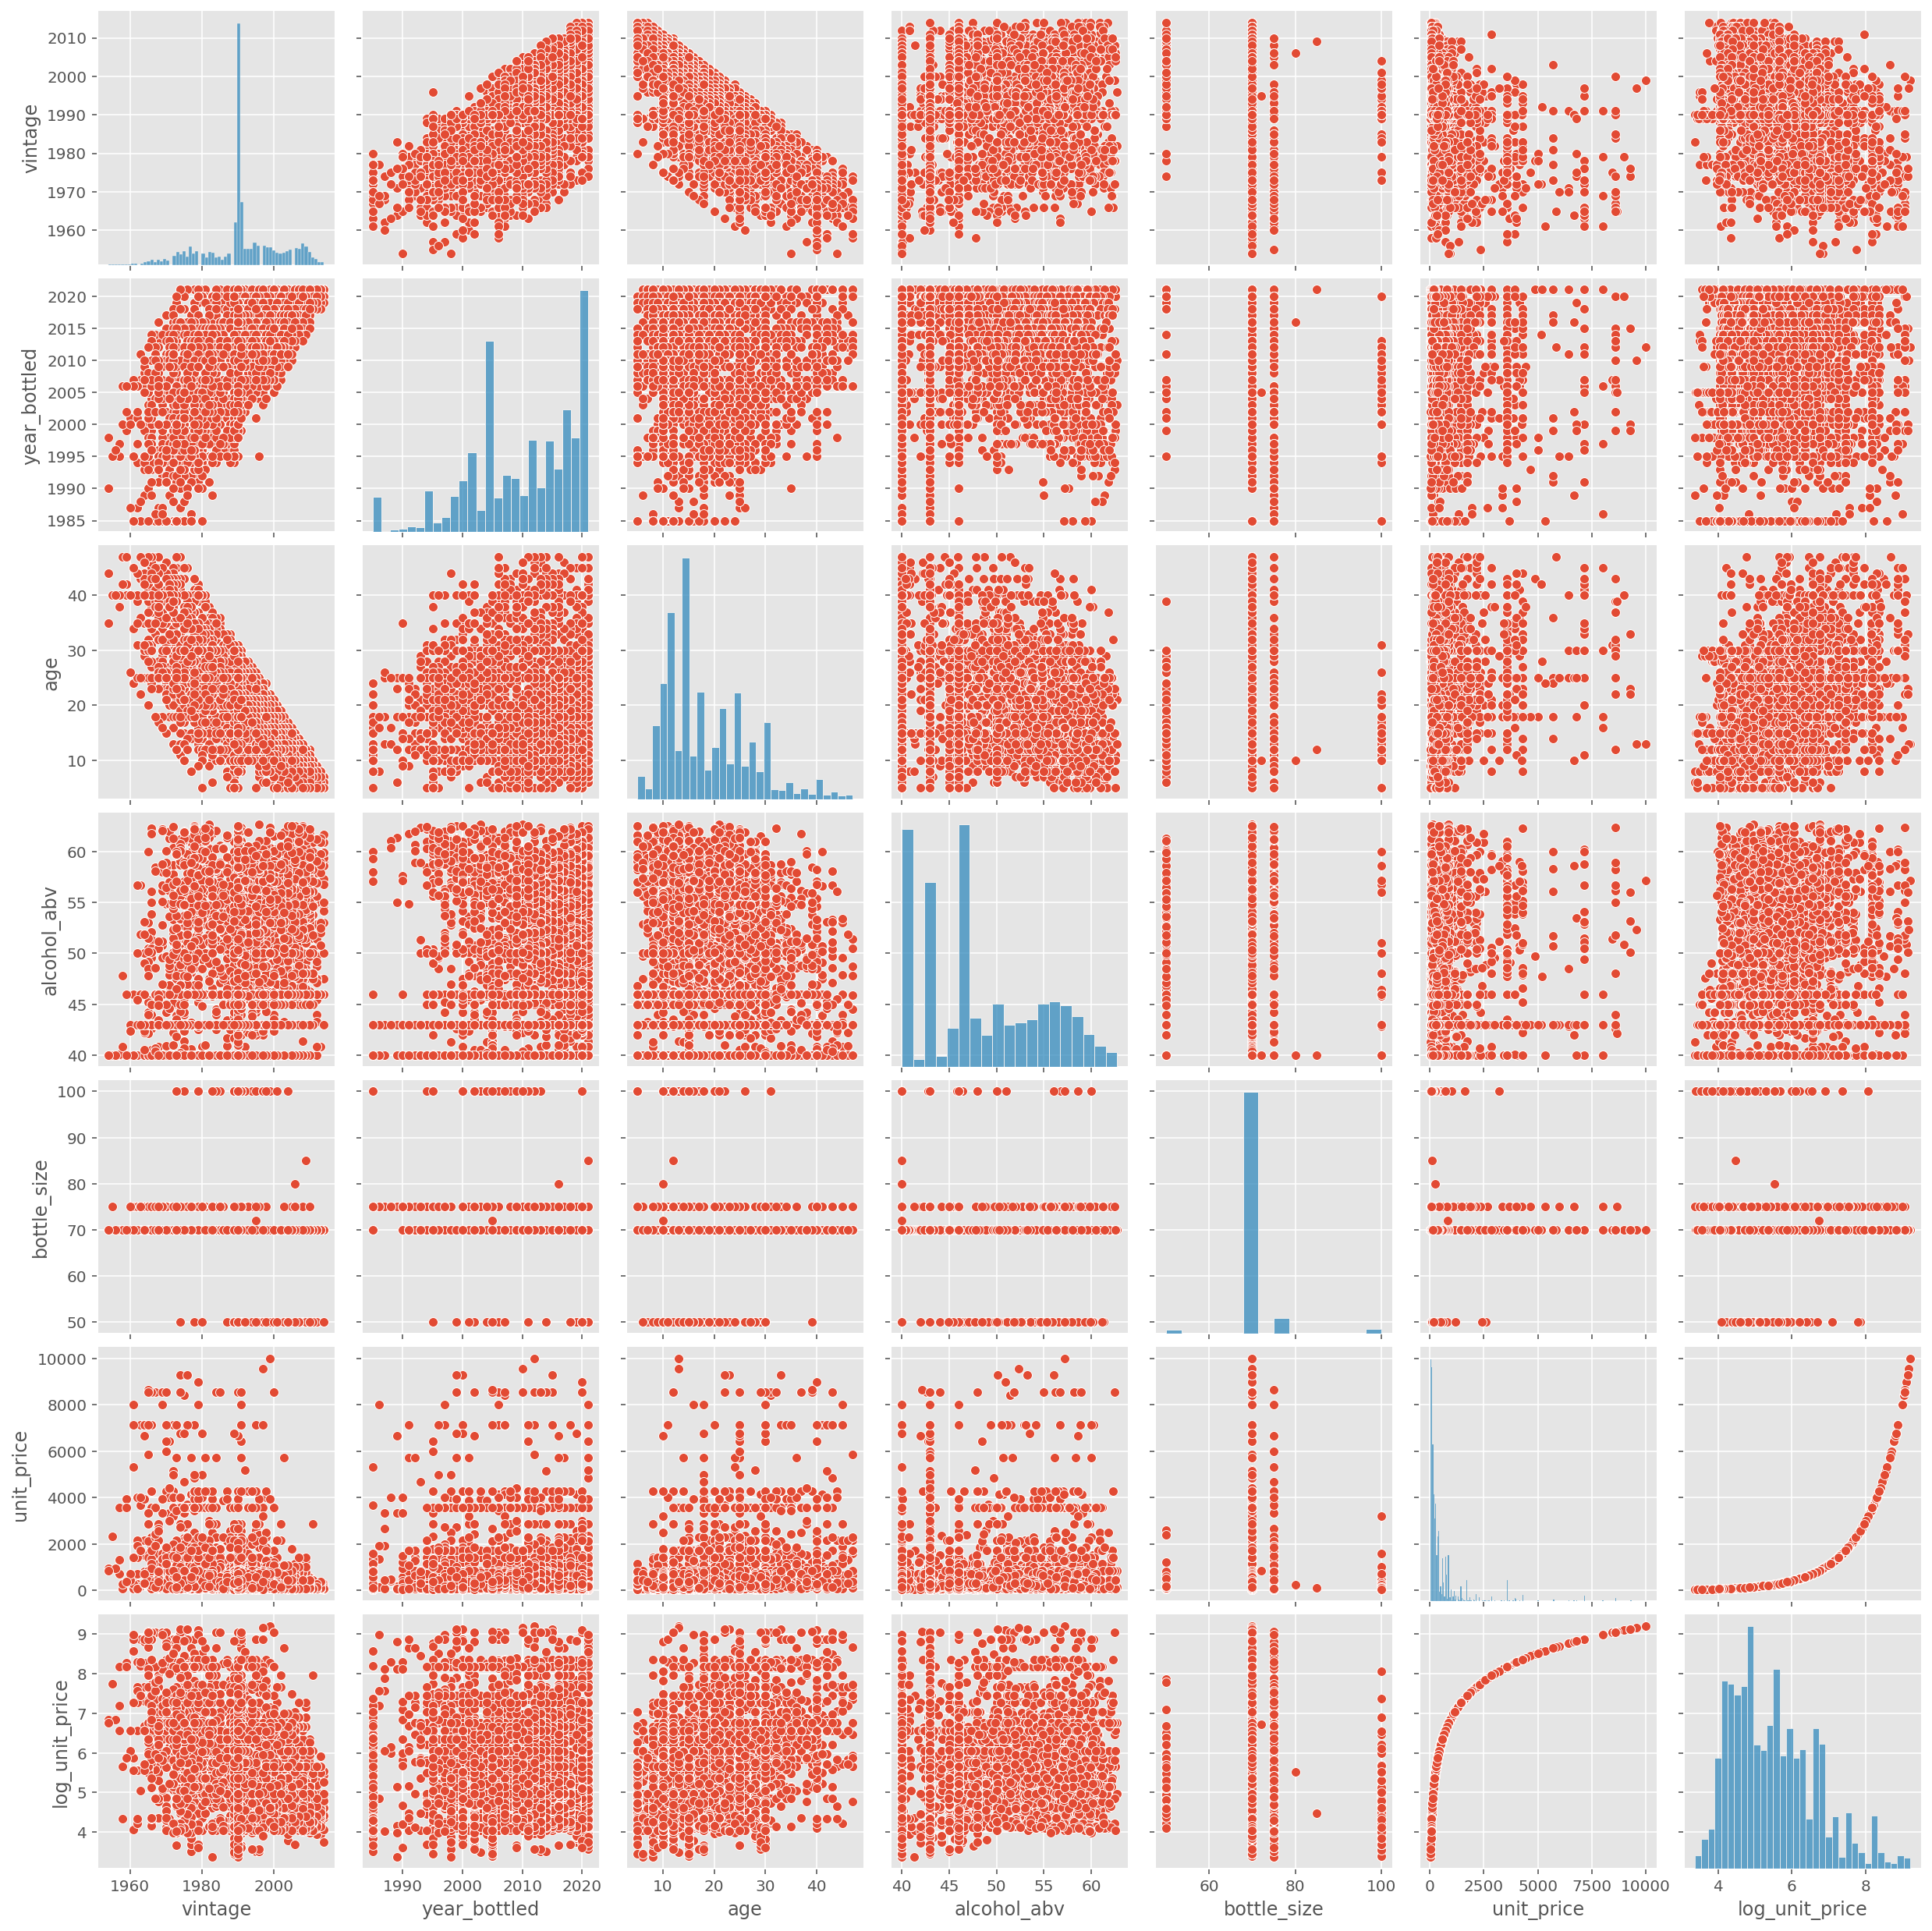

In [181]:
# pair plot
sns.pairplot(whisky_neat)

plt.savefig("images/29 pair plot.png", bbox_inches="tight")
plt.savefig("images/29 pair plot.pdf", bbox_inches="tight")

# 3. Machine Learning Models

There are generally two types of machine learning algorithms when it comes to supervised data: Regression and Classification. When the target (in my case, whisky price) is continuous, the problem is one of Regression.

Regression algorithms that I have selected include:
* 3.5.1 Linear Regression (using all features)
* 3.5.2 RidgeCV
* 3.5.3 LassoCV
* 3.5.4 ElasticNetCV
* 3.5.5 Linear Regression (using 10 'Best' Features)
* 3.5.6 KNeighborsRegressor
* 3.5.7 DecisionTree (with Bagging and AdaBoost techniques) 
* 3.5.8 GradientBoosting
* 3.5.9 RandomForest

In [182]:
# Create a copy of the cleaned dataframe
whisky_on_ice = whisky_neat.copy()

In [183]:
# Reset the index to account for rows that have been removed
whisky_on_ice.reset_index(drop=True, inplace=True)

In [184]:
# investigate columns present in the dataframe
whisky_on_ice.columns

Index(['distillery', 'series', 'vintage', 'year_bottled', 'age', 'alcohol_abv',
       'cask_strength', 'single_cask', 'packaging', 'bottler', 'country',
       'stopper', 'bottle_size', 'description', 'cask_type', 'unit_price',
       'log_unit_price'],
      dtype='object')

## 3.1 Convert categorical features with get_dummies

In [185]:
cat_cols = ["distillery","cask_strength","single_cask","packaging","bottler",
            "country","stopper","cask_type"]

In [186]:
# Dummify
whisky_on_ice = pd.get_dummies(whisky_on_ice, columns=cat_cols, drop_first=True)

## 3.2 Select predictor and target variables

In [187]:
df_whisky = whisky_on_ice.copy()
y = df_whisky.pop("log_unit_price")
# whisky_series = df_whisky.pop("series")
# whisky_description = df_whisky.pop("description")
X = df_whisky

In [188]:
# baseline = average price
mean_log_unit_price = y.mean()
mean_unit_price = df_whisky["unit_price"].mean()

print("Average unit price (log GBP):", round(mean_log_unit_price,2))
print("Average unit price (GBP):", round(mean_unit_price,2))

Average unit price (log GBP): 5.5
Average unit price (GBP): 542.41


In [189]:
# drop "unit_price" column as "log_unit_price" is more suitable for ML algorithms.
unit_price = df_whisky.pop("unit_price")

## 3.3 Split the dataframe into train and test data

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [192]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3957, 250) (1697, 250) (3957,) (1697,)


In [193]:
# remove text columns
whisky_series_train = X_train.pop("series")
whisky_series_test = X_test.pop("series")

whisky_description_train = X_train.pop("description")
whisky_description_test = X_test.pop("description")

## 3.4 Rescale the variables

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler = StandardScaler()

In [196]:
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 3.5 Build Models and Assess

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [198]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor 
from sklearn.model_selection import GridSearchCV, KFold

### Summary of Results

### 3.5.1 Linear Regression

Simply put, Linear Regression can be thought of finding the relationship between two things i.e. dependent/target variable (y - in my case price) and independent/predictor variables (X - my remaining columns) using a straight line.

It is well known that the equation for a line is y = mX + c, which can also be written as follows: 

For simple linear regression
$$ Y=β0+β1X1 $$

where, 
- β0 is the intercept (c from original equation)
- and β1 is the slope (m from original equation)

For multiple linear regression
$$ Y=β0+β1X1+β2X2+…+βnXn $$

where, 
- β0 is the intercept (as before)
- and βn is the coef of the n-th independent variable

These βn coefficients are generally the "weight/importance" of that feature (Xn) for predicting dependent variable (y).

The most common way to define the "best fit line" is to ensure that residuals (a.k.a. errors - the difference between actual vs predicted values) are as close to zero as possible.

- We want to control the total amount of errors made.
- We want to give equal weight to errors of the same size which either overestimate or underestimate the true values.
- We consider single errors with larger magnitude as more important.

To take these points into account, we try to make the mean squared error (MSE) or **root mean squared error (RMSE)** as small as possible. (The square is taken so that negative distances don't cancel out positive distances).

Beta coefficients are determined according to the ordinary least squared principle, i.e. by minimizing the sum of squared residuals.

An additional metric I will consider is the R2-score which is simply the proportion of the variance in the dependent variable that can be explained from the independent variable(s).

Cross-validation (CV) allows us to compare different machine learning methods and get a sense of how they will work in practice, and so I will use the **mean CV R2-score** as my scoring metric.

In [199]:
# create model instance
model_lr = LinearRegression()

# fit model on train dataset
model_lr.fit(X_train_std, y_train)

# evaluate
score_lr = (cross_val_score(model_lr, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_lr)
print("training score:", model_lr.score(X_train_std, y_train))
print("test score:", model_lr.score(X_test_std, y_test))

mean cv training score: -1.0562528737359276e+26
training score: 0.7467713859872052
test score: -2.917051923677798e+23


These extremely low scores make sense, as we have tried to find a linear relationship using all the variables. Let's try narrow down the search...

### 3.5.2 RidgeCV

I will perform feature engineering using regularization techniques. This ensures the best predictor variables are used in determining the target variable.

The two most common types of regularization are the **Lasso** and **Ridge**. There is a mixture of them called the **Elastic Net**.

Ridge Regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

Ridge regression adds the sum of the squared (non-intercept!) $\beta$ values to the loss function

$$ \text{minimize:}\; {\rm RSS+Ridge} = {\rm RSS} + \lambda_2\sum_{j=1}^p \beta_j^2$$

Lambda (λ) is the penalty term, denoted by an alpha parameter in the ridge function. By changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.

In summary:
- It shrinks the parameters. Therefore, it is used to prevent multicollinearity, and
- It reduces the model complexity by coefficient shrinkage.

The assumptions of Ridge Regression are the same as that of Linear Regression: linearity, constant variance, and independence. 

In [200]:
ridge_alphas = np.logspace(-4, 4, 10)

# create model instance
model_ridge = RidgeCV(alphas=ridge_alphas, cv=5)

# fit model on train dataset
model_ridge.fit(X_train_std, y_train)

# evaluate
score_ridge = (cross_val_score(model_ridge, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_ridge)
print("training score:", model_ridge.score(X_train_std, y_train))
print("test score:", model_ridge.score(X_test_std, y_test))

mean cv training score: 0.7083635996289008
training score: 0.7472717883326533
test score: 0.7107393635522737


In [201]:
print('Best alpha:', model_ridge.alpha_)

Best alpha: 0.046415888336127774


In [202]:
y_pred_ridge = model_ridge.predict(X_test_std)

# model metrics, log scale
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)

MSE: 0.3746473104227374
RMSE: 0.6120843981206655


In [203]:
# convert log values to regular
y_exp = np.exp(y)
y_test_exp = np.exp(y_test)
y_pred_ridge_exp = np.exp(y_pred_ridge)

In [204]:
# model metrics, regular scale
mse_ridge_exp = mean_squared_error(y_test_exp, y_pred_ridge_exp)
rmse_ridge_exp = np.sqrt(mse_ridge_exp)
print("MSE:", mse_ridge_exp)
print("RMSE:", rmse_ridge_exp)

MSE: 355552.7713794443
RMSE: 596.2824593927313


In [205]:
ridge_coefs = pd.DataFrame({'variable': X_train_std.columns,
                            'coef': model_ridge.coef_,
                            'abs_coef': np.abs(model_ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

variable      coef  abs_coef
2                               age  0.508853  0.508853
126             distillery_Macallan  0.476733  0.476733
158  distillery_Port Ellen (silent)  0.319417  0.319417
168           distillery_Springbank  0.298264  0.298264
1                      year_bottled -0.272372  0.272372
0                           vintage  0.265046  0.265046
8                 distillery_Ardbeg  0.264302  0.264302
32        distillery_Brora (silent)  0.255584  0.255584
79           distillery_GlenDronach  0.186494  0.186494
85           distillery_Glenfarclas  0.176517  0.176517

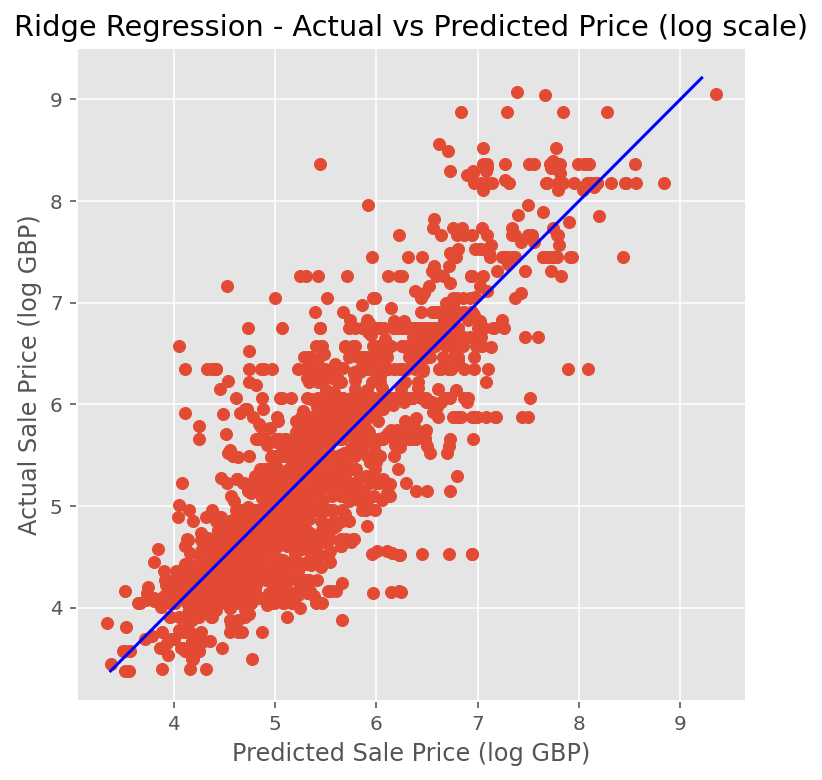

In [206]:
# Actual vs Predicted Price (log scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_ridge, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='b')
plt.ylabel('Actual Sale Price (log GBP)')
plt.xlabel('Predicted Sale Price (log GBP)')
plt.title("Ridge Regression - Actual vs Predicted Price (log scale)")

plt.savefig("images/30 Ridge Regression - Actual vs Predicted Price (log scale).png", bbox_inches="tight")
plt.savefig("images/30 Ridge Regression - Actual vs Predicted Price (log scale).pdf", bbox_inches="tight")

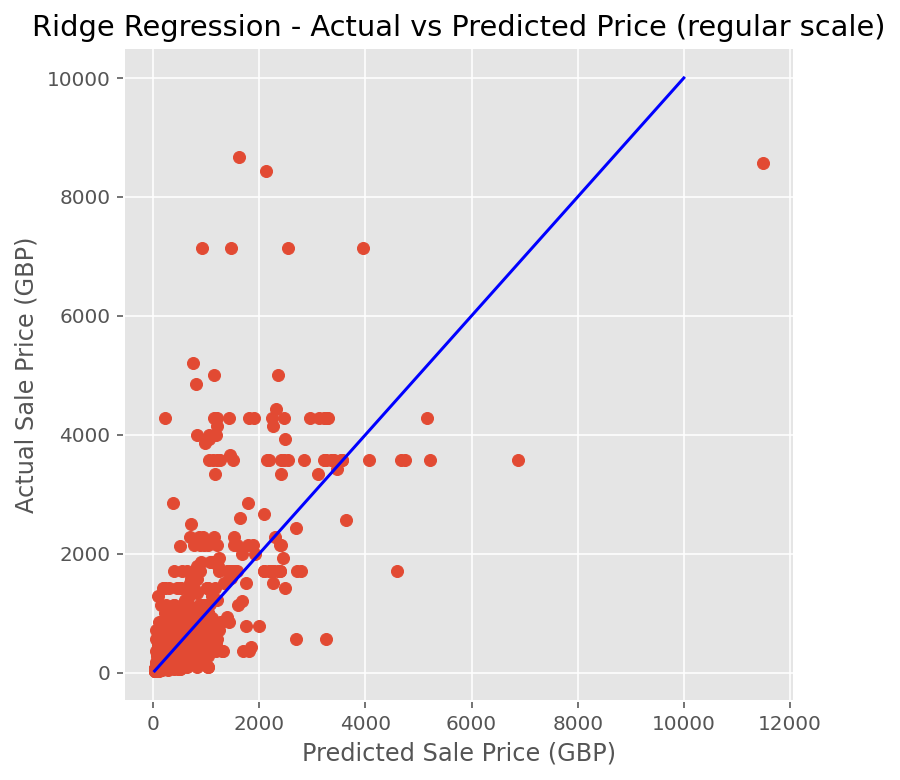

In [207]:
# Actual vs Predicted Price (regular scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_ridge_exp, y_test_exp)
plt.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], c='b')
plt.ylabel('Actual Sale Price (GBP)')
plt.xlabel('Predicted Sale Price (GBP)')
plt.title("Ridge Regression - Actual vs Predicted Price (regular scale)")

plt.savefig("images/31 Ridge Regression - Actual vs Predicted Price (regular scale).png", bbox_inches="tight")
plt.savefig("images/31 Ridge Regression - Actual vs Predicted Price (regular scale).pdf", bbox_inches="tight")

### 3.5.3 LassoCV

The Lasso regression takes a different approach. Instead of adding the sum of _squared_ $\beta$ coefficients to the RSS, one adds the sum of the _absolute values_ of the $\beta$ coefficients:

$$ \text{minimize:}\; {\rm RSS + Lasso} = {\rm RSS} + \lambda_1\sum_{j=1}^p |\beta_j|$$

This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination. Lasso Regression uses L1 regularization technique.

L1 regularization adds a penalty that is equal to the absolute value of the magnitude of the coefficient. **This regularization type can result in sparse models with few coefficients. Some coefficients might become zero and get eliminated from the model.** Larger penalties result in coefficient values that are closer to zero (ideal for producing simpler models). On the other hand, L2 regularization does not result in any elimination of sparse models or coefficients. Thus, Lasso Regression is easier to interpret as compared to Ridge. 

In [208]:
# create model instance
model_lasso = LassoCV(n_alphas=500, cv=5, max_iter=3000)

# fit model on train dataset
model_lasso.fit(X_train_std, y_train)

# evaluate
score_lasso = (cross_val_score(model_lasso, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_lasso)
print("training score:", model_lasso.score(X_train_std, y_train))
print("test score:", model_lasso.score(X_test_std, y_test))

mean cv training score: 0.7110582540532968
training score: 0.7448482415888388
test score: 0.7099673341494863


In [209]:
print('Best alpha:', model_lasso.alpha_)

Best alpha: 0.0031907685418065086


In [210]:
y_pred_lasso = model_lasso.predict(X_test_std)

# model metrics, log scale
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)

MSE: 0.37564723472240574
RMSE: 0.6129006728030291


In [211]:
# convert log values to regular
y_pred_lasso_exp = np.exp(y_pred_lasso)

In [212]:
# model metrics, regular scale
mse_lasso_exp = mean_squared_error(y_test_exp, y_pred_lasso_exp)
rmse_lasso_exp = np.sqrt(mse_lasso_exp)
print("MSE:", mse_lasso_exp)
print("RMSE:", rmse_lasso_exp)

MSE: 355839.99526012863
RMSE: 596.5232562609178


In [213]:
lasso_coefs = pd.DataFrame({'variable': X_train_std.columns,
                            'coef': model_lasso.coef_,
                            'abs_coef': np.abs(model_lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

variable      coef  abs_coef
126             distillery_Macallan  0.424829  0.424829
158  distillery_Port Ellen (silent)  0.287850  0.287850
168           distillery_Springbank  0.261999  0.261999
2                               age  0.244030  0.244030
32        distillery_Brora (silent)  0.233854  0.233854
8                 distillery_Ardbeg  0.225011  0.225011
85           distillery_Glenfarclas  0.149792  0.149792
79           distillery_GlenDronach  0.146396  0.146396
219            packaging_Wooden Box  0.129966  0.129966
110   distillery_Karuizawa (silent)  0.126626  0.126626

In [214]:
print('Percent variables zeroed out:', np.sum(
    (np.abs(model_lasso.coef_) == 0))/float(X_train_std.shape[1]))

Percent variables zeroed out: 0.10483870967741936


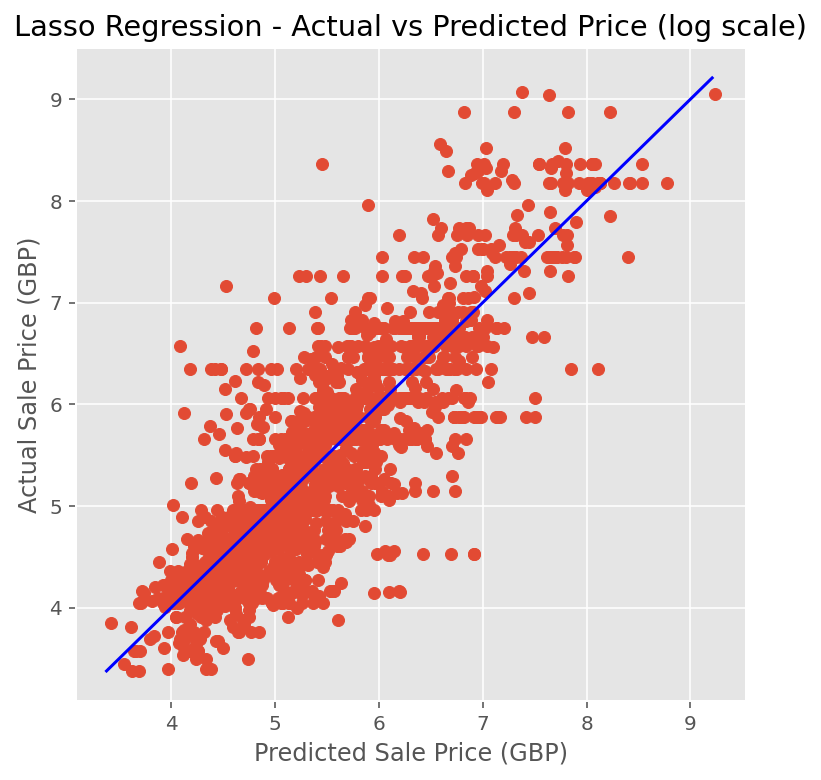

In [215]:
# Actual vs Predicted Price (log scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_lasso, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='b')
plt.ylabel('Actual Sale Price (GBP)')
plt.xlabel('Predicted Sale Price (GBP)')
plt.title("Lasso Regression - Actual vs Predicted Price (log scale)")

plt.savefig("images/32 Lasso Regression - Actual vs Predicted Price (log scale).png", bbox_inches="tight")
plt.savefig("images/32 Lasso Regression - Actual vs Predicted Price (log scale).pdf", bbox_inches="tight")

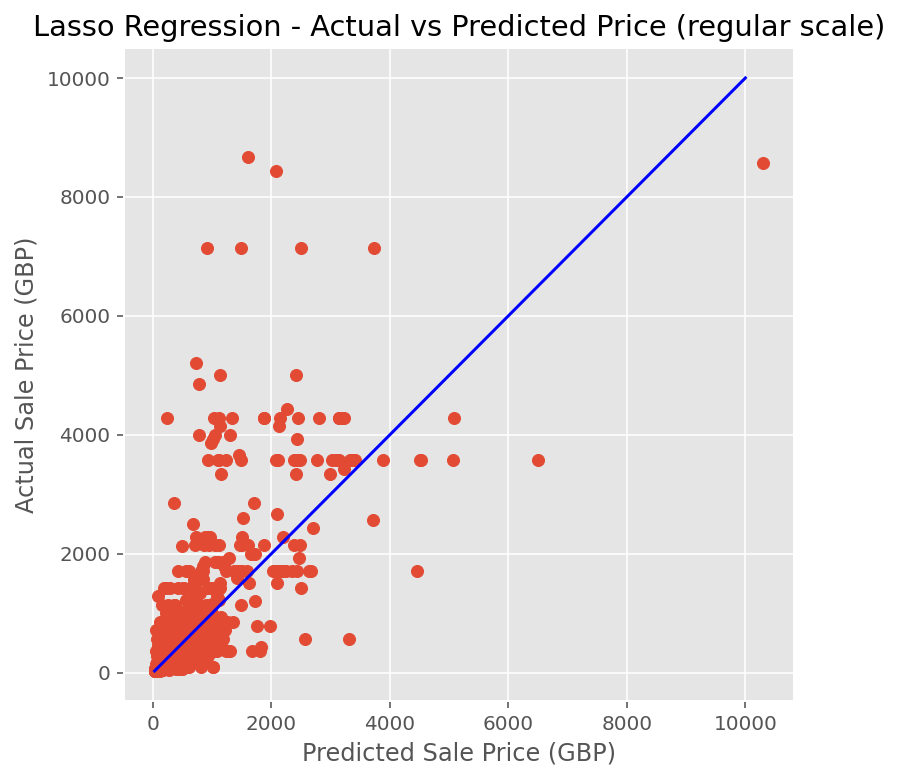

In [216]:
# Actual vs Predicted Price (regular scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_lasso_exp, y_test_exp)
plt.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], c='b')
plt.ylabel('Actual Sale Price (GBP)')
plt.xlabel('Predicted Sale Price (GBP)')
plt.title("Lasso Regression - Actual vs Predicted Price (regular scale)")

plt.savefig("images/33 Lasso Regression - Actual vs Predicted Price (regular scale).png", bbox_inches="tight")
plt.savefig("images/33 Lasso Regression - Actual vs Predicted Price (regular scale).pdf", bbox_inches="tight")

### 3.5.4 ElasticNetCV

Elastic Net is a combination of the Lasso and the Ridge regularizations. It adds *both* penalties to the loss function:

$$ \begin{eqnarray*}
\text{minimize:}\; {\rm RSS + Ridge + Lasso} &=&  {\rm RSS} + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2
\end{eqnarray*}
$$

In the elastic net, the effect of the Ridge versus the Lasso is balanced by the two $\lambda$-parameters. 

`ElasticNet` in sklearn has two parameters:
- `alpha`: the regularization strength.
- `l1_ratio`: the amount of L1 versus L2 penalty. An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.

In [217]:
# create model instance
model_elas = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1]),
                     cv=5, max_iter=5000)

# fit model on train dataset
model_elas.fit(X_train_std, y_train)

# evaluate
score_elas = (cross_val_score(model_elas, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_elas)
print("training score:", model_elas.score(X_train_std, y_train))
print("test score:", model_elas.score(X_test_std, y_test))

/Users/garethharper/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4118991348320833, tolerance: 0.3254289477730855
  model = cd_fast.enet_coordinate_descent_gram(


mean cv training score: 0.7108913205386553
training score: 0.7449279598682144
test score: 0.7099600961341328


In [218]:
print('Best alpha:', model_elas.alpha_)
print('Best l1-ratio:', model_elas.l1_ratio_)

Best alpha: 0.005994842503189409
Best l1-ratio: 0.5


In [219]:
y_pred_elas = model_elas.predict(X_test_std)

# model metrics, log scale
mse_elas = mean_squared_error(y_test, y_pred_elas)
rmse_elas = np.sqrt(mse_elas)
print("MSE:", mse_elas)
print("RMSE:", rmse_elas)

MSE: 0.3756566093231749
RMSE: 0.6129083204877993


In [220]:
# convert log values to regular
y_pred_elas_exp = np.exp(y_pred_elas)

In [221]:
# model metrics, regular scale
mse_elas_exp = mean_squared_error(y_test_exp, y_pred_elas_exp)
rmse_elas_exp = np.sqrt(mse_elas_exp)
print("MSE:", mse_elas_exp)
print("RMSE:", rmse_elas_exp)

MSE: 355985.80743301637
RMSE: 596.6454620903576


In [222]:
elas_coefs = pd.DataFrame({'variable': X_train_std.columns,
                            'coef': model_elas.coef_,
                            'abs_coef': np.abs(model_elas.coef_)})

elas_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elas_coefs.head(10)

variable      coef  abs_coef
126             distillery_Macallan  0.418865  0.418865
158  distillery_Port Ellen (silent)  0.284449  0.284449
168           distillery_Springbank  0.258004  0.258004
2                               age  0.242573  0.242573
32        distillery_Brora (silent)  0.231505  0.231505
8                 distillery_Ardbeg  0.221170  0.221170
85           distillery_Glenfarclas  0.147324  0.147324
79           distillery_GlenDronach  0.142066  0.142066
219            packaging_Wooden Box  0.128261  0.128261
110   distillery_Karuizawa (silent)  0.125461  0.125461

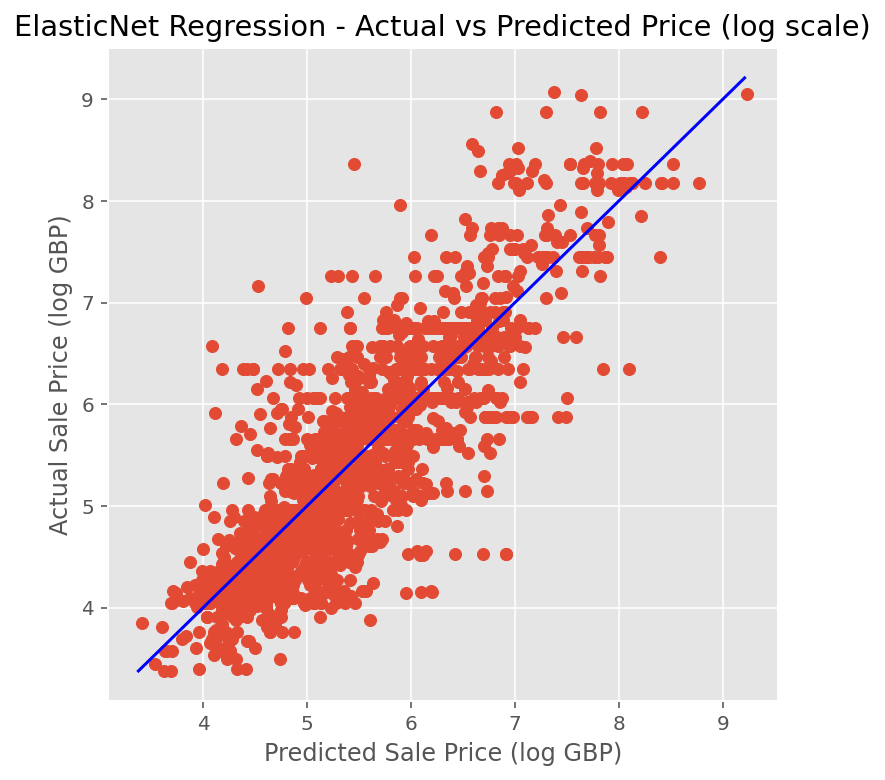

In [223]:
# Actual vs Predicted Price (log scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_elas, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='b')
plt.ylabel('Actual Sale Price (log GBP)')
plt.xlabel('Predicted Sale Price (log GBP)')
plt.title("ElasticNet Regression - Actual vs Predicted Price (log scale)")

plt.savefig("images/34 ElasticNet Regression - Actual vs Predicted Price (log scale).png", bbox_inches="tight")
plt.savefig("images/34 ElasticNet Regression - Actual vs Predicted Price (log scale).pdf", bbox_inches="tight")

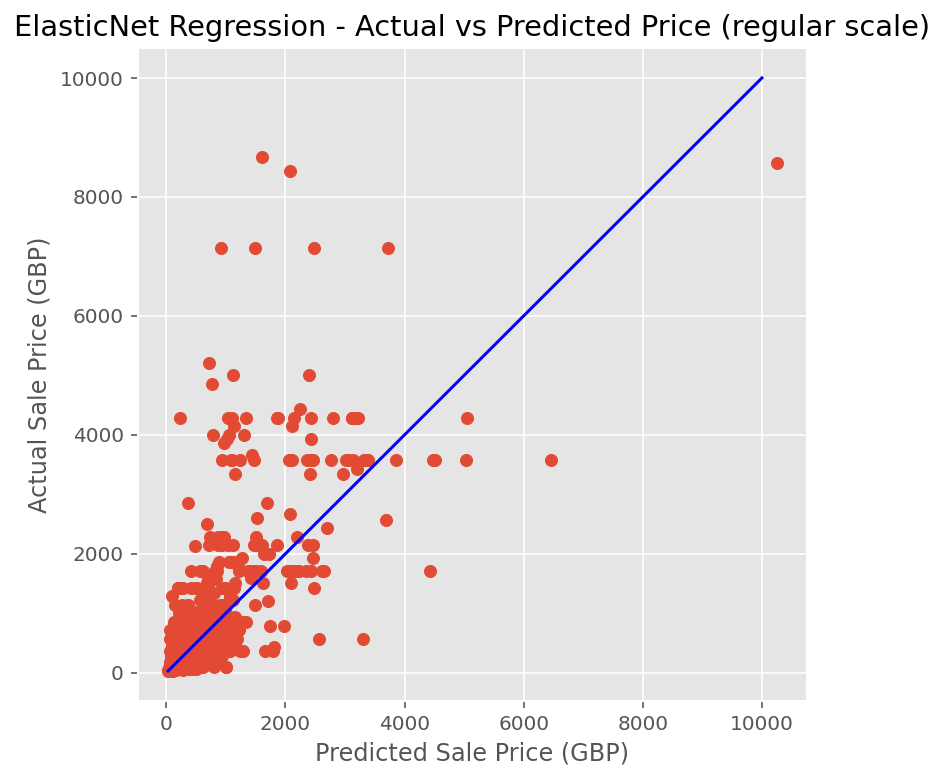

In [224]:
# Actual vs Predicted Price (regular scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_elas_exp, y_test_exp)
plt.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], c='b')
plt.ylabel('Actual Sale Price (GBP)')
plt.xlabel('Predicted Sale Price (GBP)')
plt.title("ElasticNet Regression - Actual vs Predicted Price (regular scale)")

plt.savefig("images/35 ElasticNet Regression - Actual vs Predicted Price (regular scale).png", bbox_inches="tight")
plt.savefig("images/35 ElasticNet Regression - Actual vs Predicted Price (regular scale).pdf", bbox_inches="tight")

### 3.5.5 Linear Regression (10 'Best' Features)

In [225]:
# select top 10 coefficients based on Ridge model (can do a similar exercise based on Lasso)
top10 = ridge_coefs.head(10)
top10

variable      coef  abs_coef
2                               age  0.508853  0.508853
126             distillery_Macallan  0.476733  0.476733
158  distillery_Port Ellen (silent)  0.319417  0.319417
168           distillery_Springbank  0.298264  0.298264
1                      year_bottled -0.272372  0.272372
0                           vintage  0.265046  0.265046
8                 distillery_Ardbeg  0.264302  0.264302
32        distillery_Brora (silent)  0.255584  0.255584
79           distillery_GlenDronach  0.186494  0.186494
85           distillery_Glenfarclas  0.176517  0.176517

In [226]:
# create dataframe with reduced features
X_bf = df_whisky[top10.variable]

# split the reduced dataframe into train and test data
X_train_std_bf, X_test_std_bf, y_train, y_test = train_test_split(X_bf, y,
                                                          test_size=0.3, random_state=0)

# scale reduced dataframe
X_train_std_bf = pd.DataFrame(scaler.fit_transform(X_train_std_bf), columns=X_train_std_bf.columns)
X_test_std_bf = pd.DataFrame(scaler.transform(X_test_std_bf), columns=X_test_std_bf.columns)

In [227]:
# create model instance
model_lr_bf = LinearRegression()

# fit model on train dataset
model_lr_bf.fit(X_train_std_bf, y_train)

# evaluate
score_lr_bf = (cross_val_score(model_lr_bf, X_train_std_bf, y_train, cv=5)).mean()
print("mean cv training score:", score_lr_bf)
print("training score:", model_lr_bf.score(X_train_std_bf, y_train))
print("test score:", model_lr_bf.score(X_test_std_bf, y_test))

mean cv training score: 0.47968856149779954
training score: 0.48347257604514804
test score: 0.4723834954246734


### 3.5.6 KNeighborsRegressor

In order to estimate a continuous variable (regression), the k-NN regression algorithm finds the observations in its training data that are "nearest" to the observation to predict. It then takes a majority vote of those training observations' target values to estimate the value for the new data point.

KNeighborsRegressor implements learning based on the k-nearest neighbors of each query point, where k is an integer value specified by the user (default: `n_neighbors=5`). The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. 

In [228]:
# create model instance
model_knn = KNeighborsRegressor()

# fit model on train dataset
model_knn.fit(X_train_std, y_train)

# evaluate
score_knn = (cross_val_score(model_knn, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_knn)
print("training score:", model_knn.score(X_train_std, y_train))
print("test score:", model_knn.score(X_test_std, y_test))

mean cv training score: 0.6756034533183032
training score: 0.8082340242703161
test score: 0.6861873402173636


### 3.5.7 DecisionTreeRegressor

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features (essentially a series of true/false questions). A tree can be seen as a piecewise constant approximation.

Decision tree models are **hierarchical** and **non-parametric**.

**Hierarchical** means that the model is defined by a sequence of questions which yield a value (regression) when applied to any observation. Once trained, the model behaves like a recipe, a series of "if this then that" conditions that yields a specific result for our input data.

**Non-parametric** implies there are no underlying assumptions about the distribution of the data or the errors. Non-parametric models start with no _assumed_ parameters about the data.

Decision Trees are easy to build, easy to use and easy to interpret...but in practice they are not that great as individual trees lack accuracy.

In [229]:
# create model instance
model_dtr = DecisionTreeRegressor(random_state=1)

# fit model on train dataset
model_dtr.fit(X_train_std, y_train)

# evaluate
score_dtr = (cross_val_score(model_dtr, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_dtr)
print("training score:", model_dtr.score(X_train_std, y_train))
print("test score:", model_dtr.score(X_test_std, y_test))

mean cv training score: 0.5256325281475307
training score: 0.9962437022420163
test score: 0.5573470428697598


Let me investigate if Ensemble Techniques improve the performance of the DecisionTree model.

Ensemble techniques are supervised learning methods to improve predictive accuracy by combining several base models in order to enlarge the space of possible hypotheses to represent our data. Ensembles are often much more accurate than the base classifiers that compose them.

Two families of ensemble methods are usually distinguished: Bagging methods and Boosting methods. I will look at an example of each.

#### 3.5.7.1 Bagging - DecisionTreeRegressor

A Bagging Regressor is an ensemble estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction. It introduces randomization into the DecisionTree (or other base estimator) construction procedure and then makes an ensemble out of it. On average, the combined estimator is usually better than any of the single base estimators because its variance is reduced.

In [230]:
# create model instance
bagging_dtr = BaggingRegressor(base_estimator=model_dtr, random_state=1)

# fit model on train dataset
bagging_dtr.fit(X_train_std, y_train)

# evaluate
score_dtr_bag = (cross_val_score(bagging_dtr, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_dtr_bag)
print("training score:", bagging_dtr.score(X_train_std, y_train))
print("test score:", bagging_dtr.score(X_test_std, y_test))

mean cv training score: 0.7026988443436426
training score: 0.9467987119989663
test score: 0.7387880030635741


#### 3.5.7.2 AdaBoost - DecisionTreeRegressor

An AdaBoost (Adaptive Boost) Regressor is also an ensemble estimator that begins by fitting a regressor on the original dataset. It then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. Base estimators are therefore built sequentially and one tries to reduce the bias of the combined estimators.

Trees made with AdaBoost are usually just a node and to leaves, known as Stumps (technically "weak learners").

In a Random Forest, each tree has an equal vote on the final classification. In contrast, in a Forest of Stumps* made with AdaBoost, some stumps get more say in the final classification than others.

In [231]:
# create model instance
boost_dtr = AdaBoostRegressor(base_estimator=model_dtr, random_state=1)

# fit model on train dataset
boost_dtr.fit(X_train_std, y_train)

# evaluate
score_dtr_boost = (cross_val_score(boost_dtr, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_dtr_boost)
print("training score:", boost_dtr.score(X_train_std, y_train))
print("test score:", boost_dtr.score(X_test_std, y_test))

mean cv training score: 0.7150530147532608
training score: 0.9862176583746148
test score: 0.7527670765310082


Enhancing the DecisionTree with Bagging and Boosting methods improves the score.

### 3.5.8 GradientBoostingRegressor

GB (or Gradient Boosting Decision Trees) is a generalization of boosting and uses a technique whereby each predictor corrects its predecessor's error using the residual errors of its predecessor as labels. In each stage a regression tree is fit on the negative gradient of the given loss function. The process is repeated until all _N_ trees forming the ensemble are trained.

In [232]:
# create model instance
model_gbr = GradientBoostingRegressor(random_state=1)

# fit model on train dataset
model_gbr.fit(X_train_std, y_train)

# evaluate
score_gbr = (cross_val_score(model_gbr, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_gbr)
print("training score:", model_gbr.score(X_train_std, y_train))
print("test score:", model_gbr.score(X_test_std, y_test))

mean cv training score: 0.6473901586538737
training score: 0.6865740682292427
test score: 0.647882312171973


### 3.5.9 RandomForestRegressor

Similarly, Random Forest is a generalization of bagging using randomized decision trees. The basic idea is to combine multiple decision trees in determining the output rather than relying on individual decision trees. 

Random Forest combines the simplicity of decision trees with flexibility resulting in a vast improvement in accuracy.

Each tree in the ensemble is built from a sample drawn _with_ replacement (i.e. a bootstrap sample). Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`.

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

In [233]:
# create model instance
model_rfr = RandomForestRegressor(random_state=1)

# fit model on train dataset
model_rfr.fit(X_train_std, y_train)

# evaluate
score_rfr = (cross_val_score(model_rfr, X_train_std, y_train, cv=5)).mean()
print("mean cv training score:", score_rfr)
print("training score:", model_rfr.score(X_train_std, y_train))
print("test score:", model_rfr.score(X_test_std, y_test))

mean cv training score: 0.725256092113417
training score: 0.9615616522302327
test score: 0.7579819595087782


At this point I will perform a gridsearch on GradientBoosting and RandomForest models in order to attempt to optimize the results.

Gridsearch provides a method to tune model hyperparameters, and thereby optimizing the model by determining the hyperparameters that resulted in the best model performance.

## 3.6 Gridsearch

K-Folds is a cross-validator that splits data into train/test splits (without shuffling). Each fold is then used once as validation (the test set) while the k-1 remaining folds form the training set.

In [234]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

### 3.6.1 GradientBoostingRegressor w/ GS

In [235]:
# gridsearch params
gbr_params = {
    'max_depth': [2,4,8,None],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_features': [None, 1, 2, 3],
}

# set the gridsearch
# model_gbr = GradientBoostingRegressor()
gbr_gs = GridSearchCV(model_gbr, gbr_params, cv=kf, verbose=1, n_jobs=-2)

In [236]:
# use the gridearch model to fit the data
gbr_gs.fit(X_train_std, y_train)
gbr_best = gbr_gs.best_estimator_
print(gbr_gs.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'learning_rate': 0.2, 'max_depth': 8, 'max_features': None}


In [237]:
print("best cv_score:", gbr_gs.best_score_)
print("training_score:", gbr_gs.score(X_train_std, y_train))
print("test_score:", gbr_gs.score(X_test_std, y_test))

best cv_score: 0.7444327430271087
training_score: 0.9177232323720937
test_score: 0.7715809871104549


In [238]:
y_pred_gbr = gbr_gs.predict(X_test_std)

# model metrics, log scale
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("MSE:", mse_gbr)
print("RMSE:", rmse_gbr)

MSE: 0.29584588445704285
RMSE: 0.5439171669078324


In [239]:
# convert log values to regular values
y_pred_gbr_exp = np.exp(y_pred_gbr)

In [240]:
# model metrics, regular scale
mse_gbr_exp = mean_squared_error(y_test_exp, y_pred_gbr_exp)
rmse_gbr_exp = np.sqrt(mse_gbr_exp)
print("MSE:", mse_gbr_exp)
print("RMSE:", rmse_gbr_exp)

MSE: 230275.68448055338
RMSE: 479.87048719477775


In [241]:
gbr_fi = pd.DataFrame({
    'feature': X_train_std.columns,
    'importance': model_gbr.feature_importances_
})

gbr_fi.sort_values('importance', ascending=False, inplace=True)
gbr_fi.head(10)

feature  importance
2                               age    0.223058
0                           vintage    0.168344
126             distillery_Macallan    0.140640
168           distillery_Springbank    0.058559
158  distillery_Port Ellen (silent)    0.044610
8                 distillery_Ardbeg    0.037991
32        distillery_Brora (silent)    0.034101
3                       alcohol_abv    0.032620
219            packaging_Wooden Box    0.023336
85           distillery_Glenfarclas    0.021242

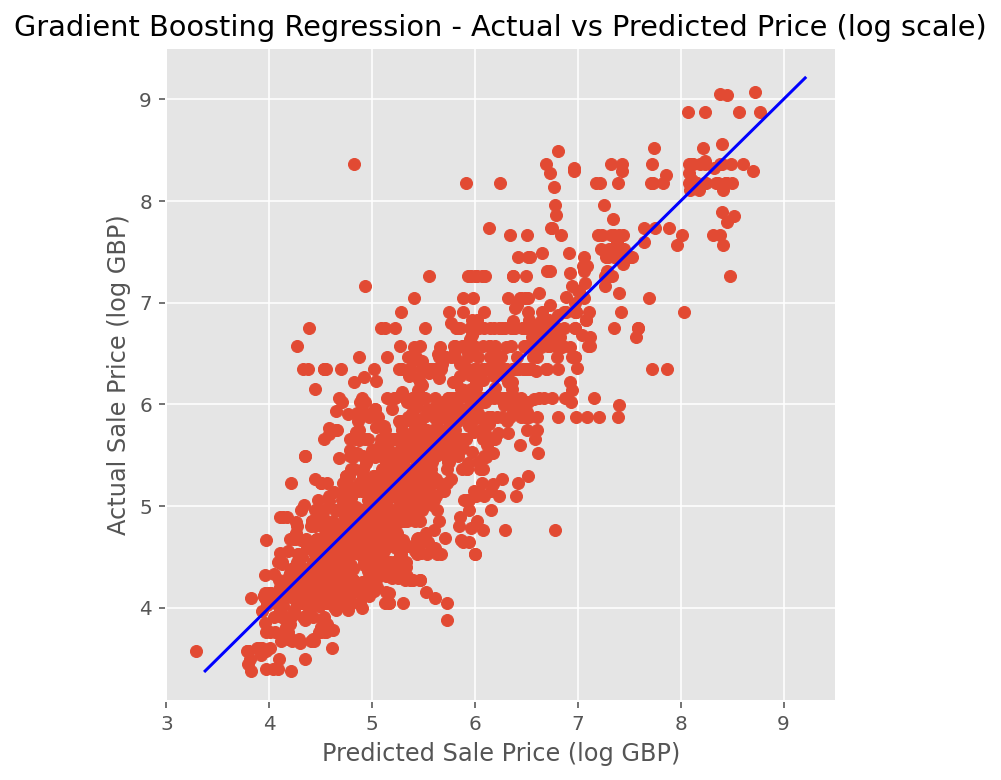

In [242]:
# Actual vs Predicted Price (log scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_gbr, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='b')
plt.ylabel('Actual Sale Price (log GBP)')
plt.xlabel('Predicted Sale Price (log GBP)')
plt.title("Gradient Boosting Regression - Actual vs Predicted Price (log scale)")

plt.savefig("images/36 Gradient Boosting Regression - Actual vs Predicted Price (log scale).png", bbox_inches="tight")
plt.savefig("images/36 Gradient Boosting Regression - Actual vs Predicted Price (log scale).pdf", bbox_inches="tight")

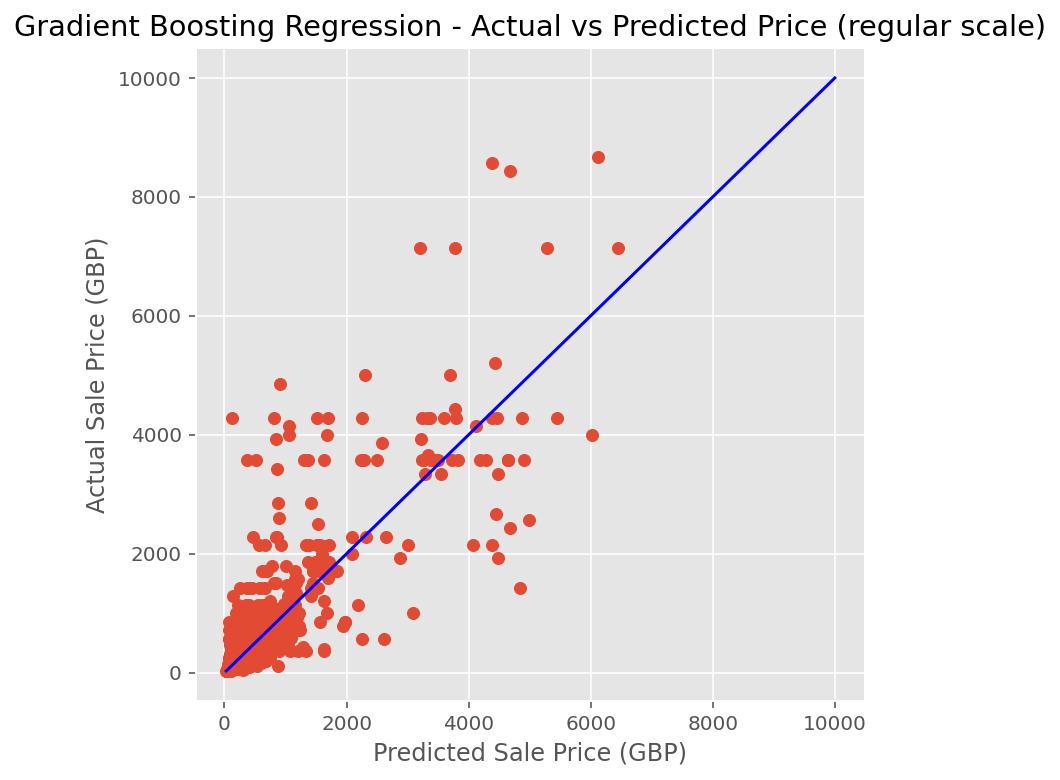

In [243]:
# Actual vs Predicted Price (regular scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_gbr_exp, y_test_exp)
plt.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], c='b')
plt.ylabel('Actual Sale Price (GBP)')
plt.xlabel('Predicted Sale Price (GBP)')
plt.title("Gradient Boosting Regression - Actual vs Predicted Price (regular scale)")

plt.savefig("images/37 Gradient Boosting Regression - Actual vs Predicted Price (regular scale).png", bbox_inches="tight")
plt.savefig("images/37 Gradient Boosting Regression - Actual vs Predicted Price (regular scale).pdf", bbox_inches="tight")

### 3.6.2 RandomForestRegressor w/ GS

In [244]:
# gridsearch params
rfr_params = {
    'max_depth': [2,4,8,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# set the gridsearch
# model_rfr = RandomForestRegressor()
rfr_gs = GridSearchCV(model_rfr, rfr_params, cv=kf, verbose=1, n_jobs=-2)

In [245]:
# use the gridearch model to fit the data
rfr_gs.fit(X_train_std, y_train)
rfr_best = rfr_gs.best_estimator_
print(rfr_gs.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [246]:
print("best cv_score:", rfr_gs.best_score_)
print("training_score:", rfr_gs.score(X_train_std, y_train))
print("test_score:", rfr_gs.score(X_test_std, y_test))

best cv_score: 0.7242217083310142
training_score: 0.9438344547061412
test_score: 0.757420514008018


In [247]:
y_pred_rfr = rfr_gs.predict(X_test_std)

# model metrics, log scale
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print("MSE:", mse_rfr)
print("RMSE:", rmse_rfr)

MSE: 0.31418637913095326
RMSE: 0.5605233082851714


In [248]:
# convert log values to regular values
y_pred_rfr_exp = np.exp(y_pred_rfr)

In [249]:
# model metrics, regular scale
mse_rfr_exp = mean_squared_error(y_test_exp, y_pred_rfr_exp)
rmse_rfr_exp = np.sqrt(mse_rfr_exp)
print("MSE:", mse_rfr_exp)
print("RMSE:", rmse_rfr_exp)

MSE: 269105.0642078629
RMSE: 518.753375129129


In [250]:
rfr_fi = pd.DataFrame({
    'feature': X_train_std.columns,
    'importance': model_rfr.feature_importances_
})

rfr_fi.sort_values('importance', ascending=False, inplace=True)
rfr_fi.head(10)

feature  importance
2                               age    0.168702
0                           vintage    0.158244
126             distillery_Macallan    0.095605
3                       alcohol_abv    0.057361
168           distillery_Springbank    0.044322
1                      year_bottled    0.034740
8                 distillery_Ardbeg    0.030294
158  distillery_Port Ellen (silent)    0.027362
32        distillery_Brora (silent)    0.021467
85           distillery_Glenfarclas    0.020104

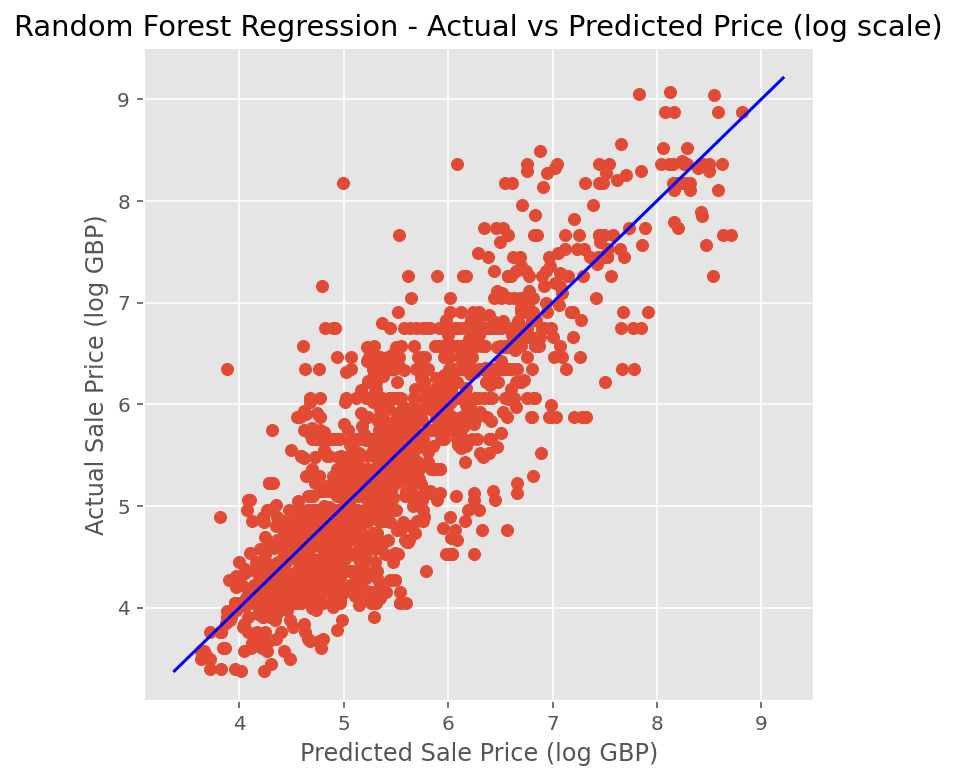

In [251]:
# Actual vs Predicted Price (log scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_rfr, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='b')
plt.ylabel('Actual Sale Price (log GBP)')
plt.xlabel('Predicted Sale Price (log GBP)')
plt.title("Random Forest Regression - Actual vs Predicted Price (log scale)")

plt.savefig("images/38 Random Forest Regression - Actual vs Predicted Price (log scale).png", bbox_inches="tight")
plt.savefig("images/38 Random Forest Regression - Actual vs Predicted Price (log scale).pdf", bbox_inches="tight")

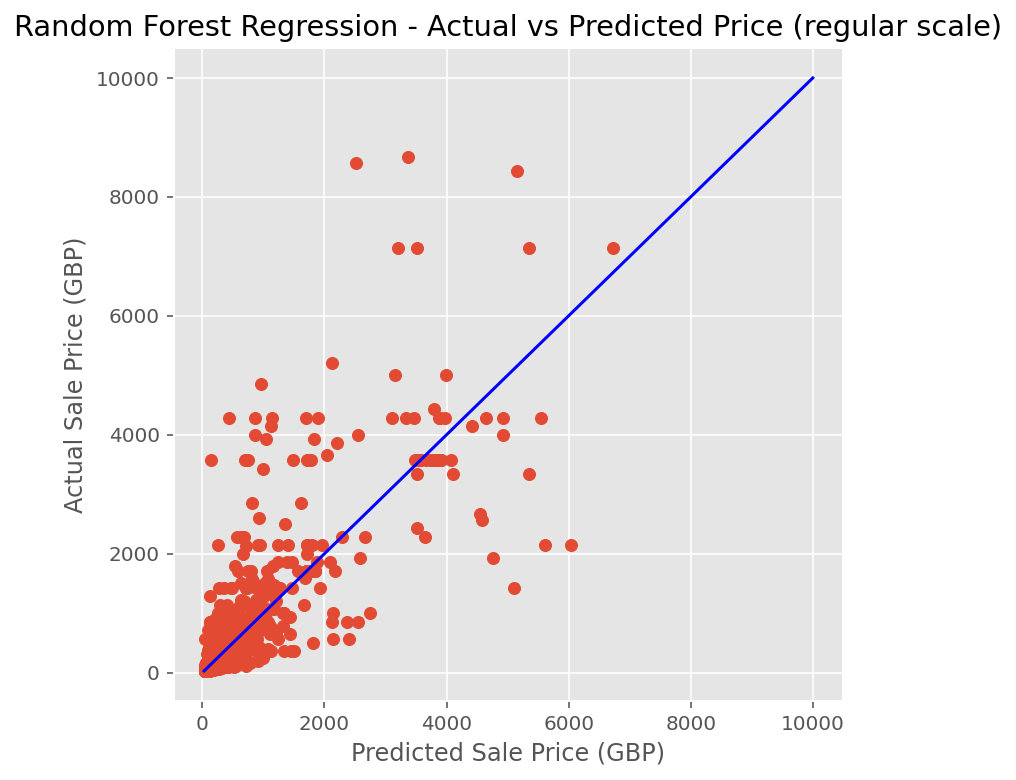

In [252]:
# Actual vs Predicted Price (regular scale)
plt.figure(figsize=[6,6])
plt.scatter(y_pred_rfr_exp, y_test_exp)
plt.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], c='b')
plt.ylabel('Actual Sale Price (GBP)')
plt.xlabel('Predicted Sale Price (GBP)')
plt.title("Random Forest Regression - Actual vs Predicted Price (regular scale)")

plt.savefig("images/39 Random Forest Regression - Actual vs Predicted Price (regular scale).png", bbox_inches="tight")
plt.savefig("images/39 Random Forest Regression - Actual vs Predicted Price (regular scale).pdf", bbox_inches="tight")

## 3.7 Using NLP on text columns

In [253]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [254]:
whisky_on_ice.series.head()

0                                    Signatory Vintage
1                  Disciples 2nd Edition - Single Cask
2                     Stateside - Single Cask American
3      Murray McDavid Select Grain Single Cask #903159
4    Murray McDavid Mission Gold - Pomerol Cask Fin...
Name: series, dtype: object

In [255]:
whisky_on_ice.description.head()

0    Signatory Vintage's Mortlach from the Un-Chill...
1    The second release of the Disciples range from...
2    George Dickel provides a true American Whiskey...
3    In the Highlands, on the coast of the Cromarty...
4    The narrow and winding road to Bunnahabhain ru...
Name: description, dtype: object

In [256]:
stop = stopwords.words('english')
# stop += ['http', 'https', 'rt']

In [257]:
# count word appearances
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count

In [258]:
# sort words by frequency
from operator import itemgetter

def word_frequency_sorter(words, counts):
    sort_result = sorted(zip(words, list(counts)),
                         key=itemgetter(1), reverse=True)
    return sort_result

In [259]:
# Series text column
tvec_s = TfidfVectorizer(stop_words = stop,
                         ngram_range = (1, 2),
                         max_features = 1000,
                         #token_pattern = r'\b[a-zA-Z]\w+\b',
                        )

# Fit vectorizer on text data
tvec_s.fit(whisky_on_ice["series"])

# Transform data
tvec_s_mat = tvec_s.transform(whisky_on_ice["series"])

# words occuring
words_s = tvec_s.get_feature_names_out()

# count word appearances
csum_s = word_counter(tvec_s_mat)

In [260]:
# sort words by frequency
df_word_frequency_series = pd.DataFrame(word_frequency_sorter(
    words_s, csum_s), columns=["word", "frequency_series"])
df_word_frequency_series.set_index('word', inplace=True)
df_word_frequency_series.index.name = None
df_word_frequency_series.head(20)

frequency_series
single                     472.293957
cask                       393.889788
malt                       348.316908
single cask                310.861626
single malt                278.938449
choice                     225.934043
connoisseurs               186.016074
connoisseurs choice        186.016074
scotch                     146.262605
edition                    145.824589
highland                   132.888168
old                        124.292548
batch                      113.765680
malt scotch                108.117014
rare                        91.914618
strength                    84.823922
release                     84.803307
bottling                    84.802816
finish                      83.787063
cask strength               83.614130

In [261]:
# Description text column
tvec_d = TfidfVectorizer(stop_words = stop,
                         ngram_range = (1, 2),
                         max_features = 1000,
                         token_pattern = r'\b[a-zA-Z]\w+\b',
                        )

# Fit vectorizer on text data
tvec_d.fit(whisky_on_ice["description"])

# Transform data
tvec_d_mat = tvec_d.transform(whisky_on_ice["description"])

# words occuring
words_d = tvec_d.get_feature_names_out()

# count word appearances
csum_d = word_counter(tvec_d_mat)

In [262]:
# sort words by frequency
df_word_frequency_description = pd.DataFrame(word_frequency_sorter(
    words_d, csum_d), columns=["word", "frequency_description"])
df_word_frequency_description.set_index("word", inplace=True)
df_word_frequency_description.index.name = None
df_word_frequency_description.head(20)

frequency_description
cask                   203.215721
old                    193.600278
single                 189.650843
whisky                 179.461207
bottled                162.671246
year                   159.770045
year old               145.270953
malt                   144.745000
distillery             141.179904
notes                  137.429452
finish                 137.125648
sherry                 130.369259
oak                    130.073070
casks                  124.820614
sweet                  115.879623
years                  110.973310
bottling               110.633118
nose                   109.376612
palate                 108.289612
vanilla                103.093427

In [263]:
df_series = pd.DataFrame(tvec_s_mat.toarray(),
                  columns=tvec_s.get_feature_names_out())
df_series.shape

(5654, 1000)

In [264]:
df_series.columns

Index(['001', '002', '10', '100', '100 proof', '100 years', '101', '105',
       '10th', '10th anniversary',
       ...
       'ximenez', 'ximenez cask', 'ximenez sherry', 'ximinez', 'xtra',
       'xtra old', 'year', 'year old', 'years', 'young'],
      dtype='object', length=1000)

In [265]:
tvec_s.get_feature_names_out()[500:520]

array(['infrequent', 'infrequent flyers', 'international',
       'international festival', 'irish', 'irish old', 'irish single',
       'island', 'island single', 'islay', 'islay malt', 'islay single',
       'islay wind', 'isle', 'jack', 'james', 'james eadie', 'japanese',
       'japanese blended', 'jazz'], dtype=object)

In [266]:
df_description = pd.DataFrame(tvec_d_mat.toarray(),
                  columns=tvec_d.get_feature_names_out())
df_description.shape

(5654, 1000)

### Select feature and target variables

In [267]:
# df_series
Xts = tvec_s_mat
# y is log_unit_price

In [268]:
# df_description
Xtd = tvec_d_mat

In [269]:
Xts.shape

(5654, 1000)

In [270]:
Xtd.shape

(5654, 1000)

In [271]:
y.shape

(5654,)

### Split the dataframe into train and test data

In [272]:
Xts_train, Xts_test, y_train, y_test = train_test_split(Xts, y,
                                                        test_size=0.3, random_state=0)

In [273]:
Xtd_train, Xtd_test, y_train, y_test = train_test_split(Xtd, y,
                                                        test_size=0.3, random_state=0)

### Build Models and Assess

At this point I will only investigate GradientBoosting and RandomForest Regressors.

### 3.7.1 GradientBoostingRegressor

In [274]:
# create model instance
text_s_gbr = GradientBoostingRegressor(random_state=1)

# fit model on train dataset
text_s_gbr.fit(Xts_train, y_train)

# evaluate
score_text_s_gbr = (cross_val_score(text_s_gbr, Xts_train, y_train, cv=5)).mean()
print("mean cv training score:", score_text_s_gbr)
print("training score:", text_s_gbr.score(Xts_train, y_train))
print("test score:", text_s_gbr.score(Xts_test, y_test))

mean cv training score: 0.20674918624927066
training score: 0.28683278341406926
test score: 0.21146699429305482


In [275]:
# create model instance
text_d_gbr = GradientBoostingRegressor(random_state=1)

# fit model on train dataset
text_d_gbr.fit(Xtd_train, y_train)

# evaluate
score_text_d_gbr = (cross_val_score(text_d_gbr, Xtd_train, y_train, cv=5)).mean()
print("mean cv training score:", score_text_d_gbr)
print("training score:", text_d_gbr.score(Xtd_train, y_train))
print("test score:", text_d_gbr.score(Xtd_test, y_test))

mean cv training score: 0.27945555541439093
training score: 0.4087016290013086
test score: 0.28334162789069883


### 3.7.2 RandomForestRegressor

In [276]:
# create model instance
text_s_rfr = RandomForestRegressor(random_state=1)

# fit model on train dataset
text_s_rfr.fit(Xts_train, y_train)

# evaluate
score_text_s_rfr = (cross_val_score(text_s_rfr, Xts_train, y_train, cv=5)).mean()
print("mean cv training score:", score_text_s_rfr)
print("training score:", text_s_rfr.score(Xts_train, y_train))
print("test score:", text_s_rfr.score(Xts_test, y_test))

mean cv training score: 0.2921733872531528
training score: 0.6336611503188094
test score: 0.2859202903971866


In [277]:
# create model instance
text_d_rfr = RandomForestRegressor(random_state=1)

# fit model on train dataset
text_d_rfr.fit(Xtd_train, y_train)

# evaluate
score_text_d_rfr = (cross_val_score(text_d_rfr, Xtd_train, y_train, cv=5)).mean()
print("mean cv training score:", score_text_d_rfr)
print("training score:", text_d_rfr.score(Xtd_train, y_train))
print("test score:", text_d_rfr.score(Xtd_test, y_test))

mean cv training score: 0.29701571244430136
training score: 0.687840497207499
test score: 0.29582556292330775


RandomForest appears to be performing best here. I will evaluate the RandomForest models.

#### RandomForestRegressor - df_series

In [278]:
y_pred_text_s_rfr = text_s_rfr.predict(Xts_test)

# model metrics, log scale
mse_text_s_rfr = mean_squared_error(y_test, y_pred_text_s_rfr)
rmse_text_s_rfr = np.sqrt(mse_text_s_rfr)
print("MSE:", mse_text_s_rfr)
print("RMSE:", rmse_text_s_rfr)

MSE: 0.9248684712705103
RMSE: 0.9617008221221973


In [279]:
# convert log values to regular values
y_pred_text_s_rfr_exp = np.exp(y_pred_text_s_rfr)

In [280]:
# model metrics, regular scale
mse_text_s_rfr_exp = mean_squared_error(y_test_exp, y_pred_text_s_rfr_exp)
rmse_text_s_rfr_exp = np.sqrt(mse_text_s_rfr_exp)
print("MSE:", mse_text_s_rfr_exp)
print("RMSE:", rmse_text_s_rfr_exp)

MSE: 663434.4325648518
RMSE: 814.5148449014615


#### RandomForestRegressor - df_description

In [281]:
y_pred_text_d_rfr = text_d_rfr.predict(Xtd_test)

# model metrics, log scale
mse_text_d_rfr = mean_squared_error(y_test, y_pred_text_d_rfr)
rmse_text_d_rfr = np.sqrt(mse_text_d_rfr)
print("MSE:", mse_text_d_rfr)
print("RMSE:", rmse_text_d_rfr)

MSE: 0.9120392672817188
RMSE: 0.9550074697517914


In [282]:
# convert log values to regular values
y_pred_text_d_rfr_exp = np.exp(y_pred_text_d_rfr)

In [283]:
# model metrics, regular scale
mse_text_d_rfr_exp = mean_squared_error(y_test_exp, y_pred_text_d_rfr_exp)
rmse_text_d_rfr_exp = np.sqrt(mse_text_d_rfr_exp)
print("MSE:", mse_text_d_rfr_exp)
print("RMSE:", rmse_text_d_rfr_exp)

MSE: 612619.705469941
RMSE: 782.7002654081197


## 3.8 WordCloud

In [284]:
from wordcloud import WordCloud, STOPWORDS

There are 1820529 unique words in all the descriptions.


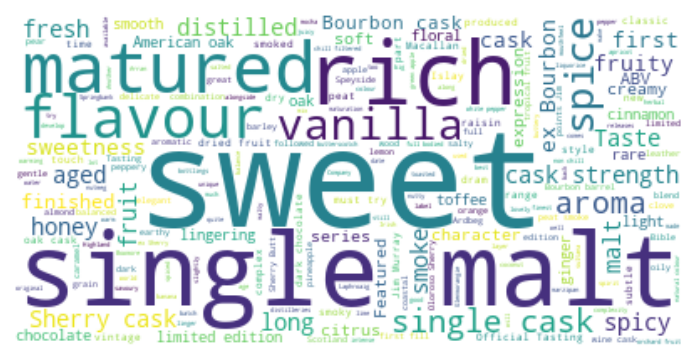

In [285]:
# all description text
description_text = " ".join(description for description in whisky_on_ice.description)
print ("There are {} unique words in all the descriptions.".format(len(description_text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Finish", "one", "year", "years", "old", "Palate", "bottle", "bottled",
                  "bottles", "bottling", "Nose", "whisky", "whiskey", "whiskies", "note",
                  "notes", "distillery", "hint", "hints", "release", "released", "s", "now",
                  "come", "die", "book"])

# create word cloud
wordcloud_description = WordCloud(stopwords=stopwords,
                                  max_words=200,
                                  background_color="white")

# generate a word cloud image
wordcloud_description.generate(description_text)

# display the generated image
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis("off")
plt.show()

In [286]:
print(wordcloud_description.words_.keys())

dict_keys(['sweet', 'single malt', 'rich', 'matured', 'flavour', 'vanilla', 'spice', 'single cask', 'aroma', 'cask strength', 'aged', 'long', 'Sherry cask', 'distilled', 'honey', 'smoke', 'spicy', 'malt', 'fresh', 'fruit', 'Taste', 'ex Bourbon', 'sweetness', 'first', 'fruity', 'cask', 'finished', 'Bourbon cask', 'character', 'soft', 'Featured', 'ABV', 'creamy', 'series', 'expression', 'citrus', 'limited edition', 'rare', 'floral', 'lingering', 'oak', 'American oak', 'light', 'ginger', 'smooth', 'cinnamon', 'toffee', 'chocolate', 'Official Tasting', 'smoky', 'subtle', 'peat', 'part', 'must try', 'time', 'range', 'dried fruit', 'oak cask', 'dark chocolate', 'produced', 'touch', 'smoked', 'vintage', 'Jim Murray', 'style', 'raisin', 'new', 'dry', 'dram', 'classic', 'Islay', 'complex', 'Macallan', 'peat smoke', 'delicate', 'Tasting', 'wood', 'combination', 'pear', 'caramel', 'Bible', 'Scotland', 'Bourbon barrel', 'earthy', 'apple', 'first fill', 'orange', 'peppery', 'points Jim', 'oily', 'f

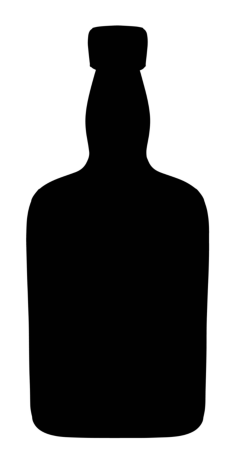

In [287]:
# load mask image
whisky_mask = np.array(Image.open("images/whisky_bottle.png"))

plt.imshow(whisky_mask)
plt.axis("off")
plt.show()

In [288]:
# whisky_mask[:2]

In [289]:
# whisky_mask.shape

In [290]:
# # transform mask image
# def transform_zeros(val):
#     if val == 0:
#         return 255
#     else:
#         return val

In [291]:
# # transform mask into a new one that will work with the function
# transformed_whisky_mask = np.ndarray((whisky_mask.shape[0],whisky_mask.shape[1]), np.int32)

# for i in range(len(whisky_mask)):
#     transformed_whisky_mask[i] = list(map(transform_zeros, whisky_mask[i]))

In [292]:
# # Check the expected result of your mask
# transformed_whisky_mask

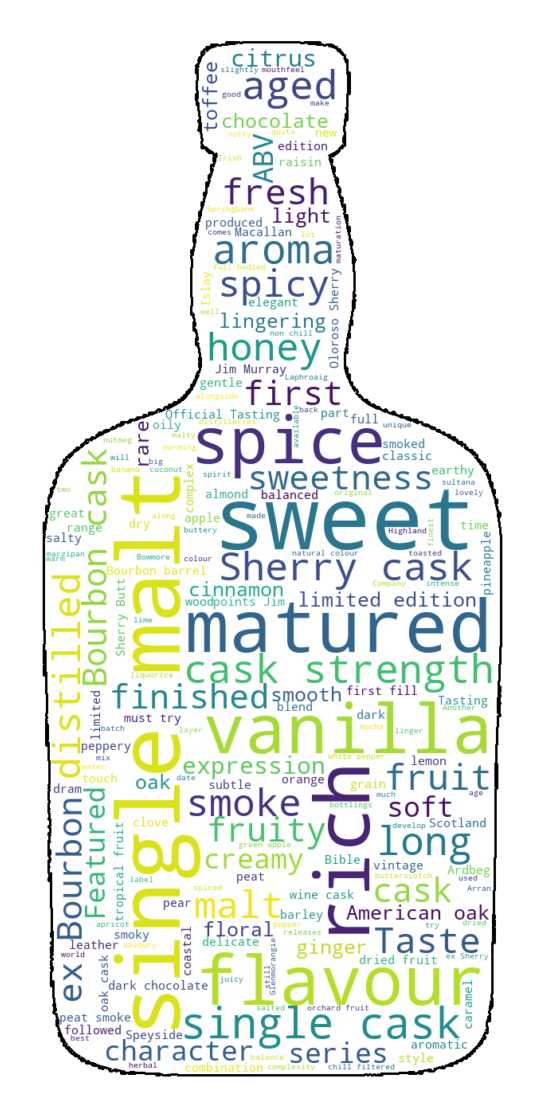

In [293]:
# create and generate a word cloud image
wordcloud_d_mask = WordCloud(stopwords=stopwords, max_words=200, background_color="white",
                             mask=whisky_mask, contour_width=2, 
                             contour_color='black').generate(description_text)

# display the generated image
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_d_mask, interpolation='bilinear')
plt.axis("off")
plt.show()

In [294]:
# save the image in the images folder
wordcloud_d_mask.to_file("images/40 wordcloud_bottle_description.png")
wordcloud_d_mask.to_file("images/40 wordcloud_bottle_description.pdf")

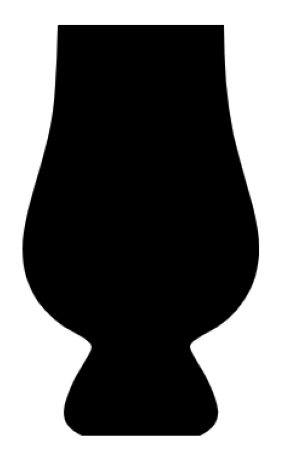

In [295]:
# load mask image
whisky_mask_series = np.array(Image.open("images/whisky_glass.png"))

plt.imshow(whisky_mask_series)
plt.axis("off")
plt.show()

There are 147780 unique words in all the series.


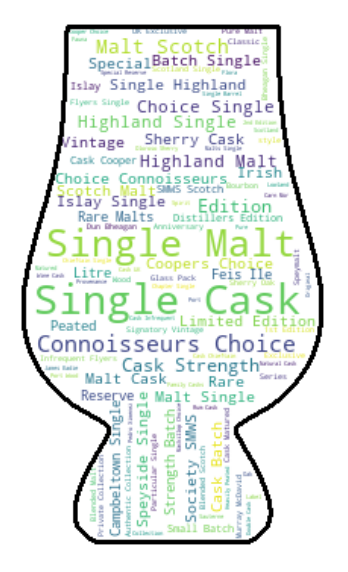

In [296]:
# all series text
series_text = " ".join(series for series in whisky_on_ice.series)
print ("There are {} unique words in all the series.".format(len(series_text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Finish", "one", "year", "years", "old", "Palate", "bottle", "bottled",
                  "bottles", "bottling", "Nose", "whisky", "whiskey", "whiskies", "note",
                  "notes", "distillery", "hint", "hints", "release", "released", "s", "now",
                  "come", "die", "book"])

# create and generate a word cloud image
wordcloud_s_mask = WordCloud(stopwords=stopwords, max_words=100, background_color="white",
                             mask=whisky_mask_series, contour_width=2, 
                             contour_color='black').generate(series_text)

# display the generated image
plt.figure(figsize=[5,5])
plt.imshow(wordcloud_s_mask, interpolation='bilinear')
plt.axis("off")
plt.show()

In [297]:
# save the image in the imgages folder
wordcloud_s_mask.to_file("images/41 wordcloud_glass_series.png")
wordcloud_s_mask.to_file("images/41 wordcloud_glass_series.pdf")

In [298]:
print(wordcloud_s_mask.words_.keys())

dict_keys(['Single Cask', 'Single Malt', 'Connoisseurs Choice', 'Malt Scotch', 'Cask Strength', 'Edition', 'Choice Single', 'Highland Malt', 'Highland Single', 'Speyside Single', 'Special', 'Single Highland', 'Choice Connoisseurs', 'Cask Batch', 'Sherry Cask', 'Scotch Malt', 'Rare', 'Coopers Choice', 'Islay Single', 'Batch Single', 'Malt Single', 'Irish', 'Society SMWS', 'Malt Cask', 'Limited Edition', 'Vintage', 'Litre', 'Peated', 'Reserve', 'Feis Ile', 'Strength Batch', 'Rare Malts', 'Campbeltown Single', 'Distillers Edition', 'SMWS Scotch', 'Islay', 'Cask Cooper', 'Small Batch', 'Scotland Single', 'Signatory Vintage', 'Infrequent Flyers', 'Wood', 'Flyers Single', 'Cask Matured', 'Speymalt', 'Bourbon', 'Series', 'Glass Pack', 'UK Exclusive', 'Particular Single', 'Sherry Oak', 'Pure Malt', 'Dun Bheagan', 'Exclusive', 'Blended Malt', 'Blended Scotch', 'Authentic Collection', 'style', 'Classic', 'Bheagan Single', 'Murray McDavid', 'Anniversary', 'Private Collection', '1st Edition', 'Chi

## 3.9 Model Evaluation Summary

In [299]:
# Creating performance dataframe with the metrics (R2-score, RMSE) for each model
performance_data = {'Model': ["RidgeCV", "LassoCV", "ElasticNetCV", "Linear Regression (10 Best Features)", "KNeighbors", "DecisionTree", "DecisionTree (w/ bag)", "DecisionTree (w/ boost)", "GradientBoosting", "GradientBoosting (w/ GS)", "RandomForest", "RandomForest (w/ GS)"],
        'Model Name': ["model_ridge", "model_lasso", "model_elas", "model_lr_bf", "model_knn", "model_dtr", "bagging_dtr", "boost_dtr", "model_gbr", "gbr_gs", "model_rfr", "rfr_gs"],
        'R2-Score': [score_ridge, score_lasso, score_elas, score_lr_bf, score_knn, score_dtr, score_dtr_bag, score_dtr_boost, score_gbr, gbr_gs.best_score_, score_rfr, rfr_gs.best_score_],
        'RMSE': [rmse_ridge_exp, rmse_lasso_exp, rmse_elas_exp, "-", "-", "-", "-", "-", "-", rmse_gbr_exp, "-", rmse_rfr_exp],
        }
performance_df = pd.DataFrame(data=performance_data)
performance_df

Model   Model Name  R2-Score     RMSE
0                                RidgeCV  model_ridge  0.708364  596.282
1                                LassoCV  model_lasso  0.711058  596.523
2                           ElasticNetCV   model_elas  0.710891  596.645
3   Linear Regression (10 Best Features)  model_lr_bf  0.479689        -
4                             KNeighbors    model_knn  0.675603        -
5                           DecisionTree    model_dtr  0.525633        -
6                  DecisionTree (w/ bag)  bagging_dtr  0.702699        -
7                DecisionTree (w/ boost)    boost_dtr  0.715053        -
8                       GradientBoosting    model_gbr  0.647390        -
9               GradientBoosting (w/ GS)       gbr_gs  0.744433   479.87
10                          RandomForest    model_rfr  0.725256        -
11                  RandomForest (w/ GS)       rfr_gs  0.724222  518.753

Of the models evaluated, GradientBoosting has the highest R2-Score and the lowest RMSE. Therefore, of the models constructed, GradientBoosting appears to have worked the best. It's worth noting the more complicated models did not perform significantly better than the more basic linear regression-based models (ridge, lasso, elasticnet)

How did the actual and predicted values vary?

In [300]:
print("Mean Price (Actual):    £", round(y_exp.mean()))
print("Mean Price (Test):      £", round(y_test_exp.mean()))
print("Mean Price (Predicted): £", round(y_pred_gbr_exp.mean()))

Mean Price (Actual):    £ 542
Mean Price (Test):      £ 511
Mean Price (Predicted): £ 454


On average, my model is under-predicting the price.

Let's look at the first 20 whiskies to get a further feel for the model performance:

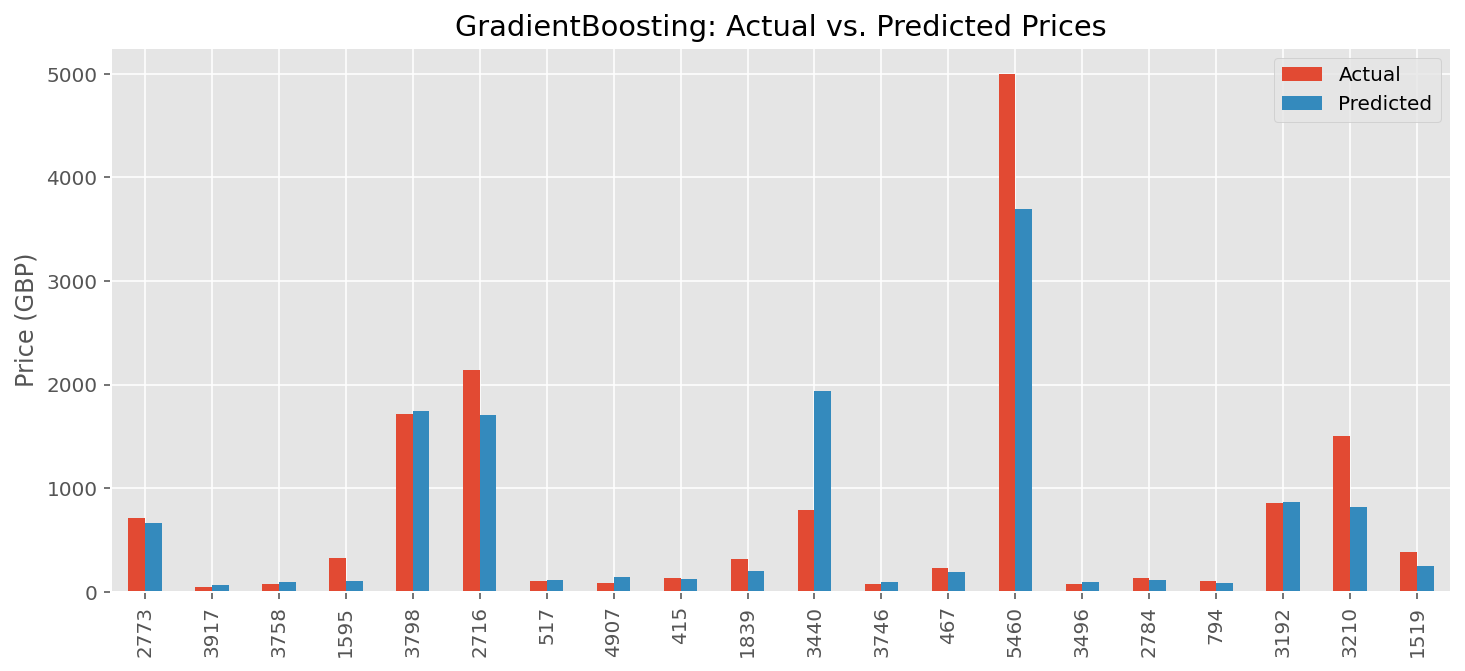

In [301]:
whisky_gbr = pd.DataFrame({'Actual': y_test_exp, 'Predicted': y_pred_gbr_exp})
whisky_gbr = whisky_gbr.head(20)

whisky_gbr.plot(kind='bar', figsize=(12,5))

plt.title('GradientBoosting: Actual vs. Predicted Prices')
plt.ylabel('Price (GBP)')
#plt.ylim([0,2000])

plt.savefig("images/42 GB model first 20 predictions.png", bbox_inches="tight")
plt.savefig("images/42 GB model first 20 predictions.pdf", bbox_inches="tight")

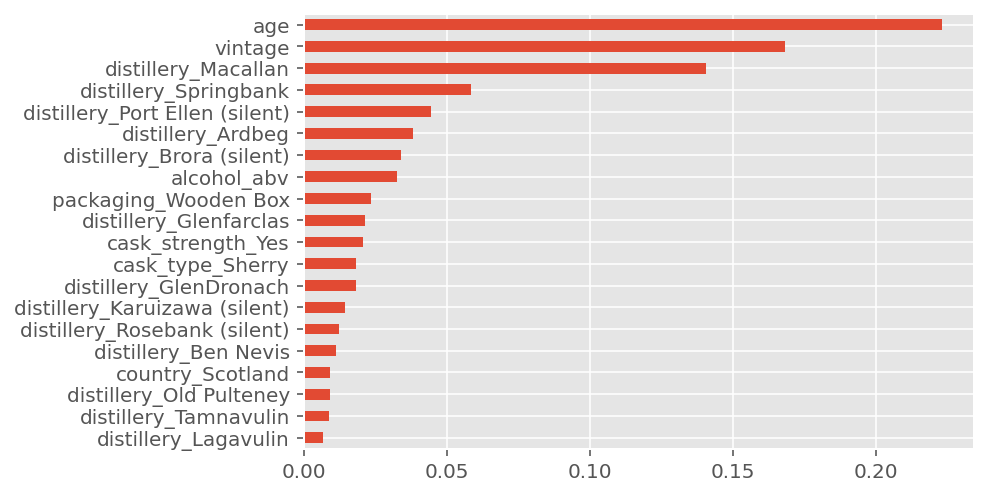

In [302]:
# collect the model feature importances in a dataframe
gbr_fi = pd.DataFrame(model_gbr.feature_importances_,
                      index=X_test_std.columns,
                      columns=['importance'])

gbr_fi.sort_values('importance', ascending=False, inplace=True)
gbr_fi = gbr_fi.head(20)

# plot the magnitude of the coefficients
gbr_fi['importance'].sort_values().plot(kind='barh')

plt.savefig("images/43 GB model feature importances.png", bbox_inches="tight")
plt.savefig("images/43 GB model feature importances.pdf", bbox_inches="tight")

So the best features to predict whisky price were:
1. Age,
2. Vintage,
3. Certain distilleries,
4. Alcohol content, and
5. Certain cask types.

# 4. Use Case: Identifying "Best Value" Whiskies

One possible use case for the models created is to identify those whiskies that provide the best value for money.

Consider the following simple formula:

$$ Value = \frac{Predicted Price}{Actual Price} $$

Since our model has determined the "Predicted Price", and we know the "Actual Price", this provides an easy way to obtain a value metric.

Those whiskies with a Value > 1 represent whiskies that are underpriced, and the higher the Value the more underpriced the whisky is. This could have a significant impact on large whisky purchasers as they can buy better quality whiskies at lower prices, leading to increased profit margins or increased customer satisfaction.

In [303]:
whisky_value = X_test[["vintage", "year_bottled", "age", "alcohol_abv", "bottle_size"]].copy()

In [304]:
whisky_value["series"] = whisky_series_test
whisky_value["predicted_price"] = round(y_pred_gbr_exp / (100/whisky_value["bottle_size"]),2)
whisky_value["actual_price"] = y_test_exp / (100/whisky_value["bottle_size"])
whisky_value["value"] = whisky_value["predicted_price"] / whisky_value["actual_price"]

### Here are some the winners

In [305]:
# Best value for money
whisky_value.sort_values("value", ascending=False).head(10)

vintage  year_bottled  age  alcohol_abv  bottle_size  \
4608     1968          2006   38         46.0         70.0   
642      1989          2020   30         46.3         70.0   
4880     1970          1985   15         40.0         70.0   
5188     1981          2000   19         60.0         70.0   
5632     1973          1999   26         50.9         70.0   
3514     1984          2011   26         43.0        100.0   
5283     1959          2006   47         40.0         70.0   
4313     1990          2005   15         40.0         70.0   
5223     1990          2005   15         40.0         70.0   
4849     1991          2011   18         50.3         75.0   

                                 series  predicted_price  actual_price  \
4608                Connoisseurs Choice           617.46         81.95   
642   Sinclair Series Rioja Cask Finish           215.90         33.85   
4880               George & J.G Smith's           215.65         39.95   
5188         Limited Centenary Bottling           377.09         81.95   
5632                   Scotts Selection          1832.32        399.95   
3514     Double Matured Limited Edition           273.11         59.95   
5283        Speyside Single Malt Scotch          1137.38        249.95   
4313                   Gold 1824 Series           282.99         64.95   
5223  The Directors Edition 1700 Series           282.99         64.95   
4849                   Tun 1401 Batch 3          1225.30        299.95   

         value  
4608  7.534594  
642   6.378139  
4880  5.397997  
5188  4.601464  
5632  4.581373  
3514  4.555630  
5283  4.550430  
4313  4.357044  
5223  4.357044  
4849  4.085014

### And some of the losers

In [306]:
# Worst value for money
whisky_value.sort_values("value").head(10)

vintage  year_bottled  age  alcohol_abv  bottle_size  \
1203     1972          2016   44         42.2         70.0   
806      1989          2020   30         51.9         70.0   
1399     1990          2004   14         43.0         70.0   
763      1989          2020   29         50.1         70.0   
1177     2009          2017    8         50.0         70.0   
3518     1990          2005   15         40.0         70.0   
1261     1990          2005   15         40.0         70.0   
1926     1990          2019   28         40.0         70.0   
3540     1990          2005   15         40.0         70.0   
1419     1990          2005   15         40.0         70.0   

                                                 series  predicted_price  \
1203                                           Rare Old            86.98   
806                                2020 Special Release            56.26   
1399                                    Flora and Fauna            49.84   
763                                    Kingsman Edition           259.08   
1177     Greedy Angels 2nd Release - Chairman's Reserve            96.87   
3518              House Of Commons Signed By John Major            52.99   
1261  House of Commons Signed by Ed Balls & Ed Milli...            55.50   
1926                  Easter Elchies Black 2019 Edition           361.15   
3540            House Of Commons Signed By Several MP's            64.75   
1419           House of Commons signed by David Cameron            64.75   

      actual_price     value  
1203       2999.95  0.028994  
806         599.95  0.093774  
1399        499.95  0.099690  
763        2499.95  0.103634  
1177        899.95  0.107639  
3518        399.95  0.132492  
1261        399.95  0.138767  
1926       2499.95  0.144463  
3540        399.95  0.161895  
1419        399.95  0.161895

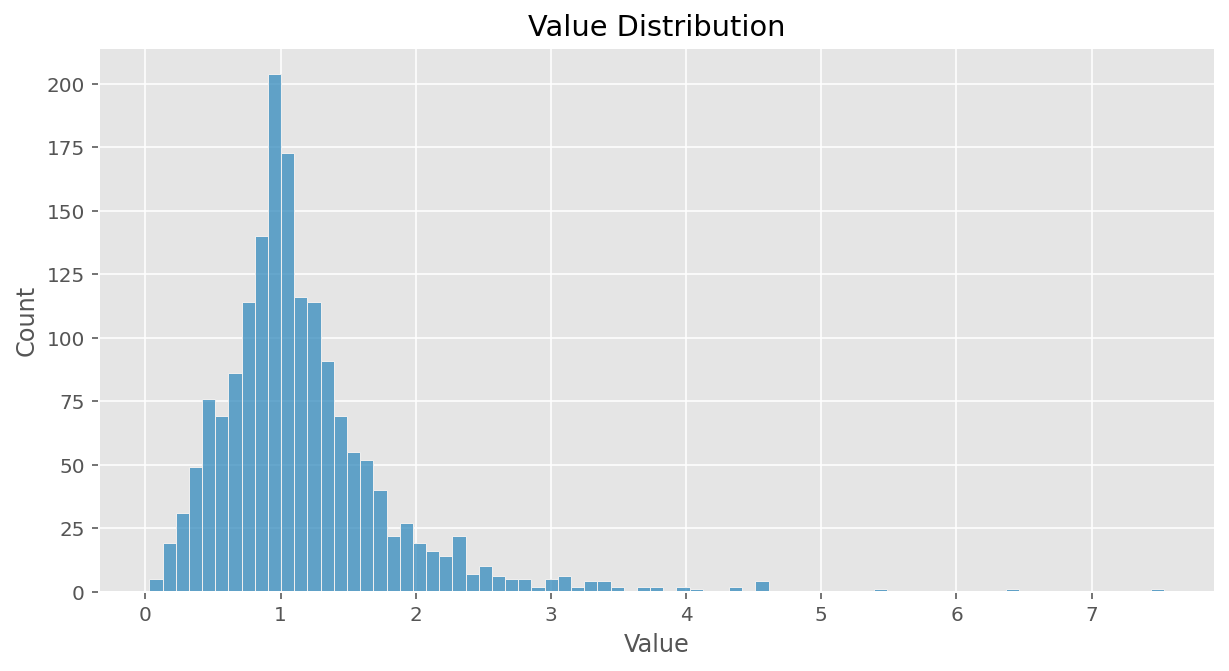

In [307]:
# value distribution plot
plt.figure(figsize=[10,5])
sns.histplot(whisky_value.value)

plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
#plt.xlim([0,4])

plt.savefig("images/44 value distribution plot.png", bbox_inches="tight")
plt.savefig("images/44 value distribution plot.pdf", bbox_inches="tight")

It is good to see my value distribution peaks around 1. This is a good indication that my predicted price compares well with the actual price. The more spread out the values the worse the relationship between predicted and actual price. 

Below are some additional metrics (and we can see the mean value is around 1.16).

In [308]:
whisky_value.value.describe()

count    1697.000000
mean        1.159775
std         0.650082
min         0.028994
25%         0.790484
50%         1.027214
75%         1.372456
max         7.534594
Name: value, dtype: float64

# 5. Next Steps / Future Work

* Investigate converting categorical features with OneHotEncoder or others
* Investigate other scalers (MinMax, Polynomial Features)
* Investigate KNeighbors in more detail
* Scrape data from websites in other countries notably Ireland, USA and Japan
* Alternatively, focus on Scotland and investigate regions
* Considering the relationship Year Bottled = Vintage + Age, how do my models perform using only 2 of these features